# Deep Learning Activation functions

Activation functions are an important part of the Neural Networks. They introduce non linearities that help to add more expresiveness of the Neural Networks. In vanilla networks the Sigmoid function was througholy used. However it has some problems to the speed of convergence and gradient saturation. So different activation fucntions have been proposed to speed up convergence, aliviate gradient saturation and mitigate covariate shift. In this Notebook we will explore some of the most popular alternative activation functions used in deep learning architectures.

In [3]:
# Importación de bibliotecas y funciones auxiliares

import numpy as np  # Importa numpy para operaciones numéricas
import matplotlib.pyplot as plt  # Importa matplotlib para gráficos

def approximateIntegral(f, a, b, steps = 50):
    # Calcula la integral aproximada usando el método del rectángulo
    step_size = (b-a)/steps  # Calcula el tamaño de cada paso
    x = np.linspace(a, b, steps)  # Crea un array de valores equidistantes
    y = f(x)  # Evalúa la función en todos los puntos x
    return np.sum(y*step_size)  # Suma de áreas de rectángulos

def plotFunction(x, y, ylim = 1):
    # Grafica una función individual con formato básico
    plt.plot(x,y, color='r')  # Crea gráfico con línea roja
    plt.xlim([x[0],x[-1]])  # Establece límites del eje X
    plt.ylim([0, max(y) + ylim])  # Establece límites del eje Y
    plt.show()  # Muestra el gráfico
    
def plotFunctions(title, functions, x = None, savefile=None, ylim=(0, 1.2)):
    # Grafica múltiples funciones con formato avanzado
    if not x:
        x = np.linspace(-5, 5, 300)  # Crea rango x por defecto
    fig, ax = plt.subplots()  # Crea figura y ejes
    
    legends = []  # Lista para leyendas
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Lista de colores
    color_index = 0  # Índice para rotar colores
    for f in functions:
        legends.append("y=" + f[0])  # Añade fórmula a leyenda
        y = f[1](x)  # Evalúa la función
        if(color_index == len(colors)):  # Reinicia índice de colores
            color_index = 0
        ax.plot(x,y,color=colors[color_index], alpha=0.5)  # Grafica línea
        color_index += 1
    ax.set(xlabel='x', ylabel='y', title=title)  # Etiquetas ejes y título
    plt.xlim([x[0],x[-1]])  # Límites eje X
    plt.ylim([ylim[0], ylim[1]])  # Límites eje Y
    ax.legend(legends)  # Muestra leyenda
    plt.grid(True)  # Activa la cuadrícula
    
    if savefile:
        plt.savefig(savefile + '.png')  # Guarda gráfico como imagen
    plt.show()

## Sigmoid and derivative
$$
\sigma(x) = \frac{1}{1+ e^{-z}} \\
\sigma'(x) = \sigma(x)(1 -\sigma(x))
$$

In [4]:
# Función de activación Sigmoide y su derivada

def sigmoid(x):
    return 1/(1 + np.exp(-x))  # Calcula 1/(1 + e^-x)

def sigmoid_prime(x):
    sigmoid_x = sigmoid(x)  # Obtiene valor de la sigmoide
    return sigmoid_x * (1 - sigmoid_x)  # Aplica fórmula de derivada

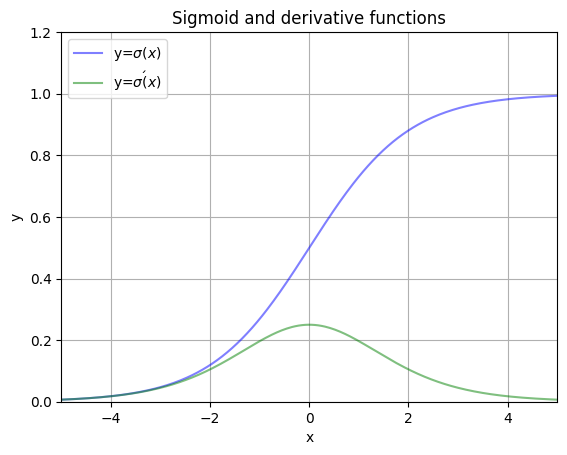

In [5]:
#  Gráfico de Sigmoide y su derivada
plotFunctions(r'Sigmoid and derivative functions', 
             [(r'$\sigma(x)$', sigmoid),  # Agrega sigmoide
              (r'$\sigma\'(x)$', sigmoid_prime)])  # Agrega su derivada

## Tanh and derivative
$$
tanh(x) = 2\sigma(2x) -1 = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \\
tanh'(x) = 1 - tanh(x)^2
$$

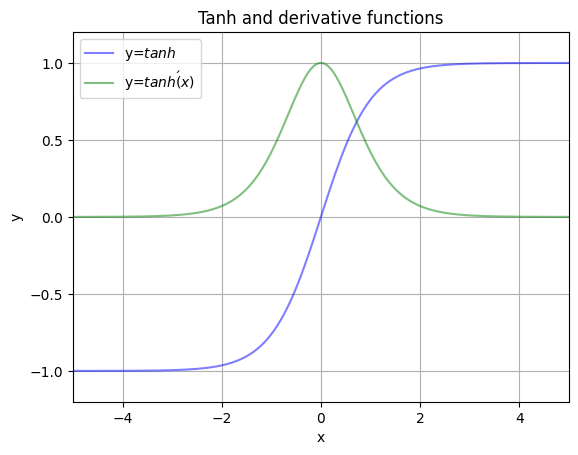

In [6]:
# Función Tanh y su derivada

def tanh(x):
    return 2*sigmoid(2*x)-1  # Implementa tanh usando sigmoide

def tanh_prime(x):
    return 1 - (tanh(x))**2  # Calcula derivada: 1 - tanh²(x)

plotFunctions(r'Tanh and derivative functions', 
             [(r'$tanh$', tanh),  # Agrega tanh
              (r'$tanh\'(x)$', tanh_prime)],  # Agrega derivada
             ylim=(-1.2, 1.2))  # Ajusta rango eje Y

## Hard Tanh

$$
hardtanh(x) = max(-1, min(1, x)) \\
hardtanh'(x) =
\begin{cases}
1 & -1 < x < 1 \\
0 & \text{otherwise}
\end{cases}
$$

In [7]:
# Hard Tanh y su derivada

def hardtanh(x):
    # Limita valores entre -1 y 1 usando funciones numpy
    return np.clip(x, -1, 1)

def hardtanh_prime(x):
    # Derivada: 1 si está entre -1 y 1, 0 en otro caso
    out = [1 if -1 < n and n < 1 else 0 for n in x]  # List comprehension
    return np.array(out)  # Convierte a array numpy

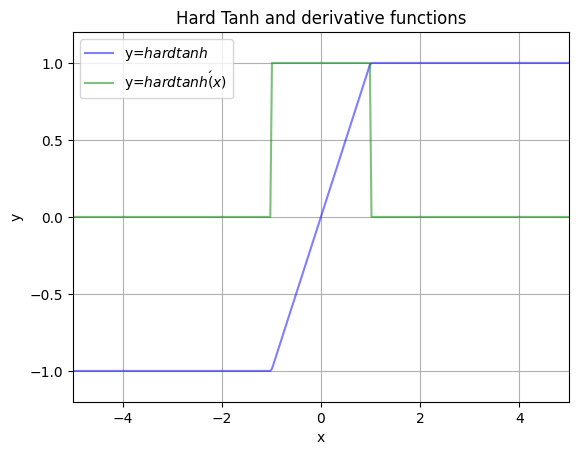

In [8]:
plotFunctions(r'Hard Tanh and derivative functions', [(r'$hard tanh$', hardtanh), (r'$hard tanh\'(x)$', hardtanh_prime)], ylim=(-1.2, 1.2))

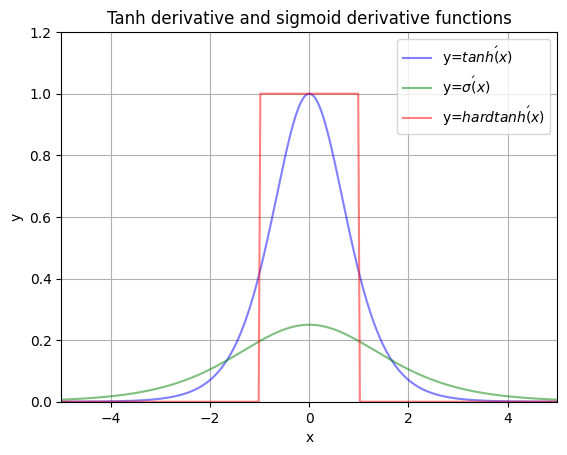

In [9]:
# Celda 6: Gráfico comparativo de derivadas
plotFunctions(r'Tanh derivative and sigmoid derivative functions', 
             [(r'$tanh\'(x)$', tanh_prime),  # Derivada tanh
              (r'$\sigma\'(x)$', sigmoid_prime),  # Derivada sigmoide
              (r'$hardtanh\'(x)$', hardtanh_prime)])  # Derivada hardtanh

## ReLU and derivative
$$
ReLU(x) = max(0, x) \\
ReLU'(x) = 
\begin{cases}
0 & x \leq 0 \\
1 & 0 < x 
\end{cases}
$$

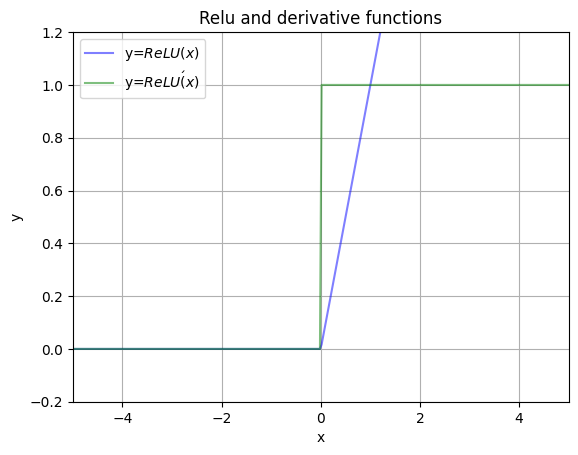

In [10]:
# Función ReLU y su derivada

def relu(x):
    return np.maximum(0, x)  # Máximo entre 0 y x (element-wise)

def relu_prime(x):
    return x >= 0  # True=1 para x >=0, False=0 para x <0

plotFunctions(r'Relu and derivative functions', 
             [(r'$ReLU(x)$', relu), 
              (r'$ReLU\'(x)$', relu_prime)], 
             ylim=(-0.2, 1.2))

## Leaky ReLU

$$
LeakyReLu(x) =\begin{cases}
x \hspace{0.3em} if \hspace{0.3em}x \geq 0 \\
\alpha x \hspace{0.3em} if \hspace{0.3em}x < 0 
\end{cases} \\
LeakyReLu'(x) =\begin{cases}
1 \hspace{0.3em} if \hspace{0.3em}x \geq 0 \\
\alpha \hspace{0.3em} if \hspace{0.3em}x < 0 
\end{cases}
$$

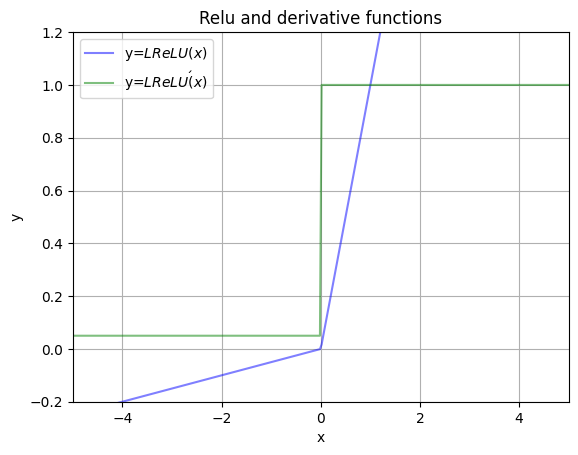

In [11]:
# Leaky ReLU y su derivada

def leaky_relu(x, alpha=0.05):
    # Aplica alpha a valores negativos (usando list comprehension)
    return np.array([a if a >= 0 else alpha*a for a in x])

def leaky_relu_prime(x, alpha=0.05):
    # Derivada: 1 para positivos, alpha para negativos
    return np.array([1 if a >= 0 else alpha for a in x])

plotFunctions(r'Relu and derivative functions', 
             [(r'$LReLU(x)$', leaky_relu), 
              (r'$LReLU\'(x)$', leaky_relu_prime)], 
             ylim=(-0.2, 1.2))

# Other activation functions

## PRELU
In the case of the PRELU de $\alpha$ parameter is different for each Neuron and is learned by the Network
$$
PRELU(x) =\begin{cases}
                x \hspace{0.3em} if \hspace{0.3em}x \geq 0 \\
                \alpha x \hspace{0.3em} if \hspace{0.3em}x < 0 
            \end{cases}
$$

## ELU
This activations makes a modification to the non linearity to push the activations closer to 0 possibly speeding up convergence
$$
ELU(x) =\begin{cases}
                x \hspace{0.3em} if \hspace{0.3em}x > 0 \\
                \alpha (e^{x} - 1) \hspace{0.3em} if \hspace{0.3em}x \leq 0 
            \end{cases}
$$

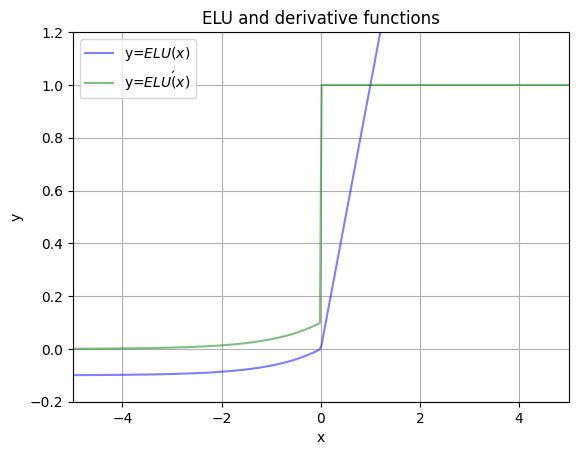

In [12]:
# Función ELU y su derivada

def elu(x, alpha=0.1):
    # Para x <=0 usa alpha*(e^x -1), para x>0 mantiene x
    return np.array([a if a > 0 else alpha*(np.exp(a) -1) for a in x])

def elu_prime(x, alpha=0.1):
    # Derivada: 1 para x>0, alpha*e^x para x<=0
    return np.array([1 if a >= 0 else alpha*np.exp(a) for a in x])
    
plotFunctions(r'ELU and derivative functions', 
             [(r'$ELU(x)$', elu), 
              (r'$ELU\'(x)$', elu_prime)], 
             ylim=(-0.2, 1.2))

## Softmax
$$
Softmax(x_i) = \frac{e^{x_{i}}}{\sum_{j} e^{x_{j}} }
$$

In [13]:
#  Función Softmax

def softmax(x):
    x_sum = np.sum(np.exp(x))  # Calcula suma de exponenciales
    return (np.exp(x))/x_sum  # Aplica softmax a cada elemento

print(softmax(np.array([4.0, 2.3, -1.7])))  # Ejemplo de uso

[0.84314936 0.1540295  0.00282115]


## GELU
$$
GELU(x) = x P(X \leq x) = x \phi(x) = x . \frac{1}{2} \Big[1 + erf\Big(\frac{x}{\sqrt{2}}\Big)\Big]
$$
GELU can be approximated by:
$$
0.5x \Big[1 + tanh\Big( \sqrt{ \frac{2}{\pi} } . (x + 0.044715x^3) \Big) \Big]
$$
or
$$
x \sigma(1.702x)
$$

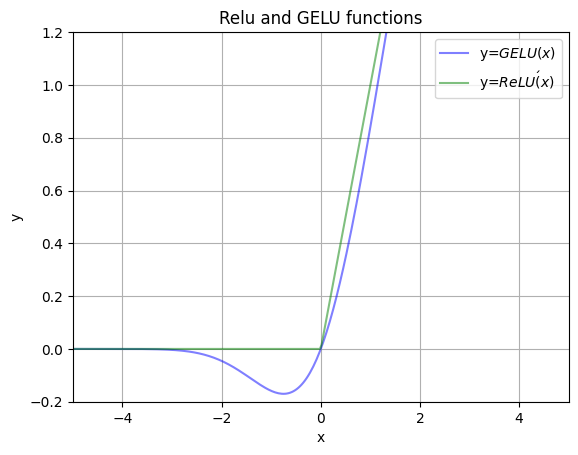

In [14]:
# Función GELU (aproximación)

def gelu(x):
    # Implementación aproximada usando tanh
    return 0.5*x * (1 + tanh( np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3))) )

plotFunctions(r'Relu and GELU functions', 
             [(r'$GELU(x)$', gelu), 
              (r'$ReLU\'(x)$', relu)], 
             ylim=(-0.2, 1.2))

# Activation functions used in neural networks
---

### Imports

In [15]:
# Importación de bibliotecas
import numpy as np         # Biblioteca para operaciones numéricas y matemáticas
import pandas as pd        # Biblioteca para manipulación y análisis de datos
import seaborn as sns      # Biblioteca para visualización de datos basada en matplotlib
import matplotlib.pyplot as plt  # Biblioteca para creación de gráficos y visualizaciones
%matplotlib inline         

### Auxiliary functions

In [16]:
# Función auxiliar para crear gráficos
def make_plot(x, f, df, name):
    # Crea una nueva figura con tamaño específico
    plt.figure()
    plt.figure(figsize=(12,6))
    
    # Configuración del título y etiquetas de los ejes
    plt.title(name, fontsize=20, fontweight='bold')  # Título del gráfico
    plt.xlabel('z', fontsize=15)                     # Etiqueta eje X
    plt.ylabel('Activation function value', fontsize=15)  # Etiqueta eje Y
    
    # Estilo del fondo y cuadrícula
    sns.set_style("whitegrid")  # Establece fondo blanco con cuadrícula
    
    # Trazado de las curvas principal y derivada
    plt.plot(x, f, label="f (z)")   # Grafica la función de activación
    plt.plot(x, df, label="f '(z)") # Grafica su derivada
    
    # Configuración de la leyenda
    plt.legend(loc=4, prop={'size': 15}, frameon=True, 
              shadow=True, facecolor="white", edgecolor="black")
    
    # Guardado y visualización del gráfico
    plt.savefig(name + ".png")  # Guarda el gráfico como imagen PNG
    plt.show()                  # Muestra el gráfico en el notebook

### Sigmoid

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}
\hspace{1cm}
{\displaystyle f'(x) = f(x)\cdot(1-f(x))}$$

<Figure size 640x480 with 0 Axes>

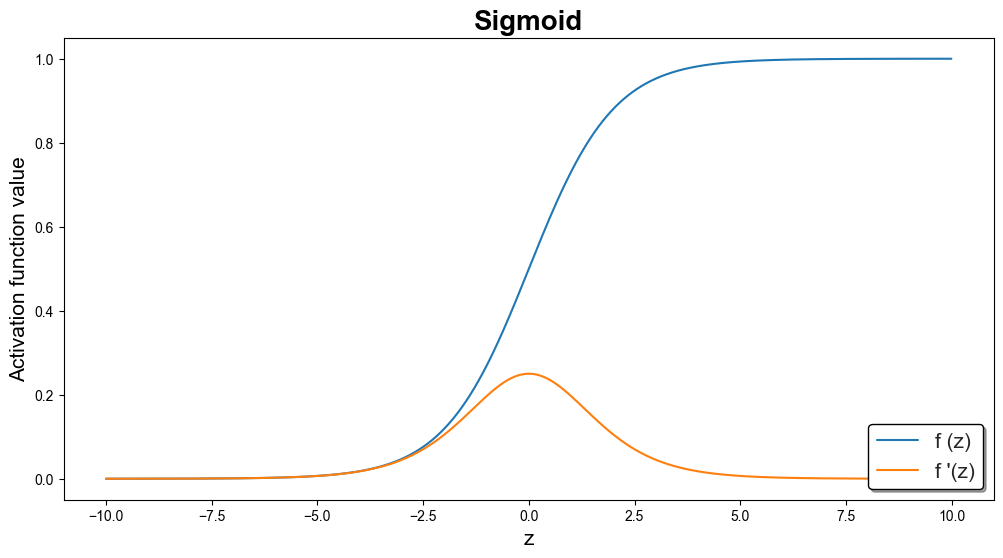

In [17]:
# Función Sigmoide
z = np.arange(-10, 10, 0.01)  # Crea array de valores desde -10 a 10 con paso 0.01
f = 1/(1+np.exp(-z))        # Calcula valores de la función sigmoide
df = f*(1-f)               # Calcula derivada usando propiedad de la sigmoide
make_plot(z, f, df, "Sigmoid")  # Llama a la función para generar el gráfico


### Tanh

$${\displaystyle f(x) = \operatorname {tgh} x={\frac {\sinh x}{\cosh x}}={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}}
\hspace{1cm}
{\displaystyle f'(x) = 1 - f(x)^{2}}$$

<Figure size 640x480 with 0 Axes>

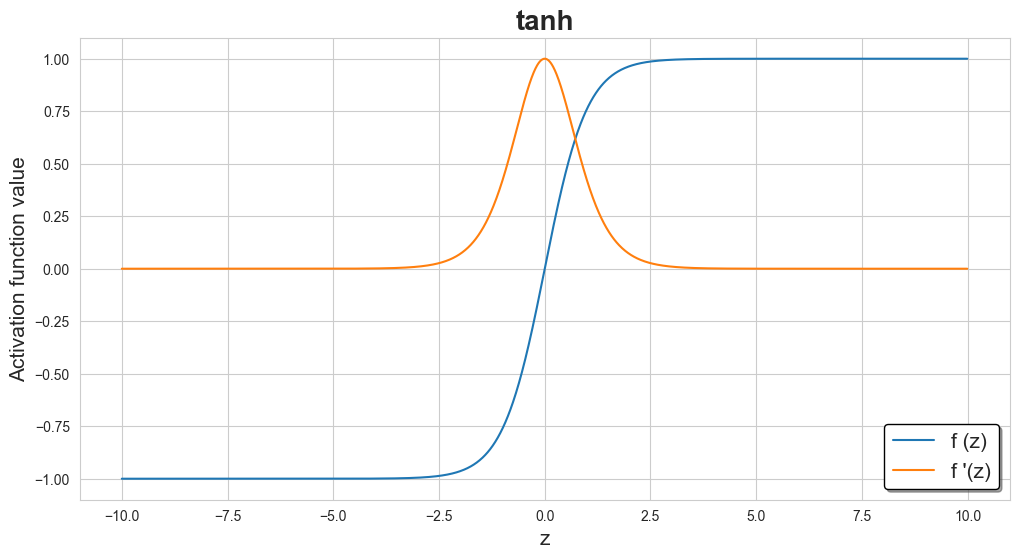

In [18]:
# Función Tangente Hiperbólica (tanh)
z = np.arange(-10, 10, 0.01)  # Mismo rango de valores que la sigmoide
f = np.tanh(z)                # Calcula la tangente hiperbólica
df = 1 - f*f                  # Calcula derivada usando identidad matemática
make_plot(z, f, df, "tanh")   # Genera gráfico comparativo

### ReLU

$${\displaystyle f(x) = \begin{cases}
0 & \text{ if } x<0 \\ 
x & \text{ if } x\geq x 
\end{cases}}
\hspace{1cm}
{\displaystyle f(x) = \begin{cases}
0 & \text{ if } x<0 \\ 
1 & \text{ if } x\geq x 
\end{cases}}$$

<Figure size 640x480 with 0 Axes>

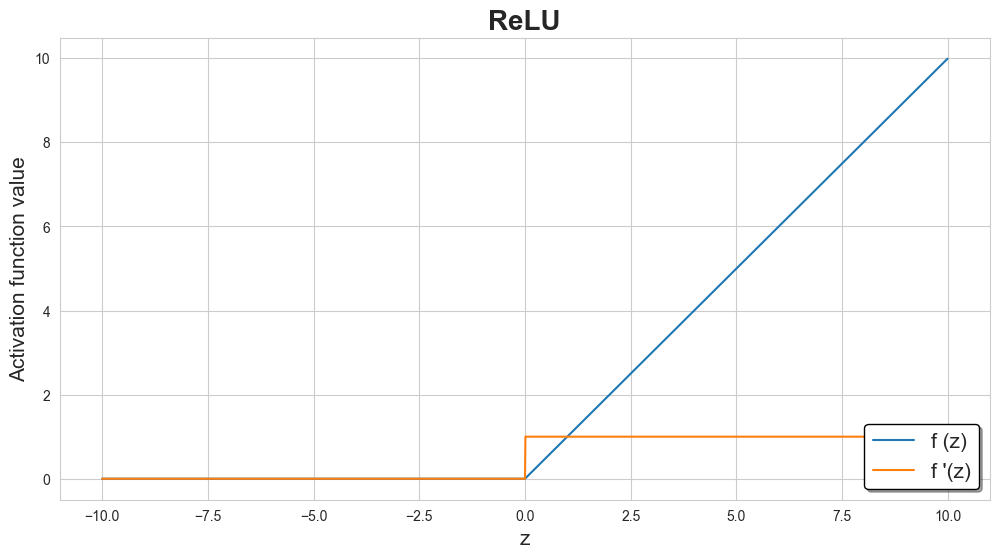

In [19]:
# Función ReLU (Unidad Lineal Rectificada)
z = np.arange(-10, 10, 0.01)  # Rango de valores para evaluación
f = np.where(z>0, z, 0)              # ReLU: x si x>0, 0 en otro caso (usando operación vectorizada)
df = np.where(z>0, 1, 0)            # Derivada: 1 si x>0, 0 en otro caso
make_plot(z, f, df, "ReLU")  # Crea gráfico con función y su derivada

### Leaky ReLU

$${\displaystyle f(x) = \begin{cases}
0.01 \cdot x & \text{ if } x<0 \\ 
x & \text{ if } x\geq x 
\end{cases}}
\hspace{1cm}
{\displaystyle f(x) = \begin{cases}
0.01 & \text{ if } x<0 \\ 
1 & \text{ if } x\geq x 
\end{cases}}$$

<Figure size 640x480 with 0 Axes>

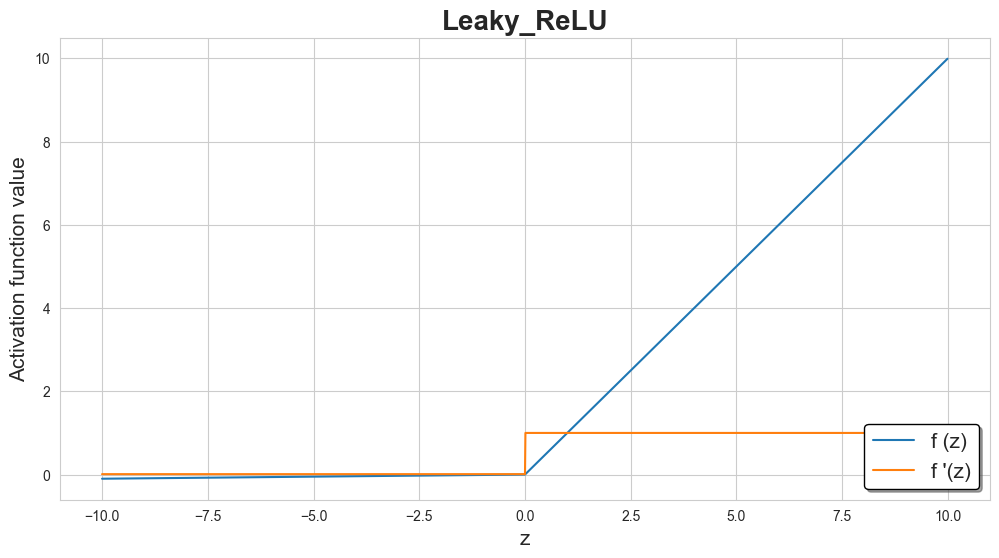

In [20]:
# Función Leaky ReLU (ReLU con fugas)
z = np.arange(-10, 10, 0.01)  # Mismo rango de valores
# Calcula Leaky ReLU: x si x>0, 0.01x en otro caso (evita neuronas "muertas")
f = np.where(z > 0, z, z * 0.01)
# Derivada: 1 si x>0, 0.01 en otro caso
df = np.where(z > 0, 1, 0.01)
make_plot(z, f, df, "Leaky_ReLU")  # Genera gráfico comparativo

# Binary classification visualizations
---

### Imports

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical  # Para funciones como to_categorical
%matplotlib inline

### Settings

In [22]:
# Número total de muestras en el dataset
N_SAMPLES = 1000

# Proporción de datos para prueba (10%)
TEST_SIZE = 0.1

# Número de épocas de entrenamiento
N_EPOCHS = 50

# Límites para la visualización del grid
GRID_X_START = -1.5  # Límite izquierdo del gráfico
GRID_X_END = 1.5     # Límite derecho del gráfico
GRID_Y_START = -1.5  # Límite inferior del gráfico
GRID_Y_END = 1.5     # Límite superior del gráfico

# Directorio para guardar visualizaciones
OUTPUT_DIR = "binary_classification_vizualizations"

### Create artificial dataset

In [23]:
# ------------------------------
# Creación del dataset sintético
# ------------------------------

# Generar datos circulares concéntricos:
# - factor: radio interno (0.3 = 30% del radio externo)
# - noise: ruido en los datos (10%)
X, y = make_circles(n_samples=N_SAMPLES, factor=.3, noise=.10)

# Dividir datos en entrenamiento (90%) y prueba (10%)
# random_state=42 para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)


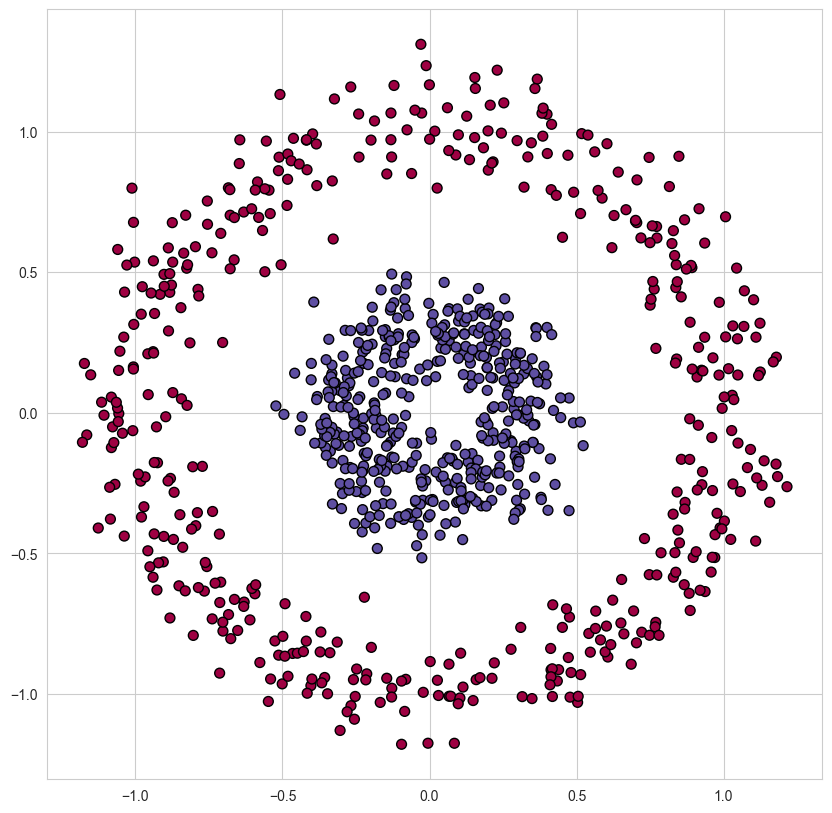

In [24]:
# ------------------------------
# Visualización del dataset
# ------------------------------

# Crear figura de 10x10 pulgadas
plt.figure(figsize=(10,10))

# Estilo de fondo con cuadrícula
sns.set_style("whitegrid")

# Graficar puntos de entrenamiento:
# - c=y_train: colorear según etiqueta (0 o 1)
# - s=50: tamaño de puntos
# - cmap=plt.cm.Spectral: mapa de colores
# - edgecolors='black': bordes negros
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')

# Guardar figura en archivo
plt.savefig("dataset.png")

### Definition of grid boundaries and storage of loss and accuracy history

In [25]:
# ------------------------------
# Preparación del grid para visualización
# ------------------------------

# Crear grid 2D de 100x100 puntos entre -1.5 y 1.5
grid = np.mgrid[GRID_X_START:GRID_X_END:100j, GRID_X_START:GRID_Y_END:100j]

# Reformatear a matriz de coordenadas (10000x2)
grid_2d = grid.reshape(2, -1).T

# Separar coordenadas X e Y para graficar
X, Y = grid

# Historial para almacenar precisión y pérdida
acc_history = []
loss_history = []


### Auxiliary functions

In [26]:
# ------------------------------
# Función auxiliar: formateo de números
# ------------------------------

def makeIndexOfLength(index, length):
    """Convierte un número en cadena con ceros a la izquierda
    Ej: 5 -> '005' si length=3
    Args:
        index (int): Número a formatear
        length (int): Longitud deseada
    Returns:
        str: Cadena formateada con ceros
    """
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)


In [27]:
import os

# ------------------------------
# Función de visualización durante entrenamiento
# ------------------------------

def save_model_prediction_graph(epoch, logs):
    """Callback que genera y guarda gráficos en cada época
    Args:
        epoch (int): Número de época actual
        logs (dict): Métricas de entrenamiento
    """
    
    # Asegurar que el directorio existe
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    # 1. Visualización de frontera de decisión --------------------------
    
    # Predecir probabilidades para todo el grid
    prediction_probs = model.predict(grid_2d, batch_size=32, verbose=0)
    
    # Configurar figura
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    
    # Título dinámico con número de época formateado
    plt.title(f'Clasificación Binaria con Keras - Época: {makeIndexOfLength(epoch, 3)}', fontsize=20)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    
    # Crear mapa de contorno con las predicciones
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha=0.7, cmap=cm.Spectral)
    
    # Graficar puntos de entrenamiento
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
    
    # Guardar imagen
    plt.savefig(f"./{OUTPUT_DIR}/keras{makeIndexOfLength(epoch, 3)}.png")
    plt.close()
    
    # 2. Actualización de métricas de entrenamiento ---------------------
    
    # Registrar precisión y pérdida
    acc_history.append(logs['accuracy'])
    loss_history.append(logs['loss'])
    
    # Configurar figura para métricas
    plt.figure(figsize=(12,8))
    sns.set_style("whitegrid")
    
    # Graficar series temporales
    plt.plot(acc_history)
    plt.plot(loss_history)
    
    # Configurar título y etiquetas
    plt.title(f'Precisión y Pérdida - Época: {makeIndexOfLength(epoch, 3)}', fontsize=20)
    plt.ylabel('Valor')
    plt.xlabel('Época')
    plt.xlim([0,N_EPOCHS])
    
    # Leyenda y guardado
    plt.legend(['Precisión', 'Pérdida'], loc='upper left')
    plt.savefig(f"./{OUTPUT_DIR}/loss_acc_{makeIndexOfLength(epoch, 3)}.png")
    plt.close()

### Model definition

In [28]:
# ------------------------------
# Definición del modelo neuronal
# ------------------------------

# Crear modelo secuencial (capas lineales)
model = Sequential()

# Capa de entrada (2 características) + 4 neuronas con ReLU
model.add(Dense(4, activation='relu', input_shape=(2,)))

# Capas ocultas:
model.add(Dense(6, activation='relu'))  # 6 neuronas con ReLU
model.add(Dense(6, activation='relu'))  # 6 neuronas con ReLU
model.add(Dense(4, activation='relu'))  # 4 neuronas con ReLU

# Capa de salida: 1 neurona con sigmoide (probabilidad)
model.add(Dense(1, activation='sigmoid'))

model.summary()

c:\Users\alvar\OneDrive - Tajamar\IAGen-desarrollo\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117 (468.00 B)

 Trainable params: 117 (468.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Crear callback que ejecuta nuestra función en cada época
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=save_model_prediction_graph)


In [30]:
# ------------------------------
# Compilación del modelo
# ------------------------------

# Configurar el modelo para entrenamiento:
# - Pérdida: entropía cruzada binaria
# - Optimizador: Adamax (variante de Adam)
# - Métrica a monitorear: precisión
model.compile(
    optimizer=keras.optimizers.Adamax(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.Precision(),
            keras.metrics.Accuracy()]
)

In [31]:
# ------------------------------
# Entrenamiento del modelo
# ------------------------------

# Entrenar el modelo con:
# - Datos de entrenamiento
# - 50 épocas
# - Callback para visualización
# - Sin salida verbose
history = model.fit(X_train, y_train, epochs=50, verbose=0, callbacks=[testmodelcb])

# Evaluación final con datos de prueba
score = model.evaluate(X_test, y_test, verbose=0)

# Impresión de resultados
print('Pérdida en prueba:', score[0])
print('Precisión en prueba:', score[1])

Pérdida en prueba: 0.18442748486995697
Precisión en prueba: 1.0


### Expected results

Nothing's going on? Don't worry... If you have created OUTPUT_DIR before, it should now be filled with successive frames of your future animation. My first frame looks like this, but yours certainly look different.  This is not a mistake. The neural network, which we visualize, each time we train it, will behave a bit differently.

According to the settings I chose, a total of 50 such keyframes will be created.

Now all you need to do is enter OUTPUT_DIR and use ImageMagick to create a final gif with one command.

```bash
convert -delay 10 -loop 0 *.png keras_class_boundaries.gif
```

# Create your own layer

We are going to create a cusom layer. The goal of this layer is to create a multi layer perceptron. By doing so, we can also learn how to use some low level operation with tensorflow 2.0.

In [32]:
# ------------------------------
# Importación de bibliotecas esenciales
# ------------------------------
import tensorflow as tf  # Framework principal para deep learning
import numpy as np       # Manipulación de datos numéricos

## Be sure to used Tensorflow 2.0

In [33]:
# ------------------------------
# Verificación de versión de TensorFlow
# ------------------------------
# Comprueba que exista la función 'function' (disponible en TF 2.0+)
assert hasattr(tf, "function")  # Garantiza el uso de TF 2.0 con ejecución eager


## Multi Layer Perceptron

This layer has no real purpose and should never be used in production. This is just an example to show how to create a custom layer. 

In [34]:
# ------------------------------
# Definición de capa personalizada MLP
# ------------------------------
class MlpLayer(tf.keras.layers.Layer):
    """Capa personalizada que implementa un Multi-Layer Perceptron (MLP)
    Args:
        units (list): Lista de enteros con número de neuronas por capa
        activations (list): Lista de strings con funciones de activación
    """
    
    def __init__(self, units, activations, **kwargs):
        # Inicialización de la clase base (Layer)
        super(MlpLayer, self).__init__(**kwargs)
        self.units = units          # Número de neuronas por capa (ej: [4, 2])
        self.activations_list = activations  # Funciones de activación (ej: ["relu", "softmax"])
        self.weights_list = []      # Lista para almacenar los pesos de cada capa

    def build(self, input_shape):
        """Método que crea los pesos de la capa cuando se conoce la forma de entrada"""
        i = 0
        for units in self.units:
            # Crea pesos entrenables para cada capa:
            # - Forma: (unidades_entrada, unidades_salida)
            # - Inicialización: valores uniformes
            weights = self.add_weight(
                name=f'weights-{i}',               # Nombre único para cada peso
                shape=(input_shape[1], units),     # Forma de la matriz de pesos
                initializer='uniform',              # Inicializador de pesos
                trainable=True                      # Los pesos son entrenables
            )
            i += 1
            self.weights_list.append(weights)       # Almacenar pesos en la lista
            input_shape = (None, units)             # Actualizar forma para próxima capa
        super(MlpLayer, self).build(input_shape)    # Finalizar construcción

    def call(self, x):
        """Método de propagación hacia adelante"""
        output = x  # Inicializar con la entrada
        
        # Aplicar cada capa con su activación correspondiente
        for weights, activation in zip(self.weights_list, self.activations_list):
            # Multiplicación matricial (W * X)
            output = tf.matmul(output, weights)
            
            # Aplicar función de activación
            if activation == "relu":
                output = tf.nn.relu(output)     # Activación ReLU
            elif activation == "sigmoid":
                output = tf.nn.sigmoid(output)  # Activación Sigmoide
            elif activation == "softmax":
                output = tf.nn.softmax(output)  # Activación Softmax
        
        return output

    def get_config(self):
        """Método necesario para serializar la capa (guardar/cargar modelo)"""
        config = {
            'units': self.units,
            'activations': self.activations_list
        }
        # Combinar con configuración de la clase base
        base_config = super(MlpLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

# ------------------------------
# Creación y prueba del modelo con capa personalizada
# ------------------------------

# Crear modelo secuencial
model = tf.keras.models.Sequential()

# Añadir capa MLP personalizada:
# - 2 capas: 4 y 2 neuronas
# - Activaciones: ReLU y Softmax
model.add(MlpLayer([4, 2], activations=['relu', 'softmax']))

# Probar con datos de entrada dummy (5 muestras, 10 características)
# El modelo genera una predicción para verificar su funcionamiento
model.predict(np.zeros((5, 10)))  # Salida: 5 predicciones con 2 clases (softmax)



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]], dtype=float32)

In [35]:
# ------------------------------
# Guardado y carga del modelo con capa personalizada
# ------------------------------

# Guardar modelo completo en archivo HDF5
model.save("custom_layer_in_model.h5")

# Para cargar el modelo, debemos especificar la capa personalizada
custom_objects = {'MlpLayer': MlpLayer}  # Mapeo de clases personalizadas
loaded_model = tf.keras.models.load_model(
    "custom_layer_in_model.h5",
    custom_objects=custom_objects
)

# Eager Mode

In [36]:
import tensorflow as tf
import numpy as np

Everything is eager by default in tensorflow 2.0

In [37]:
# ------------------------------
# Ejecución en modo Eager
# ------------------------------

# En TF 2.x, todas las operaciones son eager por defecto
a = np.array([1., 2.])  # Tensor implícito (float32)
b = np.array([2., 5.])
tf.add(a, b)  # Ejecución inmediata: devuelve tf.Tensor([3., 7.], ...)


<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3., 7.])>

## Graph Model : AutoGraph
As tensorflow suggest (https://www.youtube.com/watch?v=jh4ITuOytE4), we can use Autograph to automatically convert  eager function to graph function by using the tf.function decorator

The following code first compiles inside the function into graph code before to execute it. Note that if you remove the @tf.function decorator the code will work perfectly but will not be executed in graph mode.

In [38]:
# ------------------------------
# Conversión a Graph Mode con AutoGraph
# ------------------------------

@tf.function  # Decorador para convertir a gráfico computacional
def add_fc(a, b):
    return tf.add(a, b)

# La función se ejecuta en modo gráfico pero con sintaxis de Python
print(add_fc(a, b))  # Salida: tf.Tensor([3. 7.], shape=(2,), dtype=float32)


tf.Tensor([3. 7.], shape=(2,), dtype=float64)


The following code show the code generated to create the graph

In [39]:
# ------------------------------
# Inspección de código generado por AutoGraph
# ------------------------------

def add_fc(a, b):
    return tf.add(a, b)

# Muestra el código Python convertido a gráfico de TF
print(tf.autograph.to_code(add_fc))


def tf__add_fc(a, b):
    with ag__.FunctionScope('add_fc', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.converted_call(ag__.ld(tf).add, (ag__.ld(a), ag__.ld(b)), None, fscope)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



# Graph mode and eager mode  with a keras model

In [40]:
# ------------------------------
# Modelo Keras con diferentes modos de ejecución
# ------------------------------

# Crear modelo secuencial estándar
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),   # Capa densa con 256 neuronas - relu
    tf.keras.layers.Dense(128, activation='relu'),   # Capa densa con 128 neuronas - relu
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases - softmax
])

By calling model.predict you get a numpy array but the output is not differentiable

In [41]:
# Modo predict: ejecución por lotes (batch), devuelve numpy array
model_output = model.predict(np.zeros((1, 30)))  # Entrada dummy (1 muestra, 30 features)
model_output  # Salida: array numpy con probabilidades (no diferenciable)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)

By calling model(), eager execution is used and the output is differentiable

In [42]:
# Llamada directa: ejecución eager, devuelve tensor diferenciable
model_output = model(np.zeros((1, 30)))  # Misma entrada pero como tensor
model_output  # Salida: tf.Tensor con gradientes


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)>

Of course, you can execute the model in graph mode by using the @tf.function decorator

In [43]:
# ------------------------------
# Uso de @tf.function con modelo Keras
# ------------------------------

@tf.function  # Compila la función en gráfico computacional
def predict(x):
    return model(x)

# Ejecuta en modo gráfico (optimizado)
model_output = predict(np.zeros((1, 30)))
print(model_output)  # Salida similar pero con optimizaciones de gráfico

tf.Tensor([[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]], shape=(1, 10), dtype=float32)


## Simplest Introduction to Neural Networks with Keras


### Neural Frameworks



### Getting things ready

Keras is a part of Tensorflow 2.x framework. Let's make sure we have version 2.x.x of Tensorflow installed:
```
pip install tensorflow
```
or
```
conda install tensorflow
```

In [44]:
# ------------------------------
# Verificación de versiones de TensorFlow/Keras
# ------------------------------
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Imprimir versiones para verificar compatibilidad
print(f'Tensorflow version = {tf.__version__}')
print(f'Keras version = {keras.__version__}')


Tensorflow version = 2.19.0
Keras version = 3.9.0


## Basic Concepts: Tensor

**Tensor** is a multi-dimensional array. It is very convenient to use tensors to represent different types of data:
* 400x400 - black-and-white picture
* 400x400x3 - RGB color picture 
* 16x400x400x3 - minibatch of 16 color pictures
* 25x400x400x3 - one second of 25-fps video
* 8x25x400x400x3 - minibatch of 8 1-second videos

Tensors give us a convenient way to represent input/output data, as well we weights inside the neural network.

## Sample Problem

Let's consider binary classification problem. A good example of such a problem would be a tumour classification between malignant and benign based on it's size and age. Let's start by generating some sample data:


In [45]:
# ------------------------------
# Generación de dataset sintético
# ------------------------------
np.random.seed(0)  # Fijar semilla para reproducibilidad

# Crear dataset de clasificación binaria:
# - n_samples: 100 muestras totales
# - n_features: 2 características (para visualización 2D)
# - n_redundant: 0 características redundantes
# - n_informative: 2 características informativas
# - flip_y: 5% de ruido en etiquetas
# - class_sep: separación amplia entre clases (1.5)
n = 100
X, Y = make_classification(n_samples=n, n_features=2,
                           n_redundant=0, n_informative=2, 
                           flip_y=0.05, class_sep=1.5)

# Convertir tipos para compatibilidad con TensorFlow
X = X.astype(np.float32)
Y = Y.astype(np.int32)

# Dividir dataset en entrenamiento (70%) y prueba (30%)
split = [70 * n // 100]
train_x, test_x = np.split(X, split)
train_labels, test_labels = np.split(Y, split)

In [46]:
import matplotlib.pyplot as plt
import numpy as np
# ------------------------------
# Función de visualización de datos
# ------------------------------
def plot_dataset(features, labels, W=None, b=None):
    # Crear figura de 8x6 pulgadas
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # Configurar etiquetas de ejes
    ax.set_xlabel('$x_i[0]$ -- (Característica 1)')
    ax.set_ylabel('$x_i[1]$ -- (Característica 2)')
    
    # Mapear etiquetas a colores: rojo para clase 1, azul para clase 0
    colors = ['r' if l else 'b' for l in labels]
    
    # Graficar puntos con transparencia (alpha=0.5) y bordes negros
    ax.scatter(features[:, 0], features[:, 1], 
               marker='o', c=colors, s=100, alpha=0.5, edgecolors='black')
    
    # Dibujar límite de decisión si se proporcionan parámetros
    if W is not None and b is not None:
        # Calcular rango para la línea de decisión
        min_x = np.min(features[:, 0])
        max_x = np.max(features[:, 0])
        cx = np.linspace(min_x, max_x, 100)  # 100 puntos en eje X
        
        # Ecuación de la línea de decisión: W0*x + W1*y + b = 0.5
        # Despejar y: y = (0.5 - W0*x - b) / W1
        cy = (0.5 - W[0] * cx - b) / W[1]
        
        # Graficar línea verde con ancho 2
        ax.plot(cx, cy, 'g', lw=2, label='Frontera de decisión')
        ax.legend()  # Mostrar leyenda
    
    # Ajustar diseño y mostrar gráfico
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Cerrar figura para liberar memoria

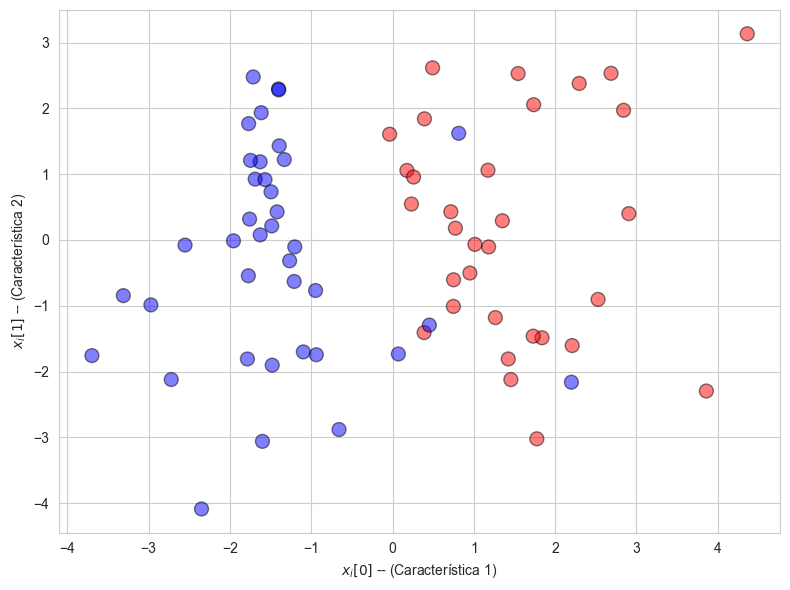

In [47]:
plot_dataset(train_x, train_labels)

## Normalizing Data

Before training, it is common to bring our input features to the standard range of [0,1] (or [-1,1]). The exact reasons for that we will discuss later in the course, but in short the reason is the following. We want to avoid values that flow through our network getting too big or too small, and we normally agree to keep all values in the small range close to 0. Thus we initialize the weights with small random numbers, and we keep signals in the same range.

When normalizing data, we need to subtract min value and divide by range. We compute min value and range using training data, and then normalize test/validation dataset using the same min/range values from the training set. This is because in real life we will only know the training set, and not all incoming new values that the network would be asked to predict. Occasionally, the new value may fall out of the [0,1] range, but that's not crucial.  

In [48]:
# ------------------------------
# Normalización de características
# ------------------------------
# Calcular mínimos y rangos usando solo datos de entrenamiento
train_min = np.min(train_x, axis=0)
train_range = np.max(train_x, axis=0) - train_min

# Aplicar normalización min-max a entrenamiento y prueba
# Fórmula: (x - min) / (max - min)
train_x_norm = (train_x - train_min) / train_range
test_x_norm = (test_x - train_min) / train_range  # Usar mismos parámetros que entrenamiento


## Training One-Layer Network (Perceptron)

In many cases, a neural network would be a sequence of layers. It can be defined in Keras using `Sequential` model in the following manner:

In [49]:
# ------------------------------
# Definición de modelo de perceptrón
# ------------------------------
# Crear modelo secuencial (capas apiladas)
model = keras.models.Sequential()

# Capa de entrada + perceptrón:
# - input_shape: (2,) para 2 características
# - Dense(1): 1 neurona de salida
# - activation='sigmoid': función de activación para probabilidad [0,1]
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))


# Resumen del modelo: muestra capas y parámetros entrenables
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Here, we first create the model, and then add layers to it:
* First `Input` layer (which is not strictly speaking a layer) contains the specification of network's input size
* `Dense` layer is the actual perceptron that contains trainable weights
* Finally, there is a layer with *sigmoid* `Activation` function to bring the result of the network into 0-1 range (to make it a probability).

Input size, as well as activation function, can also be specified directly in the `Dense` layer for brevity: 

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_shape=(2,),activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Before training the model, we need to **compile it**, which essentially mean specifying:
* **Loss function**, which defines how loss is calculated. Because we have two-class classification problem, we will use *binary cross-entropy loss*.
* **Optimizer** to use. The simplest option would be to use `sgd` for *stochastic gradient descent*, or you can use more sophisticated optimizers such as `adam`.
* **Metrics** that we want to use to measure success of our training. Since it is classification task, a good metrics would be `Accuracy` (or `acc` for short)

We can specify loss, metrics and optimizer either as strings, or by providing some objects from Keras framework. In our example, we need to specify `learning_rate` parameter to fine-tune learning speed of our model, and thus we provide full name of Keras SGD optimizer.

In [51]:

# ------------------------------
# Compilación del modelo
# ------------------------------
# Configurar:
# - Optimizador: SGD con tasa de aprendizaje 0.2
# - Función de pérdida: entropía cruzada binaria
# - Métrica: precisión (accuracy)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.2),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy()]
)


After compiling the model, we can do the actual training by calling `fit` method. The most important parameters are:
* `x` and `y` specify training data, features and labels respectively
* If we want validation to be performed on each epoch, we can specify `validation_data` parameter, which would be a tuple of features and labels
* `epochs` specified the number of epochs
* If we want training to happen in minibatches, we can specify `batch_size` parameter. You can also pre-batch the data manually before passing it to `x`/`y`/`validation_data`, in which case you do not need `batch_size`

In [52]:
# ------------------------------
# Entrenamiento del modelo
# ------------------------------
# Parámetros:
# - x: características de entrenamiento normalizadas
# - y: etiquetas de entrenamiento
# - validation_data: conjunto de validación (prueba)
# - epochs: 10 pasadas completas sobre los datos
# - batch_size: 1 (entrenamiento estilo online)
history = model.fit(x=train_x_norm, y=train_labels,
                    validation_data=(test_x_norm, test_labels),
                    epochs=10, batch_size=1)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.8155 - val_accuracy: 0.0000e+00 - val_loss: 0.6856
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.7062 - val_accuracy: 0.0000e+00 - val_loss: 0.6006
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6174 - val_accuracy: 0.0000e+00 - val_loss: 0.5618
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5503 - val_accuracy: 0.0000e+00 - val_loss: 0.5159
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5100 - val_accuracy: 0.0000e+00 - val_loss: 0.4694
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4352 - val_accuracy: 0.0000e+00 - val_loss: 0.4338
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4625 - val_accuracy: 0.0000e+00 - val_loss: 0.4112
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

You can try to experiment with different training parameters to see how they affect the training:
* Setting `batch_size` to be too large (or not specifying it at all) may result in less stable training, because with low-dimensional data small batch sizes provide more precise direction of the gradient for each specific case
* Too high `learning_rate` may result in overfitting, or in less stable results, while too low learning rate means it will take more epochs to achieve the result

> Note that you can call `fit` function several times in a row to further train the network. If you want to start training from scratch - you need to re-run the cell with the model definition. 

To make sure our training worked, let's plot the line that separates two classes. Separation line is defined by the equation $W\times x + b = 0.5$

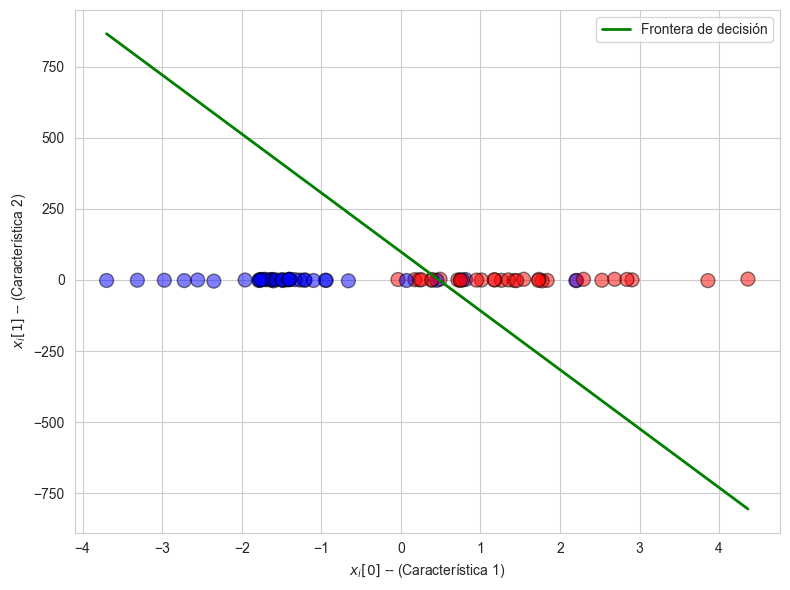

In [53]:
# ------------------------------
# Visualización de resultados
# ------------------------------
# Obtener pesos entrenados de la primera capa
weights = model.layers[0].get_weights()
W = weights[0]  # Pesos de las conexiones
b = weights[1]  # Sesgo (bias)

# Graficar dataset con frontera de decisión aprendida
plot_dataset(train_x, train_labels, W, b)


## Plotting the training graphs

`fit` function returns `history` object as a result, which can be used to observe loss and metrics on each epoch. In the example below, we will re-start the training with small learning rate, and will observe how the loss and accuracy behave.

> **Note** that we are using slightly different syntax for defining `Sequential` model. Instead of `add`-ing layers one by one, we can also specify the list of layers right when creating the model in the first place - this is a bit shorter syntax, and you may prefer to use it.

In [54]:
# ------------------------------
# Entrenamiento con tasa de aprendizaje más baja
# ------------------------------
# Re-definir modelo para reiniciar pesos
model = tf.keras.models.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid')
])

# Compilar con SGD de tasa 0.05
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Entrenar guardando el historial
hist = model.fit(x=train_x_norm, y=train_labels,
                 validation_data=(test_x_norm, test_labels),
                 epochs=10, batch_size=1)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7059 - loss: 0.6234 - val_accuracy: 0.8667 - val_loss: 0.5880
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.5895 - val_accuracy: 0.9000 - val_loss: 0.5704
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7666 - loss: 0.5906 - val_accuracy: 0.9000 - val_loss: 0.5597
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - loss: 0.5453 - val_accuracy: 0.9000 - val_loss: 0.5470
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.5470 - val_accuracy: 0.9000 - val_loss: 0.5358
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.5545 - val_accuracy: 0.9000 - val_loss: 0.5226
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.5575 - val_accuracy: 0.9000 - val_loss: 0.5121
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7689 - loss: 0.5427 - val_accuracy: 0.9333 - val_loss:

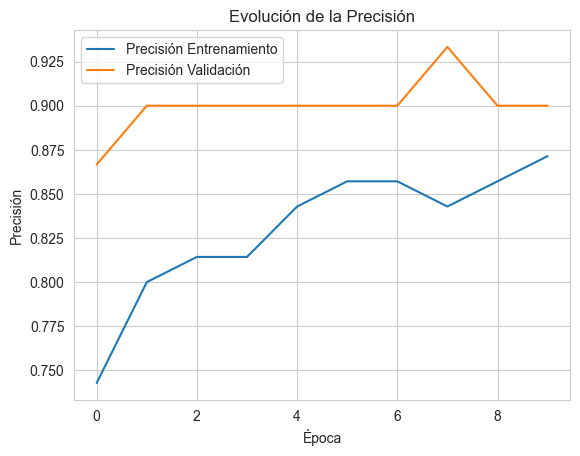

In [55]:
# ------------------------------
# Visualización de métricas de entrenamiento
# ------------------------------
# Graficar precisión de entrenamiento y validación
plt.plot(hist.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(hist.history['val_accuracy'], label='Precisión Validación')
plt.title('Evolución de la Precisión')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.show()

## Multi-Class Classification

If you need to solve a problem of multi-class classification, your network would have more that one output - corresponding to the number of classes $C$. Each output will contain the probability of a given class.

> Note that you can also use a network with two outputs to perform binary classification in the same manner. That is exactly what we will demonstrate now.

When you expect a network to output a set of probabilities $p_1,\dots, p_C$, we need all of them to add up to 1. To ensure this, we use `softmax` as a final activation function on the last layer. **Softmax** takes a vector input, and makes sure that all components of that vector are transformed into probabilities.

Also, since the output of the network is a $C$-dimensional vector, we need labels to have the same form. This can be achieved by using **one-hot encoding**, when the number of a class $i$ is converted to a vector of zeroes, with 1 at the $i$-th position.

To compare the probability output of the neural network with expected one-hot-encoded label, we use **cross-entropy loss** function. It takes two probability distributions, and outputs a value of how different they are.

So, to summarize what we need to do for multi-class classification with $C$ classes:
* The network should have $C$ neurons in the last layer
* Last activation function should be **softmax**
* Loss should be **cross-entropy loss**
* Labels should be converted to **one-hot encoding** (this can be done using `numpy`, or using Keras utils `to_categorical`)

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Asegúrate de que los datos sean numéricos (float32)
train_x_norm = train_x_norm.astype(np.float32)
test_x_norm = test_x_norm.astype(np.float32)

# Convertir etiquetas a one-hot encoding
train_labels_onehot = keras.utils.to_categorical(train_labels.astype(np.int32))
test_labels_onehot = np.eye(2)[test_labels.astype(np.int32)]

# Definir un modelo secuencial con una capa oculta de 5 neuronas (ReLU) y una capa de salida de 2 neuronas (softmax)  
model = keras.models.Sequential([
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compilar el modelo con optimizador Adam (lr=0.01), pérdida categorical_crossentropy y métrica accuracy  
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Entrenar con datos normalizados, etiquetas one-hot, validación con datos de prueba, batch_size=1 y epochs=10  
hist = model.fit(x=train_x_norm, y=train_labels_onehot,
                 validation_data=(test_x_norm, test_labels_onehot),
                 batch_size=1, epochs=10)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5818 - loss: 0.6717 - val_accuracy: 0.8667 - val_loss: 0.5925
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.5923 - val_accuracy: 0.9000 - val_loss: 0.5205
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8864 - loss: 0.5079 - val_accuracy: 0.8000 - val_loss: 0.4763
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8436 - loss: 0.4461 - val_accuracy: 0.9000 - val_loss: 0.3992
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.3679 - val_accuracy: 0.9333 - val_loss: 0.3319
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9115 - loss: 0.3062 - val_accuracy: 0.9333 - val_loss: 0.2936
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.3171 - val_accuracy: 0.9333 - val_loss: 0.2752
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 0.2593 - val_accuracy: 0.9000 - val_loss:

### Sparse Categorical Cross-Entropy

Often labels in multi-class classification are represented by class numbers. Keras also supports another kind of loss function called **sparse categorical crossentropy**, which expects class number to be integers, and not one-hot vectors. Using this kind of loss function, we can simplify our training code:

In [57]:
# Compilar el modelo con optimizador Adam (lr=0.01), pérdida sparse_categorical_crossentropy y métrica accuracy  

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)  

# Entrenar con datos normalizados, etiquetas enteras, validación con datos de prueba, batch_size=1 y epochs=1  

model.fit(train_x_norm, train_labels, validation_data=(test_x_norm, test_labels), batch_size=1, epochs=1)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9253 - loss: 0.2168 - val_accuracy: 0.9000 - val_loss: 0.2630


## Multi-Label Classification

Sometime we have cases when our objects can belong to two classes at once. As an example, suppose we want to develop a classifier for cats and dogs on the picture, but we also want to allow cases when both cats and dogs are present.

With multi-label classification, instead of one-hot encoded vector, we will have a vector that has 1 in position corresponding to all classes relevant to the input sample. Thus, output of the network should not have normalized probabilities for all classes, but rather for each class individually - which corresponds to using **sigmoid** activation function. Cross-entropy loss can still be used as a loss function.

> **Note** that this is very similar to using **different neural networks** to do binary classification for each particular class - only the initial part of the network (up to final classification layer) is shared for all classes.

## Summary of Classification Loss Functions

We have seen that binary, multi-class and multi-label classification differ by the type of loss function and activation function on the last layer of the network. It may all be a little bit confusing if you are just starting to learn, but here are a few rules to keep in mind:
* If the network has one output (**binary classification**), we use **sigmoid** activation function, for **multiclass classification** - **softmax**
* If the output class is represented as one-hot-encoding, the loss function will be **cross entropy loss** (categorical cross-entropy), if the output contains class number - **sparse categorical cross-entropy**.  For **binary classification** - use **binary cross-entropy** (same as **log loss**)
* **Multi-label classification** is when we can have an object belonging to several classes at the same time. In this case, we need to encode labels using one-hot encoding, and use **sigmoid** as activation function, so that each class probability is between 0 and 1.

| Classification | Label Format | Activation Function | Loss |
|---------------|-----------------------|-----------------|----------|
| Binary      | Probability of 1st class | sigmoid | binary crossentropy |
| Binary      | One-hot encoding (2 outputs) | softmax | categorical crossentropy |
| Multiclass |  One-hot encoding | softmax | categorical crossentropy |
| Multiclass | Class Number | softmax | sparse categorical crossentropy |
| Multilabel | One-hot encoding | sigmoid | categorical crossentropy |


**Task**: 
Use Keras to train a classifier for MNIST handwritten digits:
* Notice that Keras contains some standard datasets, including MNIST. To use MNIST from Keras, you only need a couple of lines of code (more information [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist))
* Try several network configuration, with different number of layers/neurons, activation functions.

What is the best accuracy you were able to achieve?

You can use arithmetic operations on tensors, which are performed element-wise, as in numpy. Tensors are automatically expanded to required dimension, if needed. To extract numpy-array from tensor, use `.numpy()`:

## Computing Gradients

For back propagation, you need to compute gradients. This is done using `tf.GradientTape()` idiom:
 * Add `with tf.GradientTape` block around our computations
 * Mark those tensors with respect to which we need to compute gradients by calling `tape.watch` (all variables are watched automatically)
 * Compute whatever we need (build computational graph)
 * Obtain gradients using `tape.gradient` 

In [58]:
# ------------------------------
# Cálculo de gradientes con GradientTape
# ------------------------------

# Creación de tensores aleatorios
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

# Bloque para cálculo automático de gradientes
with tf.GradientTape() as tape:
    tape.watch(a)  # Monitorear tensor 'a' para cálculo de gradientes
    c = tf.sqrt(tf.square(a) + tf.square(b))  # Función compuesta
    dc_da = tape.gradient(c, a)  # Derivada de c respecto a a

print(dc_da)


tf.Tensor(
[[0.9964424  0.5365636 ]
 [0.9810173  0.81825227]], shape=(2, 2), dtype=float32)


## Example 1: Linear Regression

Now we know enough to solve the classical problem of **Linear regression**. Let's generate small synthetic dataset:

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

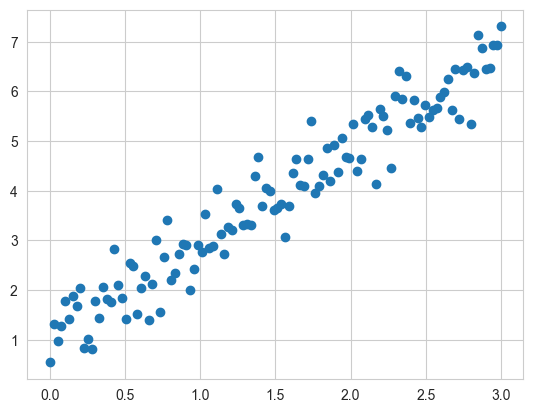

In [60]:
# ------------------------------
# Regresión Lineal: Generación de datos
# ------------------------------

# Configuración de semilla para reproducibilidad
np.random.seed(13)

# Generación de datos lineales con ruido
train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

# Visualización de los datos generados
plt.scatter(train_x, train_labels)


Linear regression is defined by a straight line $f_{W,b}(x) = Wx+b$, where $W, b$ are model parameters that we need to find. An error on our dataset $\{x_i,y_u\}_{i=1}^N$ (also called **loss function**) can be defined as mean square error:
$$
\mathcal{L}(W,b) = {1\over N}\sum_{i=1}^N (f_{W,b}(x_i)-y_i)^2
$$

Let's define our model and loss function:

In [61]:
# ------------------------------
# Definición del modelo de regresión lineal
# ------------------------------

input_dim = 1    # Dimensión de entrada (característica única)
output_dim = 1   # Dimensión de salida (valor a predecir)
learning_rate = 0.1

# Variables entrenables del modelo
w = tf.Variable([[100.0]])  # Inicialización deliberadamente mala para demostrar el aprendizaje
b = tf.Variable(tf.zeros(shape=(output_dim,)))

# Función de predicción lineal
def f(x):
    return tf.matmul(x, w) + b

# Función de pérdida MSE (Error Cuadrático Medio)
def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))


We will train the model on a series of minibatches. We will use gradient descent, adjusting model parameters using the following formulae:
$$
\begin{array}{l}
W^{(n+1)}=W^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial W} \\
b^{(n+1)}=b^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial b} \\
\end{array}
$$

In [62]:
# ------------------------------
# Entrenamiento manual por lotes
# ------------------------------

def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = f(x)
        loss = compute_loss(y, predictions)
        # Cálculo de gradientes para w y b
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    
    # Actualización de parámetros usando descenso de gradiente
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss




Let's do the training. We will do several passes through the dataset (so-called **epochs**), divide it into minibatches and call the function defined above:

In [63]:
# Preparación de datos y entrenamiento
indices = np.random.permutation(len(train_x))
features = tf.constant(train_x[indices], dtype=tf.float32)
labels = tf.constant(train_labels[indices], dtype=tf.float32)


In [64]:
# Entrenamiento por épocas con mini-lotes
batch_size = 4
for epoch in range(10):
    for i in range(0, len(features), batch_size):
        # Reformatear datos para mantener dimensionalidad correcta
        x_batch = tf.reshape(features[i:i+batch_size], (-1, 1))
        y_batch = tf.reshape(labels[i:i+batch_size], (-1, 1))
        loss = train_on_batch(x_batch, y_batch)
    print(f'Epoch {epoch}: last batch loss = {float(loss):.4f}')


Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


We now have obtained optimized parameters $W$ and $b$. Note that their values are similar to the original values used when generating the dataset ($W=2, b=1$)

In [65]:
w,b

(<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.8616778]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0710956], dtype=float32)>)

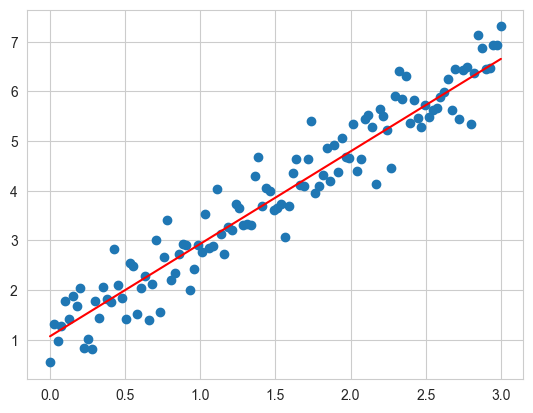

In [66]:
# ------------------------------
# Visualización del modelo de regresión entrenado
# ------------------------------
plt.scatter(train_x, train_labels)  # Graficar datos de entrenamiento
x = np.array([min(train_x), max(train_x)])  # Crear puntos extremos del eje X
y = w.numpy()[0,0] * x + b.numpy()[0]  # Calcular línea de regresión usando parámetros aprendidos
plt.plot(x, y, color='red')  # Dibujar línea de regresión en rojo


## Computational Graph and GPU Computations

Whenever we compute tensor expression, Tensorflow builds a computational graph that can be computed on the available computing device, e.g. CPU or GPU. Since we were using arbitrary Python function in our code, they cannot be included as part of computational graph, and thus when running our code on GPU we would need to pass the data between CPU and GPU back and forth, and compute custom function on CPU.

Tensorflow allows us to mark our Python function using `@tf.function` decorator, which will make this function a part of the same computational graph. This decorator can be applied to functions that use standard Tensorflow tensor operations. 

In [67]:
# Función de entrenamiento optimizada con tf.function
# ------------------------------
@tf.function  # Decorador para compilar a gráfico computacional estático (mejor rendimiento)
def train_on_batch(x, y):
    with tf.GradientTape() as tape:  # Contexto para registrar operaciones y calcular gradientes
        predictions = f(x)  # Obtener predicciones del modelo
        loss = compute_loss(y, predictions)  # Calcular pérdida MSE
        
        # Calcular gradientes para ambos parámetros (w y b)
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    
    # Actualizar pesos usando descenso de gradiente
    w.assign_sub(learning_rate * dloss_dw)  # w = w - η * ∂L/∂w
    b.assign_sub(learning_rate * dloss_db)  # b = b - η * ∂L/∂b
    return loss

The code has not changed, but if you were running this code on GPU and on larger dataset - you would have noticed the difference in speed. 

## Dataset API

Tensorflow contains a convenient API to work with data. Let's try to use it. We will also train our model from scratch.

In [68]:
# ------------------------------
# Re-inicialización y entrenamiento con Dataset API
# ------------------------------
# Reiniciar parámetros a valores iniciales (para demostración)
w.assign([[10.0]])  # Asignar valor inicial alto deliberadamente
b.assign([0.0])      # Bias inicial en cero

# Crear dataset TensorFlow para manejo eficiente de datos:
# - from_tensor_slices: Crear dataset de tensores
# - shuffle: Mezclar datos con buffer de 1024 elementos
# - batch: Crear lotes de 256 muestras
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((train_x.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

# Ciclo de entrenamiento por épocas

for epoch in range(10):
  # Iterar por todos los lotes del dataset
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(tf.reshape(x,(-1,1)), tf.reshape(y,(-1,1)))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))



Epoch 0: last batch loss = 173.4585
Epoch 1: last batch loss = 13.8459
Epoch 2: last batch loss = 4.5407
Epoch 3: last batch loss = 3.7364
Epoch 4: last batch loss = 3.4334
Epoch 5: last batch loss = 3.1790
Epoch 6: last batch loss = 2.9458
Epoch 7: last batch loss = 2.7311
Epoch 8: last batch loss = 2.5332
Epoch 9: last batch loss = 2.3507


## Example 2: Classification

Now we will consider binary classification problem. A good example of such a problem would be a tumour classification between malignant and benign based on it's size and age.

The core model is similar to regression, but we need to use different loss function. Let's start by generating sample data:


In [69]:
# ------------------------------
# Clasificación Binaria: Generación de datos
# ------------------------------

np.random.seed(0)  # Para reproducibilidad

# Generación de datos sintéticos para clasificación
n = 100
X, Y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                          n_informative=2, flip_y=0.05, class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

# División en conjuntos de entrenamiento, validación y prueba
split = [70*n//100, (15+70)*n//100]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)

In [70]:
def plot_dataset(features, labels, W=None, b=None):
    """Visualiza un dataset de clasificación binaria con opción de mostrar frontera de decisión.
    
    Args:
        features (np.array): Array 2D con las características (features) de los datos
        labels (np.array): Array 1D con las etiquetas de clase (0 o 1)
        W (np.array, opcional): Vector de pesos del modelo. Default: None
        b (float, opcional): Término de bias del modelo. Default: None
    """
    
    # Configuración inicial del gráfico
    fig, ax = plt.subplots(1, 1)  # Crear figura y ejes
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')  # Etiqueta eje X
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')  # Etiqueta eje Y
    
    # Asignar colores según las etiquetas: rojo para clase 1, azul para clase 0
    colors = ['r' if l else 'b' for l in labels]
    
    # Graficar los puntos del dataset
    # - marker='o': forma circular
    # - s=100: tamaño de los puntos
    # - alpha=0.5: transparencia para mejor visualización de superposiciones
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha=0.5)
    
    # Si se proporcionan parámetros del modelo, dibujar frontera de decisión
    if W is not None:
        # Calcular límites del gráfico para la línea de decisión
        min_x = min(features[:, 0])  # Valor mínimo de la primera característica
        max_x = max(features[:, 1])  # Valor máximo de la segunda característica
        
        # Ajustar límites en Y para dejar margen alrededor de los puntos
        min_y = min(features[:, 1]) * (1 - 0.1)  # 10% de margen inferior
        max_y = max(features[:, 1]) * (1 + 0.1)  # 10% de margen superior
        
        # Crear puntos extremos para la línea de decisión en X
        cx = np.array([min_x, max_x], dtype=np.float32)
        
        # Calcular valores Y correspondientes para la línea de decisión:
        # La frontera de decisión ocurre donde W·X + b = 0.5 (para clasificación binaria)
        # Despejando y: W[0]*x + W[1]*y + b = 0.5 => y = (0.5 - W[0]*x - b)/W[1]
        cy = (0.5 - W[0] * cx - b) / W[1]
        
        # Dibujar línea de decisión en verde
        ax.plot(cx, cy, 'g', label='Frontera de decisión')
        
        # Establecer límites del eje Y para asegurar que la línea sea visible
        ax.set_ylim(min_y, max_y)
    
    # Mostrar el gráfico
    fig.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_21392\320432142.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


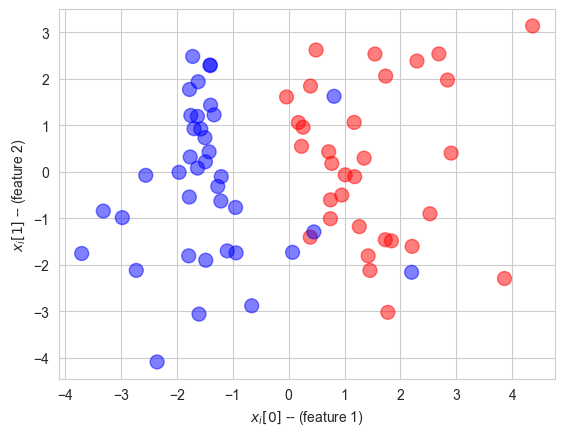

In [71]:
plot_dataset(train_x, train_labels)

## Normalizing Data

Before training, it is common to bring our input features to the standard range of [0,1] (or [-1,1]). The exact reasons for that we will discuss later in the course, but in short the reason is the following. We want to avoid values that flow through our network getting too big or too small, and we normally agree to keep all values in the small range close to 0. Thus we initialize the weights with small random numbers, and we keep signals in the same range.

When normalizing data, we need to subtract min value and divide by range. We compute min value and range using training data, and then normalize test/validation dataset using the same min/range values from the training set. This is because in real life we will only know the training set, and not all incoming new values that the network would be asked to predict. Occasionally, the new value may fall out of the [0,1] range, but that's not crucial.  

In [72]:
# ------------------------------
# Normalización de datos
# ------------------------------

# Normalizar datos de entrenamiento:
# Restar el mínimo de train_x y dividir por el rango (max-min) de train_x
# Esto lleva los valores al rango [0,1]
train_x_norm = (train_x - np.min(train_x)) / (np.max(train_x) - np.min(train_x))

# Normalizar datos de validación usando MISMOS parámetros que en entrenamiento
# (min y max del training set) para evitar data leakage
valid_x_norm = (valid_x - np.min(train_x)) / (np.max(train_x) - np.min(train_x))

# Normalizar datos de prueba usando mismos parámetros
test_x_norm = (test_x - np.min(train_x)) / (np.max(train_x) - np.min(train_x))

## Training One-Layer Perceptron

Let's use Tensorflow gradient computing machinery to train one-layer perceptron.

Our neural network will have 2 inputs and 1 output. The weight matrix $W$ will have size $2\times1$, and bias vector $b$ -- $1$.

Core model will be the same as in previous example, but loss function will be a logistic loss. To apply logistic loss, we need to get the value of **probability** as the output of our network, i.e. we need to bring the output $z$ to the range [0,1] using `sigmoid` activation function: $p=\sigma(z)$.

If we get the probability $p_i$ for the i-th input value corresponding to the actual class $y_i\in\{0,1\}$, we compute the loss as $\mathcal{L_i}=-(y_i\log p_i + (1-y_i)log(1-p_i))$. 

In Tensorflow, both those steps (applying sigmoid and then logistic loss) can be done using one call to `sigmoid_cross_entropy_with_logits` function. Since we are training our network in minibatches, we need to average out the loss across all elements of a minibatch using `reduce_mean`: 

In [73]:
# ------------------------------
# Entrenamiento de Perceptrón de una capa
# ------------------------------

# Inicializar pesos con valores aleatorios de distribución normal
# Shape (2,1): 2 entradas (features), 1 neurona de salida
W = tf.Variable(tf.random.normal(shape=(2,1)), dtype=tf.float32)

# Inicializar bias con ceros
b = tf.Variable(tf.zeros(shape=(1,), dtype=tf.float32))

# Tasa de aprendizaje para el descenso de gradiente
learning_rate = 0.1

# Decorador para convertir la función en grafo de TensorFlow (mejor rendimiento)
@tf.function
def train_on_batch(x, y):
    # Contexto para calcular gradientes automáticamente
    with tf.GradientTape() as tape:
        # Paso forward: calcular logits (z = Wx + b)
        z = tf.matmul(x, W) + b
        
        # Calcular pérdida logística promedio del batch
        # sigmoid_cross_entropy_with_logits combina sigmoide + pérdida BCE
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z))
    
    # Calcular gradientes de la pérdida respecto a W y b
    dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    
    # Actualizar pesos usando descenso de gradiente
    W.assign_sub(learning_rate * dloss_dw)  # W = W - η * dL/dW
    b.assign_sub(learning_rate * dloss_db)  # b = b - η * dL/db
    
    return loss  # Devolver valor de pérdida para monitoreo


We will use minibatches of 16 elements, and do a few epochs of training:

In [74]:
# ------------------------------
# Preparación de datos y entrenamiento
# ------------------------------






# Crear dataset TensorFlow para manejo eficiente de batches
dataset = tf.data.Dataset.from_tensor_slices((train_x_norm.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(128).batch(2)

# Ciclo de entrenamiento por épocas
for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, tf.expand_dims(y,1))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.7596
Epoch 1: last batch loss = 0.6035
Epoch 2: last batch loss = 0.6261
Epoch 3: last batch loss = 0.5269
Epoch 4: last batch loss = 0.5510
Epoch 5: last batch loss = 0.6140
Epoch 6: last batch loss = 0.6199
Epoch 7: last batch loss = 0.4528
Epoch 8: last batch loss = 0.7929
Epoch 9: last batch loss = 0.5628


To make sure our training worked, let's plot the line that separates two classes. Separation line is defined by the equation $W\times x + b = 0.5$

C:\Users\alvar\AppData\Local\Temp\ipykernel_21392\320432142.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


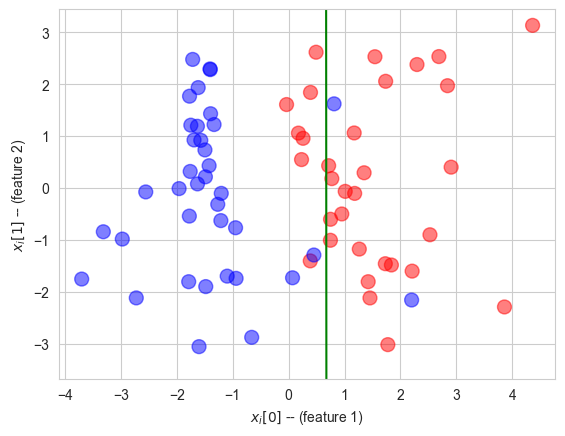

In [75]:
# ------------------------------
# Visualización de resultados
# ------------------------------

# Graficar dataset con la frontera de decisión aprendida
# W.numpy(), b.numpy(): convertir tensores TF a arrays NumPy para visualización
plot_dataset(train_x, train_labels, W.numpy(), b.numpy())


Let's see how our model behaves on the validation data.

Text(0.5, 1.0, 'Etiquetas reales')

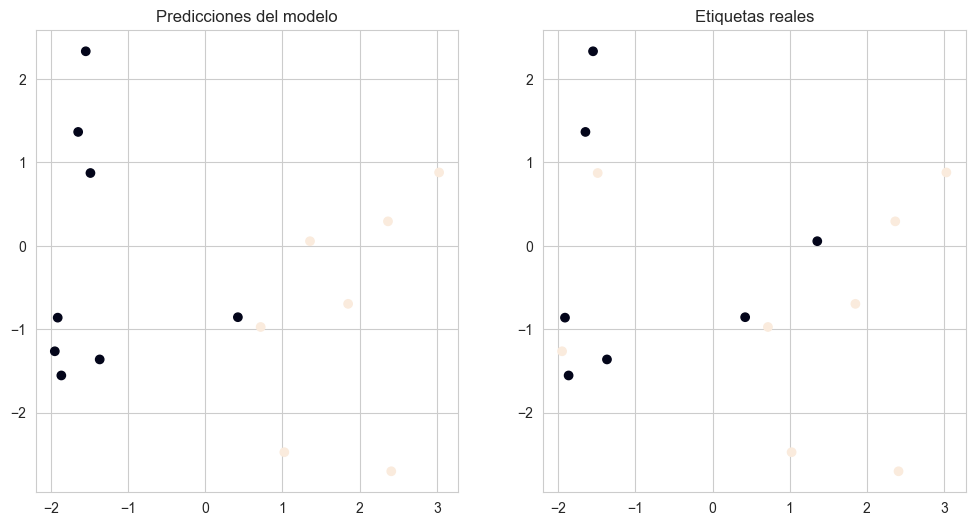

In [76]:
# ------------------------------
# Evaluación en datos de validación
# ------------------------------

# Calcular predicciones para datos de prueba
pred = tf.matmul(test_x, W) + b  # Calcular logits

# Crear figura con 2 subplots para comparar predicciones vs realidad
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Subplot 1: Predicciones del modelo
# c=pred[:,0]>0.5: colorear según predicción (True/False convertido a 1/0)
ax[0].scatter(test_x[:,0], test_x[:,1], c=pred[:,0] > 0.5)
ax[0].set_title('Predicciones del modelo')

# Subplot 2: Etiquetas reales
ax[1].scatter(test_x[:,0], test_x[:,1], c=valid_labels)
ax[1].set_title('Etiquetas reales')

To compute the accuracy on the validation data, we can cast boolean type to float, and compute the mean:

In [77]:
# ------------------------------
# Cálculo de precisión
# ------------------------------

# Calcular precisión comparando predicciones con etiquetas reales
# 1. Convertir predicciones a booleanos (pred > 0.5)
# 2. Comparar con etiquetas reales (test_labels)
# 3. Convertir booleanos a float (True=1.0, False=0.0)
# 4. Calcular media de aciertos
accuracy = tf.reduce_mean(
    tf.cast(
        ((pred[:,0] > 0.5) == test_labels),  # Comparación elemento a elemento
        tf.float32))  # Conversión a float32 para cálculo numérico

print("Precisión en validación:", accuracy.numpy())


Precisión en validación: 0.93333334


Let's explain what goes on here:
* `pred` is the values predicted by the network. They are not quite probabilities, because we have not used an activation function, but values greater than 0.5 correspond to class 1, and smaller - to class 0.
*  `pred[0]>0.5` creates a boolean tensor of results, where `True` corresponds to class 1, and `False` - to class 0
* We compare that tensor to expected labels `valid_labels`, getting the boolean vector or correct predictions, where `True` corresponds to the correct prediction, and `False` - to incorrect one.
* We convert that tensor to floating point using `tf.cast`
* We then compute the mean value using `tf.reduce_mean` - that is exactly our desired accuracy  

## Using TensorFlow/Keras Optimizers

Tensorflow is closely integrated with Keras, which contains a lot of useful functionality. For example, we can use different **optimization algorithms**. Let's do that, and also print obtained accuracy during training.

In [78]:
# ------------------------------
# Entrenamiento con Optimizador Adam de Keras
# ------------------------------

# Crear optimizador Adam con tasa de aprendizaje 0.01
optimizer = tf.keras.optimizers.Adam(0.01)

# Reinicializar pesos y bias
W = tf.Variable(tf.random.normal(shape=(2,1)))
b = tf.Variable(tf.zeros(shape=(1,), dtype=tf.float32))

@tf.function
def train_on_batch(x, y):
    # Lista de variables entrenables
    vars = [W, b]
    
    with tf.GradientTape() as tape:
        # Calcular salida con sigmoide aplicada (probabilidades)
        z = tf.sigmoid(tf.matmul(x, W) + b)
        
        # Calcular pérdida BCE manualmente
        loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(z, y))
        
        # Calcular precisión
        # 1. Redondear probabilidades a 0/1
        # 2. Comparar con etiquetas reales
        # 3. Calcular media de aciertos
        correct_prediction = tf.equal(tf.round(y), tf.round(z))
        acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Calcular gradientes
    grads = tape.gradient(loss, vars)
    
    # Aplicar gradientes usando el optimizador Adam
    optimizer.apply_gradients(zip(grads, vars))
    
    return loss, acc  # Devolver pérdida y precisión

# Entrenamiento con seguimiento de métricas
for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
        # Redimensionar entradas:
        # x: (batch_size, 2) para coincidir con shape de W
        # y: (batch_size, 1) para coincidir con salida del modelo
        loss, acc = train_on_batch(tf.reshape(x, (-1,2)), tf.reshape(y, (-1,1)))
    
    # Imprimir métricas al final de cada época
    print('Epoch %d: last batch loss = %.4f, acc = %.4f' % (epoch, float(loss), acc))


Epoch 0: last batch loss = 8.3367, acc = 0.5000
Epoch 1: last batch loss = 8.9815, acc = 0.5000
Epoch 2: last batch loss = 8.3166, acc = 0.5000
Epoch 3: last batch loss = 8.6219, acc = 0.5000
Epoch 4: last batch loss = 9.8364, acc = 0.0000
Epoch 5: last batch loss = 8.2044, acc = 0.5000
Epoch 6: last batch loss = 6.5347, acc = 1.0000
Epoch 7: last batch loss = 6.5041, acc = 1.0000
Epoch 8: last batch loss = 9.6820, acc = 0.0000
Epoch 9: last batch loss = 9.7760, acc = 0.0000
Epoch 10: last batch loss = 7.6545, acc = 0.5000
Epoch 11: last batch loss = 6.2154, acc = 1.0000
Epoch 12: last batch loss = 7.7755, acc = 0.5000
Epoch 13: last batch loss = 6.1317, acc = 1.0000
Epoch 14: last batch loss = 5.8621, acc = 1.0000
Epoch 15: last batch loss = 8.1406, acc = 0.5000
Epoch 16: last batch loss = 6.1963, acc = 1.0000
Epoch 17: last batch loss = 6.2132, acc = 1.0000
Epoch 18: last batch loss = 6.0775, acc = 1.0000
Epoch 19: last batch loss = 6.7680, acc = 1.0000


**Task 1**: Plot the graphs of loss function and accuracy on training and validation data during training

**Task 2**: Try to solve MNIST classificiation problem using this code. Hint: use `softmax_crossentropy_with_logits` or `sparse_softmax_cross_entropy_with_logits` as loss function. In the first case you need to feed expected output values in *one hot encoding*, and in the second case - as integer class number.

## Keras
### Deep Learning for Humans

* Keras is a library originally developed by Francois Chollet to work on top of Tensorflow, CNTK and Theano, to unify all lower-level frameworks. You can still install Keras as a separate library, but it is not advised to do so. 
* Now Keras is included as part of Tensorflow library
* You can easily construct neural networks from layers
* Contains `fit` function to do all training, plus a lot of functions to work with typical data (pictures, text, etc.)
* A lot of samples
* Functional API vs. Sequential API

Keras provides higher level abstractions for neural networks, allowing us to operate in terms of layers, models and optimizers, and not in terms of tensors and gradients.  


### Functional API

When using functional API, we define the **input** to the network as `keras.Input`, and then compute the **output** by passing it through a series of computations. Finally, we define **model** as an object that transforms input into output.

Once we obtained **model** object, we need to:
* **Compile it**, by specifying loss function and the optimizer that we want to use with our model
* **Train it** by calling `fit` function with the training (and possibly validation) data

In [79]:
import tensorflow as tf
import numpy as np

# Asegúrate de que los datos sean numéricos
train_x_norm = train_x_norm.astype(np.float32)  # Convierte a float32
train_labels = train_labels.astype(np.float32)  # Convierte a float32 (o int32 si son etiquetas enteras)
# ------------------------------
# Modelo con Keras Functional API
# ------------------------------

# Capa de entrada: especifica shape de los datos (2 features)
inputs = tf.keras.Input(shape=(2,))

# Capa densa con 1 neurona, inicialización Glorot (Xavier), activación sigmoide
z = tf.keras.layers.Dense(1, 
                         kernel_initializer='glorot_uniform', 
                         activation='sigmoid')(inputs)

# Construir modelo conectando entrada y salida
model = tf.keras.models.Model(inputs, z)

# Compilar modelo:
# - Optimizador: Adam con lr=0.1
# - Pérdida: entropía cruzada binaria
# - Métrica a monitorear: precisión
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen de arquitectura del modelo
model.summary()

# Entrenamiento del modelo:
# - Entrena por 1 época
# - Batch size de 8
h = model.fit(train_x_norm, train_labels, batch_size=8, epochs=1)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6468 - loss: 0.8345  


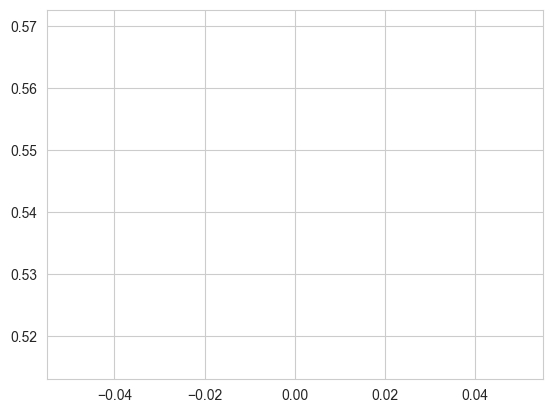

In [80]:
plt.plot(h.history['accuracy'])

### Sequential API

Alternatively, we can start thinking of a model as of a **sequence of layers**, and just specify those layers by adding them to the `model` object:

In [81]:
import tensorflow as tf
import numpy as np

# Asegúrate de que los datos sean numéricos
train_x_norm = train_x_norm.astype(np.float32)  # Convierte a float32
train_labels = train_labels.astype(np.float32)  # Convierte a float32 (o int32 si son etiquetas enteras)
test_x_norm = test_x_norm.astype(np.float32)    # Convierte a float32
test_labels = test_labels.astype(np.float32)    # Convierte a float32 (o int32 si son etiquetas enteras)

# ------------------------------
# Modelo con Keras Sequential API
# ------------------------------

# Crear modelo secuencial (pila de capas)
model = tf.keras.models.Sequential()

# Añadir capa densa con 5 neuronas, activación sigmoide y forma de entrada (2,)
model.add(tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(2,)))

# Añadir capa de salida con 1 neurona y sigmoide
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilar modelo mismo que antes
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen
model.summary()

# Entrenamiento con datos de validación
model.fit(train_x_norm, 
          train_labels,
          validation_data=(test_x_norm, test_labels),  # Datos para validación
          batch_size=8,
          epochs=1)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4995 - loss: 0.7168 - val_accuracy: 0.8000 - val_loss: 0.6557


## Classification Loss Functions

It is important to correctly specify loss function and activation function on the last layer of the network. The main rules are the following:
* If the network has one output (**binary classification**), we use **sigmoid** activation function, for **multiclass classification** - **softmax**
* If the output class is represented as one-hot-encoding, the loss function will be **cross entropy loss** (categorical cross-entropy), if the output contains class number - **sparse categorical cross-entropy**.  For **binary classification** - use **binary cross-entropy** (same as **log loss**)
* **Multi-label classification** is when we can have an object belonging to several classes at the same time. In this case, we need to encode labels using one-hot encoding, and use **sigmoid** as activation function, so that each class probability is between 0 and 1.

| Classification | Label Format | Activation Function | Loss |
|---------------|-----------------------|-----------------|----------|
| Binary      | Probability of 1st class | sigmoid | binary crossentropy |
| Binary      | One-hot encoding (2 outputs) | softmax | categorical crossentropy |
| Multiclass |  One-hot encoding | softmax | categorical crossentropy |
| Multiclass | Class Number | softmax | sparse categorical crossentropy |
| Multilabel | One-hot encoding | sigmoid | categorical crossentropy |

> Binary classification can also be handled as a special case of multi-class classification with two outputs. In this case, we need to use **softmax**.


**Task 3**: 
Use Keras to train MNIST classifier:
* Notice that Keras contains some standard datasets, including MNIST. To use MNIST from Keras, you only need a couple of lines of code (more information [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist))
* Try several network configuration, with different number of layers/neurons, activation functions.

What is the best accuracy you were able to achieve?

## Takeaways

* Tensorflow allows you to operate on tensors at low level, you have most flexibility.
* There are convenient tools to work with data (`td.Data`) and layers (`tf.layers`)
* For beginners/typical tasks, it is recommended to use **Keras**, which allows to construct networks from layers
* If non-standard architecture is needed, you can implement your own Keras layer, and then use it in Keras models
* It is a good idea to look at PyTorch as well and compare approaches. 

A good sample notebook from the creator of Keras on Keras and Tensorflow 2.0 can be found [here](https://t.co/k694J95PI8).

## Introduction to PyTorch


### Neural Frameworks

We have learnt that to train neural networks you need:
* Quickly multiply matrices (tensors)
* Compute gradients to perform gradient descent optimization

What neural network frameworks allow you to do:
* Operate with tensors on whatever compute is available, CPU or GPU, or even TPU
* Automatically compute gradients (they are explicitly programmed for all built-in tensor functions)

Optionally:
* Neural Network constructor / higher level API (describe network as a sequence of layers)
* Simple training functions (`fit`, as in Scikit Learn)
* A number of optimization algorithms in addition to gradient descent
* Data handling abstractions (that will ideally work on GPU, too)

### Most Popular Frameworks

* Tensorflow 1.x - first widely available framework (Google). Allowed to define static computation graph, push it to GPU, and explicitly evaluate it
* PyTorch - a framework from Facebook that is growing in popularity
* Keras - higher level API on top of Tensorflow/PyTorch to unify and simplify using neural networks (Francois Chollet)
* Tensorflow 2.x + Keras - new version of Tensorflow with integrated Keras functionality, which supports **dynamic computation graph**, allowing to perform tensor operations very similar to numpy (and PyTorch)

In this Notebook, we will learn to use PyTorch. You need to make sure that you have recent version of PyTorch installed - to do it, follow the [instructions on their site](https://pytorch.org/get-started/locally/). It is normally as simple as doing
```
pip install torch torchvision
```
or
```
conda install pytorch -c pytorch
```

In [82]:
import torch
torch.__version__

'2.6.0+cu126'

## Basic Concepts: Tensor

**Tensor** is a multi-dimensional array. It is very convenient to use tensors to represent different types of data:
* 400x400 - black-and-white picture
* 400x400x3 - color picture 
* 16x400x400x3 - minibatch of 16 color pictures
* 25x400x400x3 - one second of 25-fps video
* 8x25x400x400x3 - minibatch of 8 1-second videos

### Simple Tensors

You can easily create simple tensors from lists of np-arrays, or generate random ones:

In [83]:
# ------------------------------
# Creación de tensores simples
# ------------------------------

# Crear tensor a partir de lista anidada (matriz 2x2)
a = torch.tensor([[1,2],[3,4]])
print(a)

# Crear tensor con valores aleatorios de distribución normal (10 filas, 3 columnas)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 0.2154,  0.8795, -0.1651],
        [ 0.0166,  1.4124, -0.1333],
        [ 0.3241, -0.5684,  2.5067],
        [ 0.8887, -0.4432, -0.7722],
        [-0.0604, -1.5976,  2.0622],
        [ 2.5882, -0.3098, -0.0948],
        [ 1.3543, -0.7774, -0.4433],
        [-0.1039,  0.9855, -1.1173],
        [ 0.0936,  0.0668,  1.3335],
        [ 0.2278,  0.9509, -0.2785]])


You can use arithmetic operations on tensors, which are performed element-wise, as in numpy. Tensors are automatically expanded to required dimension, if needed. To extract numpy-array from tensor, use `.numpy()`:

In [84]:
# ------------------------------
# Operaciones aritméticas y conversión a numpy
# ------------------------------

# Restar el primer elemento del tensor a todos los elementos (broadcasting automático)
print(a - a[0])

# Calcular exponencial del tensor y convertir primera fila a array numpy
print(torch.exp(a)[0].numpy())



tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.1988,  0.5329,  0.0318],
        [ 0.1087, -1.4479,  2.6718],
        [ 0.6734, -1.3227, -0.6071],
        [-0.2758, -2.4771,  2.2273],
        [ 2.3729, -1.1893,  0.0703],
        [ 1.1390, -1.6569, -0.2782],
        [-0.3192,  0.1060, -0.9522],
        [-0.1217, -0.8127,  1.4986],
        [ 0.0124,  0.0715, -0.1134]])
[1.2403044  2.4096472  0.84780747]


## In-place and out-of-place Operations

Tensor operations such as `+`/`add` return new tensors. However, sometimes you need to modify the existing tensor in-place. Most of the operations have their in-place counterparts, which end with `_`:

In [85]:
# ------------------------------
# Operaciones in-place vs out-of-place
# ------------------------------

u = torch.tensor(5)
# Operación out-of-place: crea nuevo tensor sin modificar u
print("Resultado suma out-of-place:", u.add(torch.tensor(3)))

# Operación in-place: modifica u directamente (notar sufijo _)
u.add_(torch.tensor(3))
print("Resultado después de suma in-place:", u)


Resultado suma out-of-place: tensor(8)
Resultado después de suma in-place: tensor(8)


This is how we can compute the sum or all rows in a matrix in a naive way:

In [86]:
# ------------------------------
# Suma manual vs vectorizada
# ------------------------------

# Suma manual usando operaciones in-place (ineficiente)
s = torch.zeros_like(a[0])  # Tensor para acumular suma
for i in a:
  s.add_(i)  # Suma in-place cada fila
print(s)

# Suma vectorizada usando función nativa (recomendado)
print(torch.sum(a, axis=0))  # Suma a lo largo del eje 0 (filas)


tensor([5.5444, 0.5987, 2.8979])
tensor([5.5444, 0.5987, 2.8979])


You can read more on PyTorch tensors in the [official documentation](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

## Computing Gradients

For back propagation, you need to compute gradients. We can set any PyTorch Tensor's attribute `requires_grad` to `True`, which will result in all operations with this tensor being tracked for gradient calculations. To compute the gradients, you need to call `backward()` method, after which the gradient will become available using `grad` attribute:


In [87]:
# ------------------------------
# Cálculo de gradientes automáticos
# ------------------------------

# Crear tensores con seguimiento de gradientes
a = torch.randn(size=(2, 2), requires_grad=True)
b = torch.randn(size=(2, 2))

# Definir operación: media de sqrt(a² + b²)
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))

# Calcular gradientes mediante backpropagation
c.backward()

# Mostrar gradientes de a (dC/da)
print(a.grad)


tensor([[ 0.1210, -0.1874],
        [-0.2486, -0.0952]])


To be more precise, PyTorch automatically **accumulates** gradients. If you specify `retain_graph=True` when calling `backward`, computational graph will be preserved, and new gradient is added to the `grad` field. In order to restart computing gradients from scratch, we need to reset `grad` field to 0 explicitly by calling `zero_()`:  

In [88]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
# ------------------------------
# Acumulación de gradientes
# ------------------------------

# Calcular gradiente 2 veces (se acumulan)
c.backward(retain_graph=True)  # Mantiene el grafo computacional
c.backward(retain_graph=True)
print(a.grad)

# Reiniciar gradientes antes de nueva computación
a.grad.zero_()
c.backward()
print(a.grad)

tensor([[ 0.3630, -0.5623],
        [-0.7459, -0.2856]])
tensor([[ 0.1210, -0.1874],
        [-0.2486, -0.0952]])


To compute gradients, PyTorch creates and maintains **compute graph**. For each tensor that has the `requires_grad` flag set to `True`, PyTorch maintains a special function called `grad_fn`, which computes the derivative of the expression according to chain differentiation rule:

In [89]:
print(c)

tensor(1.2347, grad_fn=<MeanBackward0>)


Here `c` is computed using `mean` function, thus `grad_fn` point to a function called `MeanBackward`.

In most of the cases, we want PyTorch to compute gradient of a scalar function (such as loss function). However, if we want to compute the gradient of a tensor with respect to another tensor, PyTorch allows us to compute the product of a Jacobian matrix and a given vector.

Suppose we have a vector function $\vec{y}=f(\vec{x})$, where
$\vec{x}=\langle x_1,\dots,x_n\rangle$ and
$\vec{y}=\langle y_1,\dots,y_m\rangle$, then a gradient of $\vec{y}$ with respect to $\vec{x}$ is defined by a **Jacobian**:

$$
\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\end{align}
$$

Instead of giving us access to the whole Jacobian, PyTorch computes the product $v^T\cdot J$ of Jacobian with some vector
$v=(v_1 \dots v_m)$. In order to do that, we need to call ``backward`` and pass `v` as an argument. The size of `v` should be the same as the size of the original tensor, with respect to which we compute the gradient.


In [90]:

# ------------------------------
# Grafo computacional y Jacobianos
# ------------------------------

# Calcular producto de Jacobiano con matriz identidad
c = torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2))  # Pasamos vector v=matriz identidad
print(a.grad)

tensor([[ 0.6050, -0.1874],
        [-0.2486, -0.4761]])


More on computing Jacobians in PyTorch can be found in [official documentation](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

# Example 0: Optimization Using Gradient Descent

Let's try to use automatic differentiation to find a minimum of a simple two-variable function $f(x_1,x_2)=(x_1-3)^2+(x_2+2)^2$. Let tensor `x` hold the current coordinates of a point. We start with some starting point $x^{(0)}=(0,0)$, and compute the next point in a sequence using gradient descent formula:
$$
x^{(n+1)} = x^{(n)} - \eta\nabla f
$$
Here $\eta$ is so-called **learning rage** (we will denote it by `lr` in the code), and $\nabla f = (\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2})$ - gradient of $f$.

To begin, let's define starting value of `x` and the function `f`:

In [91]:
# ------------------------------
# Descenso de gradiente manual
# ------------------------------

# Definir punto inicial y función objetivo
x = torch.zeros(2,requires_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

# 15 iteraciones de optimización
for i in range(15):
    y = f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

Step 0: x[0]=0.6000000238418579, x[1]=-0.4000000059604645
Step 1: x[0]=1.0800000429153442, x[1]=-0.7200000286102295
Step 2: x[0]=1.4639999866485596, x[1]=-0.9760000705718994
Step 3: x[0]=1.7711999416351318, x[1]=-1.1808000802993774
Step 4: x[0]=2.0169599056243896, x[1]=-1.3446400165557861
Step 5: x[0]=2.2135679721832275, x[1]=-1.4757120609283447
Step 6: x[0]=2.370854377746582, x[1]=-1.5805696249008179
Step 7: x[0]=2.4966835975646973, x[1]=-1.6644556522369385
Step 8: x[0]=2.597346782684326, x[1]=-1.7315645217895508
Step 9: x[0]=2.677877426147461, x[1]=-1.7852516174316406
Step 10: x[0]=2.7423019409179688, x[1]=-1.8282012939453125
Step 11: x[0]=2.793841600418091, x[1]=-1.8625609874725342
Step 12: x[0]=2.835073232650757, x[1]=-1.8900487422943115
Step 13: x[0]=2.868058681488037, x[1]=-1.912039041519165
Step 14: x[0]=2.894446849822998, x[1]=-1.929631233215332


## Example 1: Linear Regression

Now we know enough to solve the classical problem of **Linear regression**. Let's generate small synthetic dataset:

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

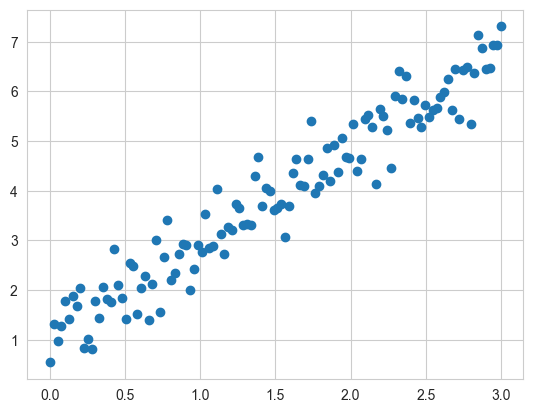

In [93]:
# ------------------------------
# Regresión Lineal: Generación de datos
# ------------------------------

np.random.seed(13)
train_x = np.linspace(0, 3, 120)  # 120 puntos entre 0 y 3
# Valores objetivo con ruido gaussiano (y = 2x + 0.9 + noise)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

# Visualización inicial
plt.scatter(train_x, train_labels)

Linear regression is defined by a straight line $f_{W,b}(x) = Wx+b$, where $W, b$ are model parameters that we need to find. An error on our dataset $\{x_i,y_u\}_{i=1}^N$ (also called **loss function**) can be defined as mean square error:
$$
\mathcal{L}(W,b) = {1\over N}\sum_{i=1}^N (f_{W,b}(x_i)-y_i)^2
$$

Let's define our model and loss function:

In [94]:
# ------------------------------
# Modelo de Regresión Lineal
# ------------------------------

input_dim = 1    # Dimensión entrada (x)
output_dim = 1   # Dimensión salida (y)
learning_rate = 0.1

# Parámetros del modelo (W: pendiente, b: sesgo)
w = torch.tensor([100.0], requires_grad=True, dtype=torch.float32)
b = torch.zeros(size=(output_dim,), requires_grad=True)

# Función de predicción lineal
def f(x):
    return torch.matmul(x, w) + b  # y = Wx + b

# Función de pérdida MSE (Error Cuadrático Medio)
def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

We will train the model on a series of minibatches. We will use gradient descent, adjusting model parameters using the following formulae:
$$
\begin{array}{l}
W^{(n+1)}=W^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial W} \\
b^{(n+1)}=b^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial b} \\
\end{array}
$$

In [95]:
# ------------------------------
# Entrenamiento por lotes
# ------------------------------

def train_on_batch(x, y):
    predictions = f(x)              # Paso forward
    loss = compute_loss(y, predictions)  # Calcular pérdida
    loss.backward()                 # Paso backward (calcular gradientes)
    # Actualizar parámetros con descenso de gradiente
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    # Reiniciar gradientes para siguiente iteración
    w.grad.zero_()
    b.grad.zero_()
    return loss

Let's do the training. We will do several passes through the dataset (so-called **epochs**), divide it into minibatches and call the function defined above:

In [96]:
# ------------------------------
# Preparación de datos
# ------------------------------

# Mezclar datos y convertir a tensores
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices], dtype=torch.float32)
labels = torch.tensor(train_labels[indices], dtype=torch.float32)


In [97]:
# ------------------------------
# Loop de entrenamiento
# ------------------------------

batch_size = 4  # Tamaño de lote
for epoch in range(10):
    for i in range(0, len(features), batch_size):
        # Tomar lote actual y entrenar
        loss = train_on_batch(
            features[i:i+batch_size].view(-1, 1),  # Remodelar a (batch_size, 1)
            labels[i:i+batch_size]
        )
    print(f'Época {epoch}: pérdida final = {loss.item():.4f}')


Época 0: pérdida final = 94.5247
Época 1: pérdida final = 9.3428
Época 2: pérdida final = 1.4166
Época 3: pérdida final = 0.5224
Época 4: pérdida final = 0.3807
Época 5: pérdida final = 0.3495
Época 6: pérdida final = 0.3413
Época 7: pérdida final = 0.3390
Época 8: pérdida final = 0.3384
Época 9: pérdida final = 0.3382


We now have obtained optimized parameters $W$ and $b$. Note that their values are similar to the original values used when generating the dataset ($W=2, b=1$)

In [98]:
w,b

(tensor([1.8617], requires_grad=True), tensor([1.0711], requires_grad=True))

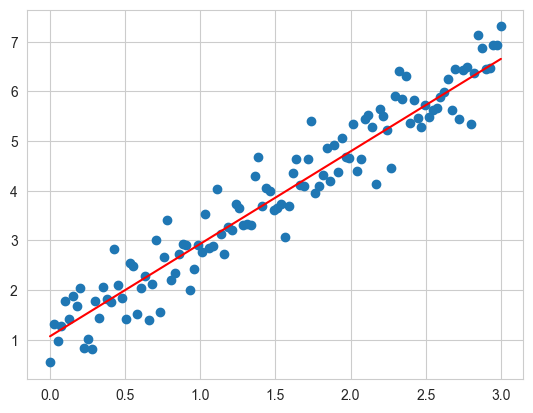

In [99]:
# ------------------------------
# Visualización de la regresión lineal ajustada
# ------------------------------

# Graficar puntos de datos originales
plt.scatter(train_x, train_labels)

# Crear array con los valores mínimo y máximo del eje X
x = np.array([min(train_x), max(train_x)])

# Deshabilitar cálculo de gradientes para operaciones posteriores (optimización)
with torch.no_grad():
    # Calcular la línea de regresión y convertir tensores a numpy para graficar
    # Fórmula: y = W*x + b
    y = w.numpy() * x + b.numpy()

# Graficar línea de regresión en rojo sobre los puntos
plt.plot(x, y, color='red')

## Computations on GPU

To use GPU for computations, PyTorch supports moving tensors to GPU and building computational graph for GPU. Traditionally, in the beginning of our code we define available computation device `device` (which is either `cpu` or `cuda`), and then move all tensors to this device using a call `.to(device)`. We can also create tensors on the specified device upfront, by passing the parameter `device=...` to tensor creation code. Such code works without changes both on CPU and GPU: 

In [100]:
# ------------------------------
# Configuración para ejecución en GPU
# ------------------------------

# Determinar dispositivo de ejecución (GPU si está disponible, si no CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Realizando cálculos en ' + device)

### Cambios importantes para ejecución en GPU:
# Crear tensores directamente en el dispositivo correspondiente
w = torch.tensor([100.0], 
                requires_grad=True,
                dtype=torch.float32,
                device=device)  # <-- Especificar dispositivo aquí

b = torch.zeros(size=(output_dim,),
               requires_grad=True,
               device=device)  # <-- Especificar dispositivo aquí

# Función de predicción (sin cambios, pero usa tensores en GPU/CPU)
def f(x):
    return torch.matmul(x, w) + b

# Función de pérdida MSE (sin cambios)
def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

# Función de entrenamiento por lote (modificada para usar datos en dispositivo correcto)
def train_on_batch(x, y):
    predictions = f(x)          # Forward pass
    loss = compute_loss(y, predictions)  # Calcular pérdida
    loss.backward()             # Backpropagation
    # Actualizar parámetros con descenso de gradiente
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    # Reiniciar gradientes para siguiente iteración
    w.grad.zero_()
    b.grad.zero_()
    return loss

# ------------------------------
# Entrenamiento con soporte GPU
# ------------------------------

batch_size = 4
for epoch in range(10):
    for i in range(0, len(features), batch_size):
        ### Cambio crucial: mover datos al dispositivo correspondiente
        batch_features = features[i:i+batch_size].view(-1, 1).to(device)  # Mover a GPU/CPU
        batch_labels = labels[i:i+batch_size].to(device)  # Mover a GPU/CPU
        
        loss = train_on_batch(batch_features, batch_labels)
    
    # Nota: La pérdida se convierte explícitamente a float para imprimir
    print('Época %d: pérdida último lote = %.4f' % (epoch, float(loss)))

Realizando cálculos en cuda
Época 0: pérdida último lote = 94.5247
Época 1: pérdida último lote = 9.3428
Época 2: pérdida último lote = 1.4166
Época 3: pérdida último lote = 0.5224
Época 4: pérdida último lote = 0.3807
Época 5: pérdida último lote = 0.3495
Época 6: pérdida último lote = 0.3413
Época 7: pérdida último lote = 0.3390
Época 8: pérdida último lote = 0.3384
Época 9: pérdida último lote = 0.3382


## Example 2: Classification

Now we will consider binary classification problem. A good example of such a problem would be a tumour classification between malignant and benign based on it's size and age.

The core model is similar to regression, but we need to use different loss function. Let's start by generating sample data:


In [101]:
# ------------------------------
# Clasificación Binaria: Dataset
# ------------------------------

np.random.seed(0)
n = 100  # Muestras totales

# Generar datos sintéticos separables
X, Y = make_classification(
    n_samples=n,
    n_features=2,      # 2 características
    n_redundant=0,     # Sin características redundantes
    n_informative=2,   # Ambas características informativas
    flip_y=0.1,        # 10% de ruido en etiquetas
    class_sep=1.5      # Separación entre clases
)

# Dividir en entrenamiento/validación/prueba
split = [70 * n // 100, (70 + 15) * n // 100]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)


In [102]:
def plot_dataset(features, labels, W=None, b=None):
    # Crear figura y ejes para el gráfico
    fig, ax = plt.subplots(1, 1)
    
    # Configurar etiquetas de los ejes
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')  # Primera característica en eje X
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')  # Segunda característica en eje Y
    
    # Asignar colores: rojo para clase 1 (labels=True), azul para clase 0
    colors = ['r' if l else 'b' for l in labels]
    
    # Graficar puntos del dataset
    ax.scatter(features[:, 0], features[:, 1],  # Coordenadas X e Y
               marker='o',      # Forma circular de los puntos
               c=colors,        # Colores según clase
               s=100,           # Tamaño de los puntos
               alpha=0.5)       # Transparencia para mejor visualización
    
    # Si se proporcionan pesos (W) y sesgo (b), dibujar frontera de decisión
    if W is not None:
        # Calcular límites para la línea de decisión
        min_x = min(features[:, 0])  # Valor mínimo de la primera característica
        max_x = max(features[:, 1])  # Valor máximo de la segunda característica
        
        # Calcular límites del eje Y con margen del 10%
        min_y = min(features[:, 1]) * (1 - 0.1)
        max_y = max(features[:, 1]) * (1 + 0.1)
        
        # Crear puntos extremos para la línea de decisión en eje X
        cx = np.array([min_x, max_x], dtype=np.float32)
        
        # Calcular valores correspondientes en eje Y para la frontera de decisión
        # Fórmula: W0*x + W1*y + b = 0.5 (umbral de clasificación)
        cy = (0.5 - W[0] * cx - b) / W[1]
        
        # Dibujar línea de decisión en verde
        ax.plot(cx, cy, 'g')  # 'g' = color verde
        
        # Ajustar límites del eje Y para mejor visualización
        ax.set_ylim(min_y, max_y)
    
    # Mostrar el gráfico
    fig.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_21392\1508663757.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


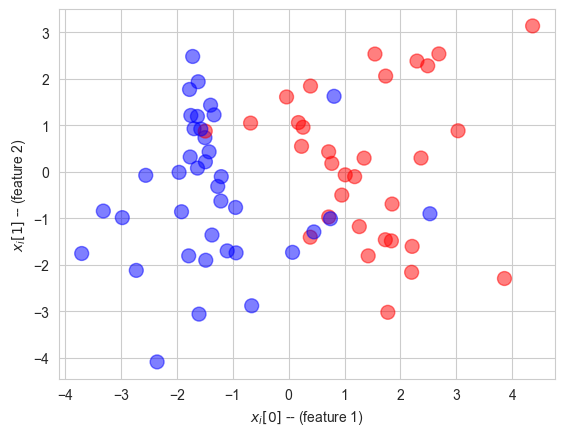

In [103]:
plot_dataset(train_x, train_labels)

## Training One-Layer Perceptron

Let's use PyTorch gradient computing machinery to train one-layer perceptron.

Our neural network will have 2 inputs and 1 output. The weight matrix $W$ will have size $2\times1$, and bias vector $b$ -- $1$.

To make our code more structured, let's group all parameters into a single class:

In [104]:
# ------------------------------
# Red Neuronal: Perceptrón
# ------------------------------

class Network():
    def __init__(self):
        # Inicializar pesos (2 entradas -> 1 salida)
        self.W = torch.randn(size=(2, 1), requires_grad=True)
        # Inicializar sesgo
        self.b = torch.zeros(size=(1,), requires_grad=True)

    # Paso forward: Wx + b
    def forward(self, x):
        return torch.matmul(x, self.W) + self.b

    # Reiniciar gradientes
    def zero_grad(self):
        self.W.grad.zero_()
        self.b.grad.zero_()

    # Actualizar parámetros con descenso de gradiente
    def update(self, lr=0.1):
        self.W.data.sub_(lr * self.W.grad)
        self.b.data.sub_(lr * self.b.grad)

# Instanciar modelo
net = Network()

> Note that we use `W.data.zero_()` instead of `W.zero_()`. We need to do this, because we cannot directly modify a tensor that is being tracked using *Autograd* mechanism.

Core model will be the same as in previous example, but loss function will be a logistic loss. To apply logistic loss, we need to get the value of **probability** as the output of our network, i.e. we need to bring the output $z$ to the range [0,1] using `sigmoid` activation function: $p=\sigma(z)$.

If we get the probability $p_i$ for the i-th input value corresponding to the actual class $y_i\in\{0,1\}$, we compute the loss as $\mathcal{L_i}=-(y_i\log p_i + (1-y_i)log(1-p_i))$. 

In PyTorch, both those steps (applying sigmoid and then logistic loss) can be done using one call to `binary_cross_entropy_with_logits` function. Since we are training our network in minibatches, we need to average out the loss across all elements of a minibatch - and that is also done automatically by `binary_cross_entropy_with_logits` function: 

> The call to `binary_crossentropy_with_logits` is equivalent to a call to `sigmoid`, followed by a call to `binary_crossentropy`

In [105]:
# ------------------------------
# Función de Pérdida y Entrenamiento
# ------------------------------

def train_on_batch(net, x, y):
  z = net.forward(x).flatten()
  loss = torch.nn.functional.binary_cross_entropy_with_logits(input=z,target=y)
  net.zero_grad()
  loss.backward()
  net.update()
  return loss


To loop through our data, we will use built-in PyTorch mechanism for managing datasets. It is based on two concepts:
* **Dataset** is the main source of data, it can be either **Iterable** or **Map-style**
* **Dataloader** is responsible for loading the data from a dataset and splitting it into minibatches.

In our case, we will define a dataset based on a tensor, and split it into minibatches of 16 elements. Each minibatch contains two tensors, input data (size=16x2) and labels (a vector of length 16 of integer type - class number).

In [106]:
# ------------------------------
# Preparar DataLoader
# ------------------------------

# Crear dataset y cargador por lotes
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x, dtype=torch.float32) ,torch.tensor(train_labels,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

list(dataloader)[0]



[tensor([[ 1.5442,  2.5290],
         [-1.6284,  0.0772],
         [-1.7141,  2.4770],
         [-1.4951,  0.7320],
         [-1.6899,  0.9243],
         [-0.9474, -0.7681],
         [ 3.8597, -2.2951],
         [-1.3944,  1.4300],
         [ 4.3627,  3.1333],
         [-1.0973, -1.7011],
         [-2.5532, -0.0777],
         [-1.2661, -0.3167],
         [ 0.3921,  1.8406],
         [ 2.2091, -1.6045],
         [ 1.8383, -1.4861],
         [ 0.7173, -0.9718]]),
 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.])]

## Neural Networks and Optimizers

In PyTorch, a special module `torch.nn.Module` is defined to represent a neural network. There are two methods to define your own neural network:
* **Sequential**, where you just specify a list of layers that comprise your network
* As a **class** inherited from `torch.nn.Module`

First method allows you to specify standard networks with sequential composition of layers, while the second one is more flexible, and gives an opportunity to express networks of arbitrary complex architectures. 

Inside modules, you can use standard **layers**, such as:
* `Linear` - dense linear layer, equivalent to one-layered perceptron. It has the same architecture as we have defined above for our network
* `Softmax`, `Sigmoid`, `ReLU` - layers that correspond to activation functions 
* There are also other layers for special network types - convolution, recurrent, etc. We will revisit many of them later in the course.

> Most of the activation function and loss functions in PyTorch are available in two form: as a **function** (inside `torch.nn.functional` namespace) and **as a layer** (inside `torch.nn` namespace). For activation functions, it is often easier to use functional elements from `torch.nn.functional`, without creating separate layer object.

If we want to train one-layer perceptron, we can just use one built-in `Linear` layer:

In [107]:
# ------------------------------
# Definición de una capa lineal (Perceptrón)
# ------------------------------

# Crear una capa lineal con 2 entradas y 1 salida
# Equivale a W*x + b donde W es de tamaño 1x2
net = torch.nn.Linear(2,1) 



# Imprimir los parámetros aprendibles del modelo (W y b)
print(list(net.parameters()))  # Lista de tensores con requires_grad=True

[Parameter containing:
tensor([[-0.4807, -0.3994]], requires_grad=True), Parameter containing:
tensor([0.3204], requires_grad=True)]


As you can see, `parameters()` method returns all the parameters that need to be adjusted during training. They correspond to weight matrix $W$ and bias $b$. You may note that they have `requires_grad` set to `True`, because we need to compute gradients with respect to parameters.

PyTorch also contains built-in **optimizers**, which implement optimization methods such as **gradient descent**. Here is how we can define a **stochastic gradient descent optimizer**:

In [108]:
# ------------------------------
# Configuración del optimizador SGD
# ------------------------------

# Crear un optimizador SGD (Descenso de Gradiente Estocástico)
# - net.parameters(): Parámetros a optimizar (W y b)
# - lr=0.05: Tasa de aprendizaje (learning rate)
optim = torch.optim.SGD(net.parameters(), lr=0.05)


Using the optimizer, our training loop will look like this:

In [109]:
# ------------------------------
# Bucle de entrenamiento manual
# ------------------------------

# Convertir datos de validación a tensores
val_x = torch.tensor(valid_x, dtype=torch.float32)  
val_lab = torch.tensor(valid_labels, dtype=torch.float32)

# Entrenar por 10 épocas
for ep in range(10):
  for (x,y) in dataloader:
    x = x.float()  # Conversión a float32 <---
    y = y.float()  # <---
    z = net(x).flatten()
    loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
  acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
  print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")

Epoch 0: last batch loss = 0.9848703742027283, val acc = 0.3333333432674408
Epoch 1: last batch loss = 0.8180611729621887, val acc = 0.4000000059604645
Epoch 2: last batch loss = 0.6949446797370911, val acc = 0.6000000238418579
Epoch 3: last batch loss = 0.6055421233177185, val acc = 0.7333333492279053
Epoch 4: last batch loss = 0.5396367907524109, val acc = 0.7333333492279053
Epoch 5: last batch loss = 0.48962172865867615, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.45050349831581116, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.4190770089626312, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.3932487964630127, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.37161198258399963, val acc = 0.800000011920929


> You may notice that to apply our network to input data we can use `net(x)` instead of `net.forward(x)`, because `nn.Module` implements Python `__call__()` function

Taking this into account, we can define generic `train` function:

In [110]:
# ------------------------------
# Función genérica de entrenamiento
# ------------------------------

def train(net, dataloader, val_x, val_lab, epochs=1, lr=0.05):
    optim = torch.optim.Adam(net.parameters(), lr=lr)
    for ep in range(epochs):
        for (x, y) in dataloader:
            x = x.float()  
            y = y.float()  
            z = net(x).flatten()
            loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
            optim.zero_grad()
            loss.backward()
            optim.step()
        # Validación (asegúrate que val_x y val_lab ya sean float32)
        with torch.no_grad():
            val_preds = torch.sigmoid(net(val_x).flatten())
            acc = ((val_preds > 0.5).float() == val_lab).float().mean()
        print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")


# Crear y entrenar modelo lineal
net = torch.nn.Linear(2,1)

train(net,dataloader,val_x,val_lab,lr=0.03)

Epoch 0: last batch loss = 0.5146766901016235, val acc = 0.800000011920929


## Defining Network as a Sequence of Layers

Now let's train multi-layered perceptron. It can be defined just by specifying a sequence of layers. The resulting object will automatically inherit from `Module`, e.g. it will also have `parameters` method that will return all parameters of the whole network.

In [111]:
# ------------------------------
# Red Secuencial Multicapa
# ------------------------------

# Definir red con:
# 1. Capa lineal 2 → 5 neuronas
# 2. Función de activación Sigmoide
# 3. Capa lineal 5 → 1 neurona
net = torch.nn.Sequential(
    torch.nn.Linear(2, 5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5, 1)
)
print(net)  # Mostrar arquitectura

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


We can train this multi-layered network using the function `train` that we have defined above:

In [112]:
# ------------------------------
# Entrenamiento de red multicapa
# ------------------------------
train(net, dataloader, val_x, val_lab)


Epoch 0: last batch loss = 0.6095342040061951, val acc = 0.800000011920929


## Defining a Network as a Class

Using a class inherited from `torch.nn.Module` is a more flexible method, because we can define any computations inside it. `Module` automates a lot of things, eg. it automatically understands all internal variables that are PyTorch layers, and gathers their parameters for optimization. You just need to define all layers of the network as members of the class:

In [113]:
# ------------------------------
# Red Personalizada como Clase
# ------------------------------

class MyNet(torch.nn.Module):
    def __init__(self, hidden_size=10, func=torch.nn.Sigmoid()):
        super().__init__()
        # Capa oculta: 2 → hidden_size
        self.fc1 = torch.nn.Linear(2, hidden_size)
        # Función de activación (Sigmoide por defecto)
        self.func = func
        # Capa de salida: hidden_size → 1
        self.fc2 = torch.nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        # Forward pass:
        x = self.fc1(x)  # Capa lineal oculta
        x = self.func(x)  # Aplicar activación
        x = self.fc2(x)  # Capa lineal salida
        return x

# Crear instancia con ReLU como activación
net = MyNet(func=torch.nn.ReLU())
print(net)  # Mostrar estructura

MyNet(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (func): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [114]:
# ------------------------------
# Entrenamiento con tasa de aprendizaje menor
# ------------------------------
train(net, dataloader, val_x, val_lab, lr=0.005)


Epoch 0: last batch loss = 0.6675951480865479, val acc = 0.7333333492279053


**Task 1**: Plot the graphs of loss function and accuracy on training and validation data during training

**Task 2**: Try to solve MNIST classificiation problem using this code. Hint: use `crossentropy_with_logits` as a loss function.

## Defining a Network as PyTorch Lightning Module

Let's wrap the written PyTorch model code in PyTorch Lightining module. This allows to work with your model more conveniently and flexibly using various Lightining methods for training and accuracy testing.

First we need to install and import PyTorch Lightining. This can be done with the command

```
pip install pytorch-lightning
```
or
```
conda install -c conda-forge pytorch-lightning
```

In [115]:
# ------------------------------
# Instalación de PyTorch Lightning
# ------------------------------
# Instalar librería de entrenamiento avanzado

!pip install pytorch_lightning


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
import torch
torch.cuda.is_available()

True

In [117]:
torch.zeros(1).cuda()

tensor([0.], device='cuda:0')

In [118]:
import pytorch_lightning as pl

In order for our code to work in Lightning, we need to do the following:

1. Create a subclass of `pl.LightningModule` and add to it model architecture in `__init__` method and `forward` pass method.
2. Move used optimizer to the `configure_optimizers()` method.
3. Define the training and validation process in methods `training_step` and `validation_step` respectively.
4. (Optional) Implement a testing (`test_step` method) and prediction process (`predict_step` method).

It should also be understood that PyTorch Lightning has a built-in translation of models to different devices, depending on where the incoming data from the `DataLoaders` is located. Therefore, all calls `.cuda()` or `.to(device)` should be removed from the code.

In [119]:
# ------------------------------
# Definición de Modelo en Lightning
# ------------------------------

class MyNetPL(pl.LightningModule):
    def __init__(self, hidden_size=10, func=torch.nn.Sigmoid()):
        super().__init__()
        # Capas igual que en MyNet
        self.fc1 = torch.nn.Linear(2, hidden_size)
        self.func = func
        self.fc2 = torch.nn.Linear(hidden_size, 1)
        
        # Contador para registro de épocas
        self.val_epoch_num = 0
    
    def forward(self, x):
        # Mismo forward que MyNet
        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        return x
    
    def training_step(self, batch, batch_nb):
        x, y = batch
        y_res = self(x).view(-1)  # Forward pass y aplanado
        # Cálculo de pérdida
        loss = torch.nn.functional.binary_cross_entropy_with_logits(y_res, y)
        return loss  # Lightning maneja automáticamente backprop
    
    def configure_optimizers(self):
        # Configurar optimizador SGD (diferente al Adam anterior)
        return torch.optim.SGD(self.parameters(), lr=0.005)
    
    def validation_step(self, batch, batch_nb):
        x, y = batch
        y_res = self(x).view(-1)
        # Calcular pérdida y precisión en validación
        val_loss = torch.nn.functional.binary_cross_entropy_with_logits(y_res, y)
        acc = ((torch.sigmoid(y_res.flatten()) > 0.5).float() == y).float().mean()
        # Logging de métricas
        print(f"Epoch {self.val_epoch_num}: val loss={val_loss.item():.4f}, val acc={acc.item():.4f}")
        self.val_epoch_num += 1


Let's also add validation `Dataset` and `DataLoader`:

In [120]:
# ------------------------------
# Preparación de Datos de Validación
# ------------------------------

# Crear Dataset y DataLoader para validación:
# - Convierte numpy arrays a tensores
# - Batch size de 16 para evaluación
valid_dataset = torch.utils.data.TensorDataset(
    torch.tensor(valid_x, dtype=torch.float32), 
    torch.tensor(valid_labels, dtype=torch.float32)
)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=16)

Now our model is ready for training. In Pytorch Lightning, this process is implemented through an object of the `Trainer` class, which essentially "mixes" the model with any datasets.

In [121]:
# ------------------------------
# Configuración y entrenamiento del modelo con PyTorch Lightning
# ------------------------------

# Crear instancia del modelo personalizado MyNetPL con función de activación ReLU
net = MyNetPL(func=torch.nn.ReLU())

# Configurar el entrenador de PyTorch Lightning:
# - max_epochs: 30 épocas de entrenamiento
# - log_every_n_steps: registrar métricas cada paso (batch)
# - accelerator: usar GPU para acelerar cómputo
# - devices: utilizar 1 dispositivo GPU
trainer = pl.Trainer(
    max_epochs=30,
    log_every_n_steps=1,
    accelerator='gpu',
    devices=1
)

# Iniciar el proceso de entrenamiento:
# - model: instancia del modelo a entrenar
# - train_dataloaders: DataLoader con datos de entrenamiento
# - val_dataloaders: DataLoader con datos de validación
trainer.fit(
    model=net,
    train_dataloaders=dataloader,
    val_dataloaders=valid_dataloader
)

INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type   | Params | M

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]Epoch 0: val loss=0.6296, val acc=0.6667
                                                                           

c:\Users\alvar\OneDrive - Tajamar\IAGen-desarrollo\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\alvar\OneDrive - Tajamar\IAGen-desarrollo\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 29: 100%|██████████| 5/5 [00:00<00:00, 127.17it/s, v_num=0]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 5/5 [00:00<00:00, 110.33it/s, v_num=0]


## Import

In [122]:
# ------------------------------
# Importación de bibliotecas
# ------------------------------

# Visualización de gráficos
import matplotlib.pyplot as plt

# Framework de aprendizaje automático
import tensorflow as tf

# Cómputo numérico y manejo de arrays
import numpy as np

# Manipulación y análisis de datos en formato tabular
import pandas as pd

# Interacción con el sistema operativo
import sys

## Be sure to used Tensorflow 2.0

In [123]:
# ------------------------------
# Verificación de versión de TensorFlow
# ------------------------------

# Verificar que TensorFlow tenga el atributo 'function' (TF 2.0+)
# Esto asegura que estamos usando la versión correcta del framework
assert hasattr(tf, "function")

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [124]:
from sklearn.preprocessing import StandardScaler
# ------------------------------
# Carga y preprocesamiento del dataset Fashion MNIST
# ------------------------------

# Cargar dataset Fashion MNIST desde Keras
fashion_mnist = tf.keras.datasets.fashion_mnist

# Separar en conjuntos de entrenamiento y prueba
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Limitar el dataset a las primeras 10,000 muestras para entrenamiento rápido
images = images[:10000]
targets = targets[:10000]

# Redimensionar imágenes de 28x28 píxeles a vectores de 784 elementos
images = images.reshape(-1, 784)
# Convertir tipo de datos a float para normalización
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

# Crear instancia de StandardScaler para normalización (media=0, std=1)
scaler = StandardScaler()
# Ajustar scaler a datos de entrenamiento y transformarlos
images = scaler.fit_transform(images)
# Aplicar misma transformación a datos de prueba
images_test = scaler.transform(images_test)

# Imprimir dimensiones de los datos procesados
print(images.shape)    # (10000, 784)
print(targets.shape)   # (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 784)
(10000,)


## Plot one of the data

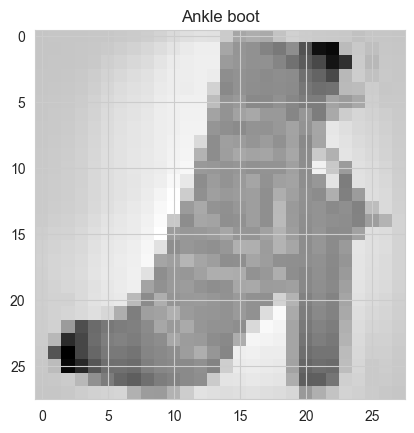

In [125]:
# ------------------------------
# Visualización de una muestra del dataset
# ------------------------------

# Lista de nombres de las clases de ropa
targets_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Mostrar la imagen número 11 del dataset:
# - Redimensionar de 784 a 28x28 píxeles
# - Usar mapa de colores binario (blanco y negro)
# - Añadir título con la clase correspondiente
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model

In [134]:
# ------------------------------
# Construcción del modelo de red neuronal
# ------------------------------

# Crear modelo secuencial (capas apiladas linealmente)
model = tf.keras.models.Sequential()

# Añadir capas:
# 1. Capa densa con 256 neuronas y activación ReLU
model.add(tf.keras.layers.Dense(256, activation="relu"))

# 2. Capa densa con 128 neuronas y activación ReLU
model.add(tf.keras.layers.Dense(128, activation="relu"))

# 3. Capa de salida con 10 neuronas (una por clase) y activación softmax
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Realizar predicción de prueba con la primera muestra
model_output = model.predict(images[0:1])
# Imprimir predicción (probabilidades) y etiqueta real
print(model_output, targets[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
[[0.04259698 0.03393872 0.02423461 0.09596794 0.01147745 0.16073029
  0.39188913 0.00403627 0.2296461  0.00548243]] [9]


## Model Summary

In [135]:
# ------------------------------
# Resumen de la arquitectura del modelo
# ------------------------------

# Mostrar resumen con:
# - Tipo de capas
# - Forma de salida de cada capa
# - Número de parámetros entrenables
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (1, 256)               │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (1, 128)               │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (1, 10)                │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [137]:
# ------------------------------
# Configuración del proceso de entrenamiento
# ------------------------------

# Compilar el modelo especificando:
# - Función de pérdida: entropía cruzada para clasificación (etiquetas enteras)
# - Optimizador: Descenso de Gradiente Estocástico (SGD)
# - Métrica a monitorear: precisión (accuracy)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)


## Train the model

In [138]:
# ------------------------------
# Entrenamiento del modelo
# ------------------------------

# Entrenar el modelo con:
# - 1 época (pasada completa por el dataset)
# - 20% de datos para validación
# - Almacenar histórico de métricas en 'history'
history = model.fit(
    images, 
    targets, 
    epochs=1, 
    validation_split=0.2
)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6162 - loss: 1.1671 - val_accuracy: 0.7915 - val_loss: 0.6035


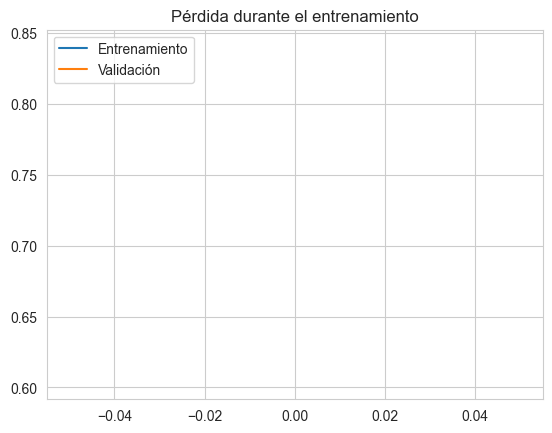

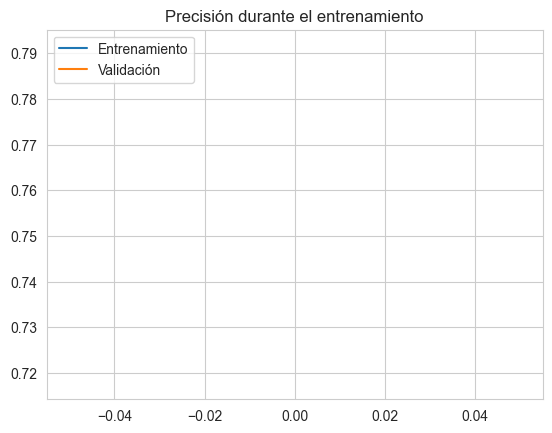

In [139]:
# ------------------------------
# Visualización de métricas de entrenamiento
# ------------------------------

# Extraer valores de pérdida y precisión del histórico
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

# Graficar curva de pérdida (entrenamiento vs validación)
plt.plot(loss_curve, label="Entrenamiento")
plt.plot(loss_val_curve, label="Validación")
plt.legend(loc='upper left')
plt.title("Pérdida durante el entrenamiento")
plt.show()

# Graficar curva de precisión (entrenamiento vs validación)
plt.plot(acc_curve, label="Entrenamiento")
plt.plot(acc_val_curve, label="Validación")
plt.legend(loc='upper left')
plt.title("Precisión durante el entrenamiento")
plt.show()

In [140]:
# ------------------------------
# Evaluación final con datos de prueba
# ------------------------------

# Calcular métricas finales en conjunto de prueba
loss, acc = model.evaluate(images_test, targets_test)

# Imprimir resultados
print("Pérdida en prueba:", loss)
print("Precisión en prueba:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7924 - loss: 0.6030
Pérdida en prueba: 0.6094130873680115
Precisión en prueba: 0.7874000072479248


# Let's code a Neural Network in plain NumPy
---

## Imports

In [141]:
# ------------------------------
# Importaciones necesarias
# ------------------------------

# Biblioteca fundamental para cálculos numéricos con arrays
import numpy as np

# Para mostrar imágenes en el notebook
from IPython.display import Image



## Network architecture

## First things first

Before we start programming, let's stop for a moment and prepare a basic roadmap. Our goal is to create a program capable of creating a densely connected neural network with the specified architecture (number and size of layers and appropriate activation function). An example of such a network is presented in Figure 1. Above all, we must be able to our network and make predictions using it.


Diagram above shows what operations will have to be performed during the training of our neural network. It also shows how many parameters we will have to update and read at different stages of a single iteration. Building the right data structure and skillfully managing its state is the most difficult part of our task.

## Initiation of neural network layers



Let's start with by initiating weight matrix W and bias vector b for each layer. In Figure 3 I have prepared a small cheatsheet, which will help us to asign the appropriate dimensions for these coefficients. Superscript [l] denotes the index of the current layer (counted from 1). I assumed that the information describing the NN architecture will be delivered to our program in the form of list. Each item in the list is a dictionary describing the basic parameters of a single network layer: input_dim - the size of the signal vector supplied as an input for the layer, output_dim - the size of the activation vector obtained at the output of the layer and activation - the activation function to be used inside the layer.

In [142]:
# ------------------------------
# Arquitectura de la red neuronal
# ------------------------------

# Definición de la estructura de la red neuronal:
# Lista de diccionarios donde cada capa especifica:
# - input_dim: dimension de entrada
# - output_dim: dimension de salida
# - activation: función de activación
NN_ARCHITECTURE = [
    {"input_dim": 2, "output_dim": 25, "activation": "relu"},   # Capa oculta 1
    {"input_dim": 25, "output_dim": 50, "activation": "relu"},  # Capa oculta 2
    {"input_dim": 50, "output_dim": 50, "activation": "relu"},  # Capa oculta 3
    {"input_dim": 50, "output_dim": 25, "activation": "relu"},  # Capa oculta 4
    {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"},# Capa de salida
]

## Initiation of parameter values for each layer

Let's finally focus on the main task that we have to accomplish in this part - the initiation of layers parameters. Initial weights values cannot be equal because it leads to breaking symmetry problem. Basically, if all weights are the same, no matter what was the input X, all units in hidden layer will be the same too. In a way, we got stuck in the initial state without any hope for escape, no matter how long will we train our model and how deep our network is. The use of small values increases the efficiency of our algorithm during first iterations. Looking at the graph of the sigmoid function, shown in Figure 4, we can see that it reaches the highest derivative value for numbers close to zero, which has significant effect on the speed of learning of our NN. All in all parameter initiation using small random numbers is simple approach, but it guarantees good enough starting point for out algorithm. Prepared parameters values are stored in a python dictionary with a key that uniquely identifies to which layer they belong. The dictionary is returned at the end of the function, so we can use it in the next stages of our algorithm.

In [143]:
# ------------------------------
# Inicialización de parámetros
# ------------------------------

def init_layers(nn_architecture, seed=99):
    # Fijar semilla para reproducibilidad
    np.random.seed(seed)
    
    # Diccionario para almacenar parámetros (W y b)
    params_values = {}
    
    # Iterar sobre cada capa en la arquitectura
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1  # Numeración de capas desde 1
        
        # Obtener dimensiones de entrada y salida
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        # Inicializar pesos (W) con valores pequeños aleatorios
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1  # Multiplicar por 0.1 para valores pequeños
        
        # Inicializar biases (b) con valores pequeños aleatorios
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1  # Misma escala que los pesos
    
    return params_values

## Activation functions

Amongst all the functions that we will use today, there are a few very simple but powerful ones. Activation functions can be written in a single line of code, but they give the neural nets non-linearity and therefore the expressiveness that they need. "Without them, our neural network would become a combination of linear functions, so it would be just a linear function itself." There are many activation functions, but in this project I decided to provide the possibility of using two of them - sigmoid and ReLU. We also have to prepare their derivatives in order to be able to go full circle and pass both forward and backward propagation.

In [144]:
# ------------------------------
# Funciones de activación
# ------------------------------

def sigmoid(Z):
    # Función sigmoide: 1 / (1 + e^(-Z))
    return 1/(1+np.exp(-Z))

def relu(Z):
    # Función ReLU: max(0, Z)
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    # Derivada de la sigmoide para backpropagation
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)  # Regla de la cadena: dL/dZ = dA * g'(Z)

def relu_backward(dA, Z):
    # Derivada de ReLU para backpropagation
    dZ = np.array(dA, copy=True)  # Copiar el gradiente entrante
    dZ[Z <= 0] = 0  # Derivada es 0 cuando Z <= 0
    return dZ


## Single layer forward propagation step

This part of the code is probably the most straightforward and easy to understand . Given input signal from previous layer, we compute affine transformation Z and then apply selected activation function. By using NumPy, we can leverage vectorization - performing matrix operations, for whole layer and whole batch of examples at once. This eliminates iteration and significantly speeds up our calculations. In addition to the calculated matrix A, our function also returns an intermediate value of Z. What for? The answer is shown in Figure 2. We will need Z during the backward step.

$$\boldsymbol{Z}^{[l]} = \boldsymbol{W}^{[l]} \cdot \boldsymbol{A}^{[l-1]} + \boldsymbol{b}^{[l]}$$

$$\boldsymbol{A}^{[l]} = g^{[l]}(\boldsymbol{Z}^{[l]})$$

In [145]:
# ------------------------------
# Propagación hacia adelante
# ------------------------------

def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    # Cálculo de la transformación lineal: Z = W*A_prev + b
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    # Seleccionar función de activación
    if activation == "relu":
        activation_func = relu
    elif activation == "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Función de activación no soportada')
    
    # Aplicar función de activación
    A_curr = activation_func(Z_curr)
    
    return A_curr, Z_curr  # Devolver activación y Z para usar en backprop




## Full forward propagation

With the single_layer_forward_propagation function completed, we can easily build a whole step forward. This is a slightly more complex function, whose role is not only to perform predictions but also to organize the collection of intermediate values.

In [146]:
def full_forward_propagation(X, params_values, nn_architecture):
    # Diccionario para almacenar valores intermedios
    memory = {}
    A_curr = X  # La entrada es la activación inicial
    
    # Iterar a través de cada capa
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr  # La activación previa
        
        # Obtener parámetros de la capa actual
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        activ_function_curr = layer["activation"]
        
        # Propagación en capa actual
        A_curr, Z_curr = single_layer_forward_propagation(
            A_prev, W_curr, b_curr, activ_function_curr)
        
        # Guardar valores para backprop
        memory["A" + str(idx)] = A_prev  # Guardar activación anterior
        memory["Z" + str(layer_idx)] = Z_curr  # Guardar Z de esta capa
    
    return A_curr, memory  # Devolver predicción y memoria

## Calculating cost

In order to monitor our progress and make sure that we are moving in desired direction, we should routinely calculate the value of the loss function. "Generally speaking, the loss function is designed to show how far we are from the 'ideal' solution." It is selected according to the problem we plan to solve, and frameworks such as Keras have many options to choose from. Because I am planning to test our NN for the classification of points between two classes, I decided to use binary crossentropy, which is defined by the following formulas. In order to give us more information on how our neural network is coping with the task, I have also decided to implement a function that will calculate accuracy for us.


In [147]:
# ------------------------------
# Cálculo de costo y precisión
# ------------------------------

def get_cost_value(Y_hat, Y):
    # Calcular entropía cruzada binaria
    m = Y_hat.shape[1]  # Número de ejemplos
    # Fórmula: -1/m * sum(Y*log(Y_hat) + (1-Y)*log(1-Y_hat))
    cost = -1/m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1-Y, np.log(1-Y_hat).T))
    return np.squeeze(cost)  # Eliminar dimensiones innecesarias

## Calculating accuracy

In [148]:
def convert_prob_into_class(probs):
    # Convertir probabilidades a clases (0 o 1) usando umbral 0.5
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_

In [149]:
def get_accuracy_value(Y_hat, Y):
    # Calcular precisión comparando predicciones con etiquetas reales
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()  # Promedio de predicciones correctas

## Single layer backward propagation step

Sadly, backward propagation is regarded by many inexperienced deep learning enthusiasts as algorithm that is intimidating and difficult to understand. The combination of differential calculus and linear algebra very often deters people who do not have a solid mathematical training. 

Often people confuse backward propaganda with gradient descent, but in fact these are two separate matters. The purpose of the first one is to calculate the gradient effectively, whereas the second one is to use the calculated gradient to optimize. In NN, we calculate the gradient of the cost function (discussed earlier) in respect to parameters, but backpropagation can be used to calculate derivatives of any function. The essence of this algorithm is the recursive use of a chain rule known from differential calculus - calculate a derivative of functions created by assembling other functions, whose derivatives we already know. This process - for one network layer - is described by the following formulas. Unfortunately, due to the fact that this article focuses mainly on practical implementation, I'll omit the derivation. Looking at the formulas, it becomes obvious why we decided to remember the values of the A and Z matrices for intermediate layers in a forward step.

$$\boldsymbol{dW}^{[l]} = \frac{\partial L }{\partial \boldsymbol{W}^{[l]}} = \frac{1}{m} \boldsymbol{dZ}^{[l]} \boldsymbol{A}^{[l-1] T}$$

$$\boldsymbol{db}^{[l]} = \frac{\partial L }{\partial \boldsymbol{b}^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} \boldsymbol{dZ}^{[l](i)}$$

$$\boldsymbol{dA}^{[l-1]} = \frac{\partial L }{\partial \boldsymbol{A}^{[l-1]}} = \boldsymbol{W}^{[l] T} \boldsymbol{dZ}^{[l]}$$

$$\boldsymbol{dZ}^{[l]} = \boldsymbol{dA}^{[l]} * g'(\boldsymbol{Z}^{[l]})$$



In [150]:
# ------------------------------
# Propagación hacia atrás
# ------------------------------

def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]  # Número de ejemplos
    
    # Seleccionar derivada de la función de activación
    if activation == "relu":
        backward_activation_func = relu_backward
    elif activation == "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Función de activación no soportada')
    
    # Calcular gradiente de Z (dZ)
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    
    # Calcular gradientes de parámetros
    dW_curr = np.dot(dZ_curr, A_prev.T) / m  # Derivada de W: (dZ * A_prev.T)/m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m  # Derivada de b: sum(dZ)/m
    dA_prev = np.dot(W_curr.T, dZ_curr)  # Gradiente para capa anterior
    
    return dA_prev, dW_curr, db_curr



## Full backward propagation

Just like in the case of forward propagation, I decided to split the calculations into two separate functions. The first one - shown in Snippet 7 - focuses on a single layer and boils down to rewriting above formulas in NumPy. The second one, representing full backward propagation, deals primarily with key juggling to read and update values in three dictionaries. We start by calculating a derivative of the cost function with respect to the prediction vector - result of forward propagation. This is quite trivial as it only consists of rewriting the following formula. Then iterate through the layers of the network starting from the end and calculate the derivatives with respect to all parameters according to the diagram shown in Figure 6. Ultimately, function returns a python dictionary containing the gradient we are looking for.

$$\frac{\partial L }{\partial \boldsymbol{\hat{Y}}} = -(\frac{\boldsymbol{Y}}{\boldsymbol{\hat{Y}}}- \frac{1-\boldsymbol{Y}}{1-\boldsymbol{\hat{Y}}})$$

In [151]:
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)  # Asegurar misma forma
    
    # Inicializar gradiente de la pérdida respecto a Y_hat
    dA_prev = -(np.divide(Y, Y_hat) - np.divide(1-Y, 1-Y_hat))
    
    # Iterar capas en orden inverso
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        
        # Obtener valores almacenados
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        activation = layer["activation"]
        
        # Calcular gradientes para capa actual
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_prev, W_curr, b_curr, Z_curr, A_prev, activation)
        
        # Almacenar gradientes
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values


## Updating parameter values

The goal of this method is to update network parameters using gradient optimisation. In this way, we try to bring our target function closer to a minimum. To accomplish this task, we will use two dictionaries provided as function arguments: params_values, which stores the current values of parameters, and grads_values, which stores cost function derivatives calculated with respect to these parameters. Now you only need to apply the following equations for each layer. This is a very simple optimization algorithm, but I decided to use it because it is a great starting point for more advanced optimizers, which will probably be the subject of one of my next articles.

In [152]:
# ------------------------------
# Actualización de parámetros
# ------------------------------

def update(params_values, grads_values, nn_architecture, learning_rate):
    # Actualizar parámetros con descenso de gradiente
    for layer_idx, layer in enumerate(nn_architecture, 1):
        # W = W - learning_rate * dW
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]
        # b = b - learning_rate * db
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]
    return params_values


## Putting things together

In [153]:
# ------------------------------
# Entrenamiento completo
# ------------------------------

def train(X, Y, nn_architecture, epochs, learning_rate, verbose=False, callback=None):
    # Inicializar parámetros
    params_values = init_layers(nn_architecture, 2)
    cost_history = []
    accuracy_history = []
    
    # Ciclo de entrenamiento
    for i in range(epochs):
        # Forward propagation
        Y_hat, cache = full_forward_propagation(X, params_values, nn_architecture)
        
        # Calcular métricas
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        # Backward propagation
        grads_values = full_backward_propagation(Y_hat, Y, cache, params_values, nn_architecture)
        
        # Actualizar parámetros
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        
        # Logging y callbacks
        if i % 50 == 0:
            if verbose:
                print(f"Iteración: {i:05} - Costo: {cost:.5f} - Precisión: {accuracy:.5f}")
            if callback:
                callback(i, params_values)
    
    return params_values

## David vs Goliath

### Imports

In [154]:
# ------------------------------
# Importación de bibliotecas
# ------------------------------

# Sistema operativo - para manejo de archivos y directorios
import os

# Generación de datos lunares (para problemas no lineales)
from sklearn.datasets import make_moons

# División de datos en entrenamiento/prueba
from sklearn.model_selection import train_test_split

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# Gráficos 3D (aunque no se usa directamente aquí)
from mpl_toolkits.mplot3d import Axes3D

# Configurar estilo de gráficos
sns.set_style("whitegrid")

# Keras para redes neuronales
import keras
from keras.models import Sequential  # Modelo secuencial
from keras.layers import Dense  # Capas densas
from keras.utils import to_categorical  # Conversión one-hot
from keras import regularizers  # Regularización

# Métrica de precisión
from sklearn.metrics import accuracy_score



### Settings

In [155]:
# ------------------------------
# Configuración global
# ------------------------------

# Número total de muestras en el dataset
N_SAMPLES = 1000

# Proporción de datos para prueba (10%)
TEST_SIZE = 0.1



### Create artificial dataset

In [156]:
# ------------------------------
# Creación de dataset artificial
# ------------------------------

# Generar datos en forma de medialunas:
# - n_samples: número de muestras
# - noise: nivel de ruido (20%)
# - random_state: semilla para reproducibilidad
X, y = make_moons(n_samples=N_SAMPLES, noise=0.2, random_state=100)

# Dividir en entrenamiento (90%) y prueba (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [157]:
# ------------------------------
# Inspección de dimensiones
# ------------------------------

# Mostrar forma de los datos de entrada (1000 muestras, 2 características)
X.shape

# Mostrar forma de las etiquetas (1000 muestras, 1 etiqueta)
y.shape



(1000,)

### Auxiliary plotting function

In [158]:
# ------------------------------
# Función auxiliar para gráficos
# ------------------------------

def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    """Crea gráficos de fronteras de decisión
    Args:
        X: Datos de entrada
        y: Etiquetas
        plot_name: Título del gráfico
        file_name: Nombre para guardar archivo
        XX: Grid coordenadas X para contorno
        YY: Grid coordenadas Y para contorno
        preds: Predicciones del modelo
        dark: Modo oscuro
    """
    
    # Configurar tema oscuro si se solicita
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    
    # Crear figura grande
    plt.figure(figsize=(16,12))
    
    # Obtener ejes actuales y configurar etiquetas
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    
    # Configurar título y ajustes de layout
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    
    # Dibujar contornos si hay predicciones
    if(XX is not None and YY is not None and preds is not None):
        # Contorno suave con mapa de colores
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=1, cmap=cm.Spectral)
        # Línea de decisión en 0.5
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    
    # Dibujar puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    
    # Guardar gráfico si se especifica nombre
    if(file_name):
        plt.savefig(file_name)
        plt.close()



### Visualization of the data set

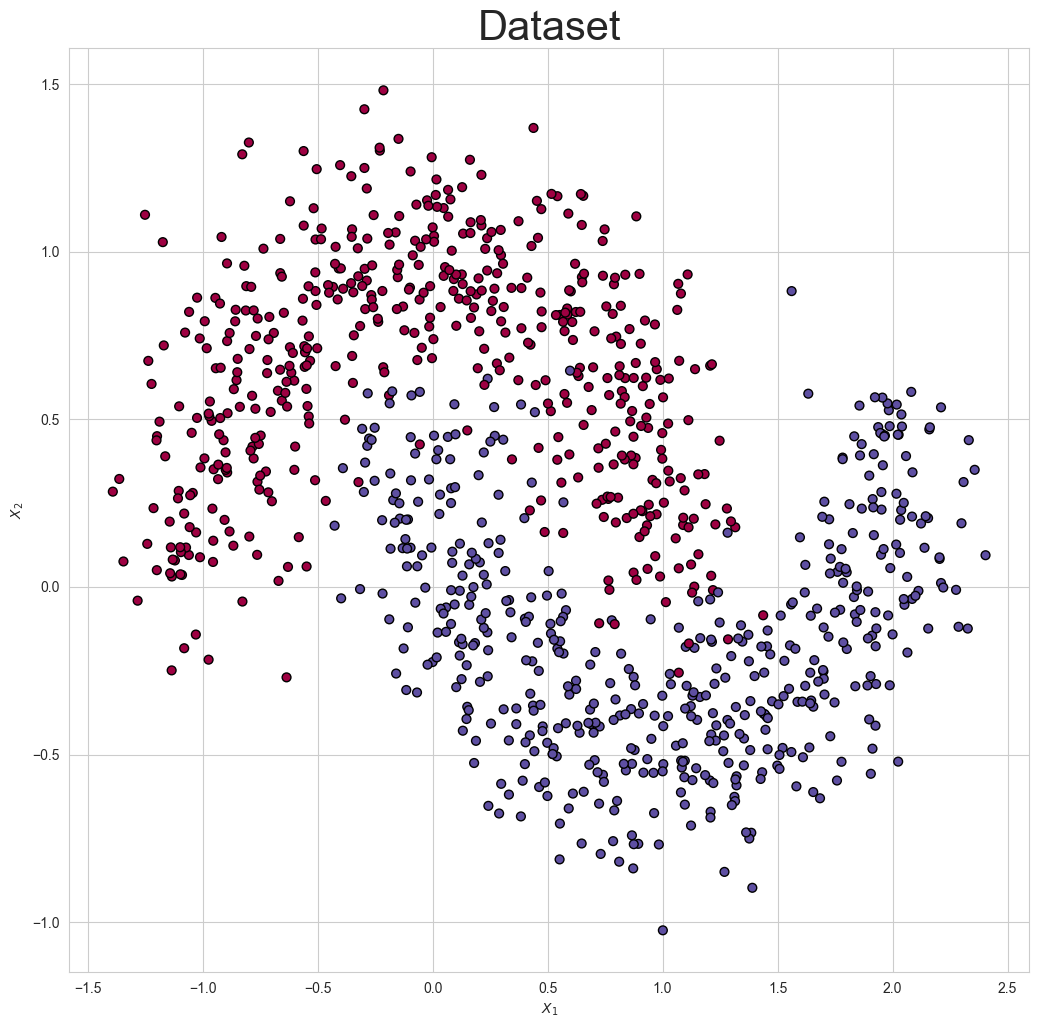

In [159]:
# ------------------------------
# Visualización inicial del dataset
# ------------------------------

# Llamar a la función make_plot con los datos completos
make_plot(X, y, "Dataset")

### Let's put our model to the test

In [163]:
# ------------------------------
# Entrenamiento del modelo manual (NumPy)
# ------------------------------

# Entrenamiento con implementación manual:
# - X_train transpuesto para formato (características x muestras)
# - y_train remodelado y transpuesto
# - NN_ARCHITECTURE: Definida en otro lugar (no mostrada)
# - 10000 iteraciones
# - Tasa de aprendizaje 0.01
params_values = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))), NN_ARCHITECTURE, 10000, 0.01)

In [164]:
# ------------------------------
# Predicción con modelo manual
# ------------------------------

# Propagación hacia adelante completa con datos de prueba
Y_test_hat, _ = full_forward_propagation(np.transpose(X_test), params_values, NN_ARCHITECTURE)



In [165]:
# ------------------------------
# Evaluación de precisión manual
# ------------------------------

# Calcular precisión comparando predicciones con valores reales
acc_test = get_accuracy_value(Y_test_hat, np.transpose(y_test.reshape((y_test.shape[0], 1))))
print("Precisión en prueba: {:.2f} - David".format(acc_test))


Precisión en prueba: 0.98 - David


### Keras model

In [168]:
# ------------------------------
# Modelo Keras
# ------------------------------

# Construcción del modelo secuencial
model = Sequential()

# Añadir capa de entrada con 2 características y 25 neuronas con activación ReLU  
model.add(keras.layers.Dense(25, input_shape=(2,), activation='relu'))

# Añadir tres capas ocultas: dos con 50 neuronas y una con 25, todas con activación ReLU  
model.add(keras.layers.Dense(50, activation='relu'))  # 50 neuronas
model.add(keras.layers.Dense(50, activation='relu'))  # 50 neuronas
model.add(keras.layers.Dense(25, activation='relu'))  # 25 neuronas

# Añadir capa de salida con 1 neurona y activación sigmoide para clasificación binaria  
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compilación con:
# - Pérdida: entropía cruzada binaria
# - Optimizador: SGD (descenso de gradiente estocástico)
# - Métrica: precisión
model.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['precision']
)

# Entrenamiento por 200 épocas sin salida detallada
history = model.fit(X_train, y_train, epochs=200, verbose=2)

Epoch 1/200
29/29 - 1s - 19ms/step - loss: 0.6681 - precision: 0.4994
Epoch 2/200
29/29 - 0s - 2ms/step - loss: 0.6461 - precision: 0.4832
Epoch 3/200
29/29 - 0s - 2ms/step - loss: 0.6267 - precision: 0.5336
Epoch 4/200
29/29 - 0s - 3ms/step - loss: 0.6079 - precision: 0.6557
Epoch 5/200
29/29 - 0s - 3ms/step - loss: 0.5881 - precision: 0.7495
Epoch 6/200
29/29 - 0s - 3ms/step - loss: 0.5676 - precision: 0.7827
Epoch 7/200
29/29 - 0s - 2ms/step - loss: 0.5466 - precision: 0.8022
Epoch 8/200
29/29 - 0s - 2ms/step - loss: 0.5264 - precision: 0.8176
Epoch 9/200
29/29 - 0s - 2ms/step - loss: 0.5062 - precision: 0.8206
Epoch 10/200
29/29 - 0s - 2ms/step - loss: 0.4873 - precision: 0.8322
Epoch 11/200
29/29 - 0s - 3ms/step - loss: 0.4699 - precision: 0.8434
Epoch 12/200
29/29 - 0s - 2ms/step - loss: 0.4529 - precision: 0.8588
Epoch 13/200
29/29 - 0s - 2ms/step - loss: 0.4373 - precision: 0.8707
Epoch 14/200
29/29 - 0s - 2ms/step - loss: 0.4230 - precision: 0.8770
Epoch 15/200
29/29 - 0s - 2m

In [169]:
# ------------------------------
# Predicción y evaluación Keras
# ------------------------------

# Obtener clase predicha (índice de mayor probabilidad)
Y_test_hat = np.argmax(model.predict(X_test), axis=-1)

# Calcular precisión con sklearn
acc_test = accuracy_score(y_test, Y_test_hat)
print("Precisión en prueba: {:.2f} - Goliath".format(acc_test))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Precisión en prueba: 0.54 - Goliath


## Visualisation of the learning process

### Settings

In [170]:
# ------------------------------
# Configuración para visualización
# ------------------------------

# Límites del área de visualización
GRID_X_START = -1.5  # Límite izquierdo eje X
GRID_X_END = 2.5     # Límite derecho eje X
GRID_Y_START = -1.0  # Límite inferior eje Y
GRID_Y_END = 2       # Límite superior eje Y

# Directorio para guardar visualizaciones
OUTPUT_DIR = "./binary_classification_vizualizations/"

### Definition of grid boundaries

In [171]:
# ------------------------------
# Creación de grid para predicciones
# ------------------------------

# Crear malla 100x100 puntos
grid = np.mgrid[GRID_X_START:GRID_X_END:100j, GRID_X_START:GRID_Y_END:100j]

# Reformatear a matriz de coordenadas (10000x2)
grid_2d = grid.reshape(2, -1).T

# Separar en coordenadas X e Y para graficar
XX, YY = grid


### Keras Model

In [172]:
# ------------------------------
# Callback para visualización en Keras
# ------------------------------

def callback_keras_plot(epoch, logs):
    """Genera gráficos durante el entrenamiento de Keras
    Args:
        epoch: Número de época actual
        logs: Diccionario con métricas
    """
    # Configurar título y nombre de archivo
    plot_title = "Predicciones del modelo (época {})".format(epoch)
    file_name = "keras_model_{:05}.png".format(epoch)
    file_path = os.path.join(OUTPUT_DIR, file_name)
    
    # Predecir probabilidades para todo el grid
    prediction_probs = model.predict(grid_2d, batch_size=32, verbose=0)
    
    # Generar y guardar gráfico
    make_plot(X_test, y_test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs)


In [173]:
# ------------------------------
# Configurar callback de Keras
# ------------------------------

# Crear callback que ejecuta la función en cada época
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=callback_keras_plot)


In [174]:
# ------------------------------
# Entrenamiento con callback
# ------------------------------

# Reconstruir mismo modelo que antes
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Entrenar incluyendo el callback para visualización
history = model.fit(X_train, y_train, epochs=200, verbose=2, callbacks=[testmodelcb])


Epoch 1/200


c:\Users\alvar\OneDrive - Tajamar\IAGen-desarrollo\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 - 1s - 35ms/step - accuracy: 0.4900 - loss: 0.6747
Epoch 2/200
29/29 - 1s - 19ms/step - accuracy: 0.4933 - loss: 0.6594
Epoch 3/200
29/29 - 1s - 20ms/step - accuracy: 0.5433 - loss: 0.6462
Epoch 4/200
29/29 - 1s - 20ms/step - accuracy: 0.6333 - loss: 0.6315
Epoch 5/200
29/29 - 1s - 20ms/step - accuracy: 0.6989 - loss: 0.6155
Epoch 6/200
29/29 - 1s - 19ms/step - accuracy: 0.7267 - loss: 0.5991
Epoch 7/200
29/29 - 1s - 20ms/step - accuracy: 0.7667 - loss: 0.5830
Epoch 8/200
29/29 - 1s - 19ms/step - accuracy: 0.7733 - loss: 0.5666
Epoch 9/200
29/29 - 1s - 20ms/step - accuracy: 0.7889 - loss: 0.5500
Epoch 10/200
29/29 - 1s - 19ms/step - accuracy: 0.7989 - loss: 0.5334
Epoch 11/200
29/29 - 1s - 20ms/step - accuracy: 0.8122 - loss: 0.5176
Epoch 12/200
29/29 - 1s - 20ms/step - accuracy: 0.8200 - loss: 0.5024
Epoch 13/200
29/29 - 1s - 20ms/step - accuracy: 0.8356 - loss: 0.4880
Epoch 14/200
29/29 - 1s - 21ms/step - accuracy: 0.8422 - loss: 0.4735
Epoch 15/200
29/29 - 1s - 20ms/step - acc

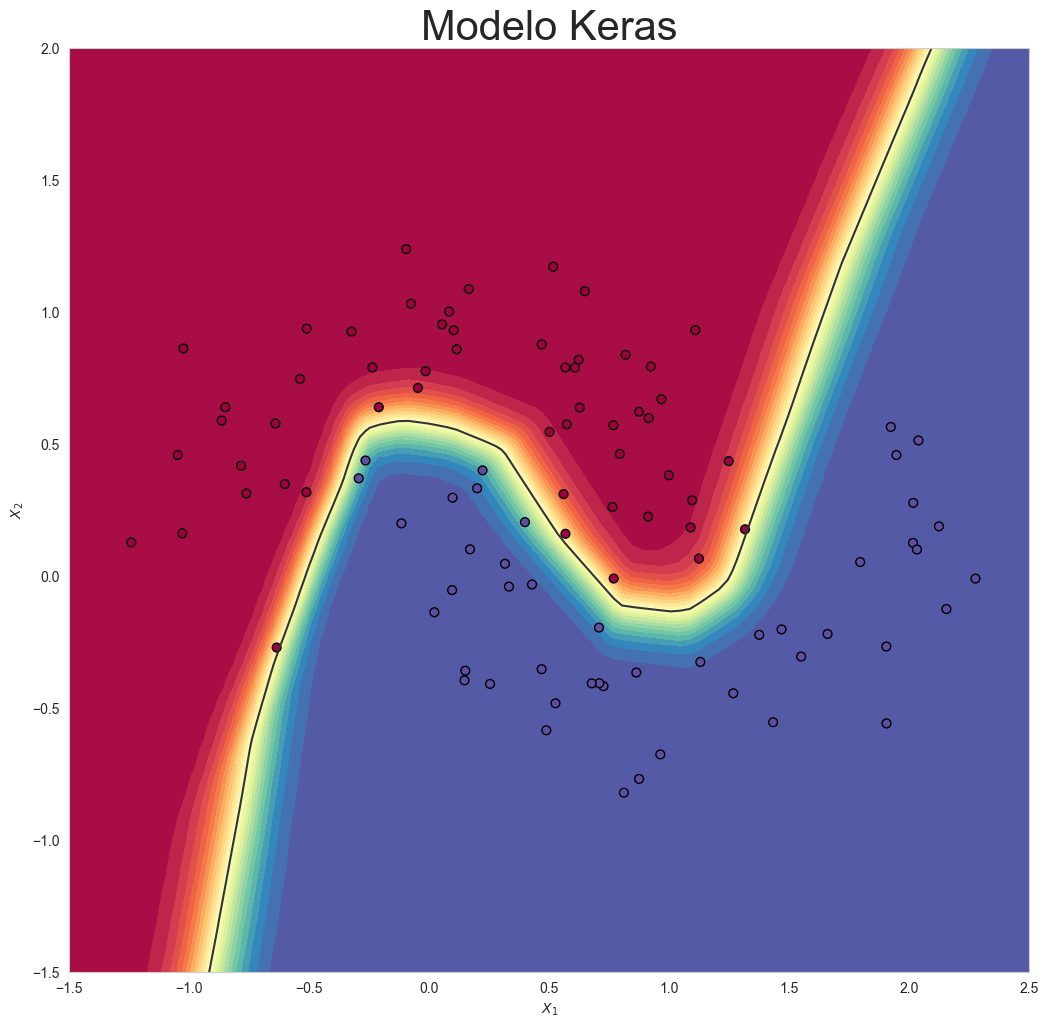

In [175]:
# ------------------------------
# Predicción final con Keras
# ------------------------------

# Predecir probabilidades para el grid completo
prediction_probs = model.predict(grid_2d, batch_size=32, verbose=0)

# Generar gráfico final
make_plot(X_test, y_test, "Modelo Keras", file_name=None, XX=XX, YY=YY, preds=prediction_probs)


### NumPy Model

In [176]:
# ------------------------------
# Callback para modelo NumPy
# ------------------------------

def callback_numpy_plot(index, params):
    """Genera gráficos durante entrenamiento manual
    Args:
        index: Iteración actual
        params: Parámetros del modelo
    """
    plot_title = "Modelo NumPy - Iter: {:05}".format(index)
    file_name = "numpy_model_{:05}.png".format(index//50)  # Guardar cada 50 iteraciones
    file_path = os.path.join(OUTPUT_DIR, file_name)
    
    # Propagación hacia adelante en todo el grid
    prediction_probs, _ = full_forward_propagation(np.transpose(grid_2d), params, NN_ARCHITECTURE)
    prediction_probs = prediction_probs.reshape(prediction_probs.shape[1], 1)
    
    # Generar gráfico en modo oscuro
    make_plot(X_test, y_test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs, dark=True)


In [179]:
# ------------------------------
# Entrenamiento modelo NumPy
# ------------------------------

# Entrenar incluyendo callback para visualización
params_values = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))), NN_ARCHITECTURE, 10000, 0.01, False, callback_numpy_plot)


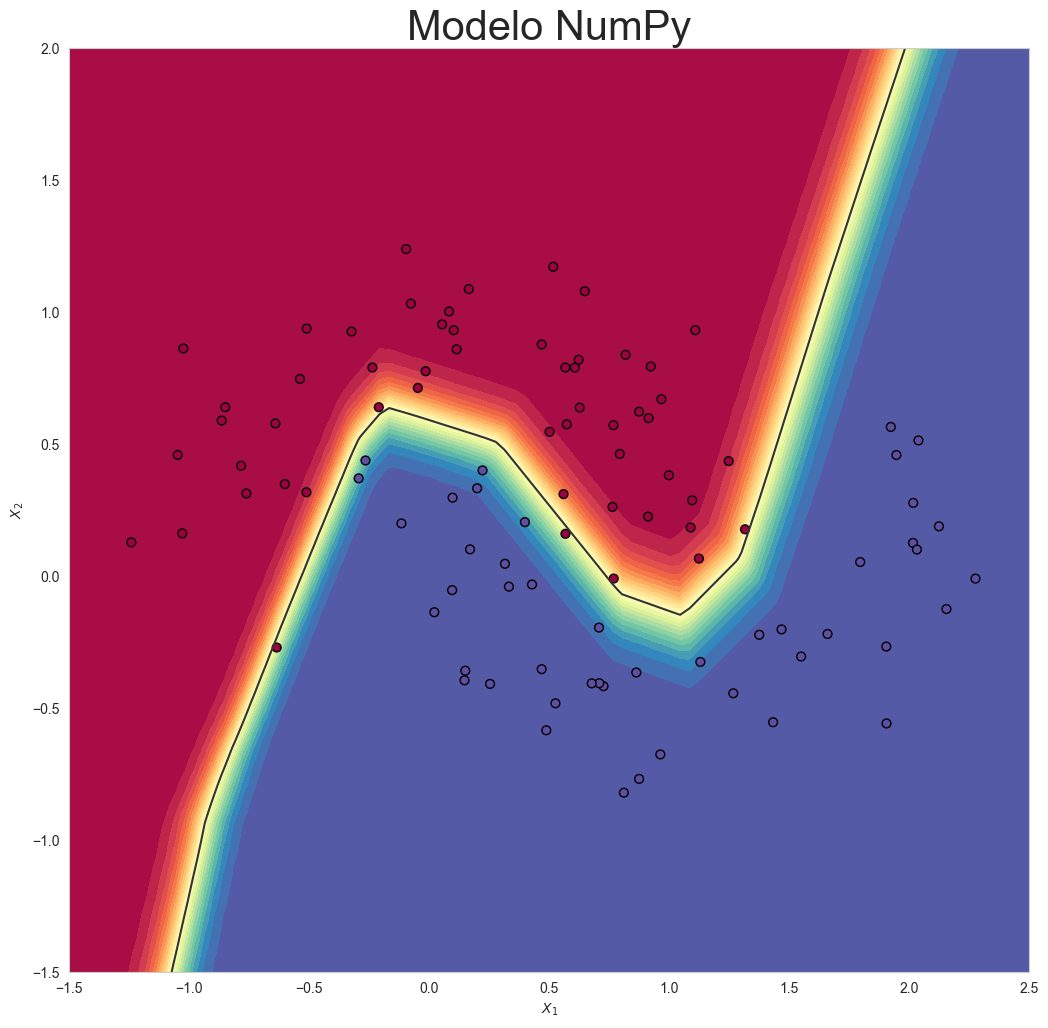

In [180]:
# ------------------------------
# Predicción final modelo NumPy
# ------------------------------

# Obtener predicciones finales
prediction_probs_numpy, _ = full_forward_propagation(np.transpose(grid_2d), params_values, NN_ARCHITECTURE)
prediction_probs_numpy = prediction_probs_numpy.reshape(prediction_probs_numpy.shape[1], 1)

# Generar gráfico final
make_plot(X_test, y_test, "Modelo NumPy", file_name=None, XX=XX, YY=YY, preds=prediction_probs_numpy)

# Tutorial 4: Optimization and Initialization


In this tutorial, we will review techniques for optimization and initialization of neural networks. When increasing the depth of neural networks, there are various challenges we face. Most importantly, we need to have a stable gradient flow through the network, as otherwise, we might encounter vanishing or exploding gradients. This is why we will take a closer look at the following concepts: initialization and optimization.

In the first half of the notebook, we will review different initialization techniques, and go step by step from the simplest initialization to methods that are nowadays used in very deep networks. In the second half, we focus on optimization comparing the optimizers SGD, SGD with Momentum, and Adam. 

Let's start with importing our standard libraries:

In [187]:
# ----------------------------
# Importación de bibliotecas
# ----------------------------

## Bibliotecas estándar
import os           # Interacción con sistema operativo
import json         # Manejo de archivos JSON
import math         # Funciones matemáticas
import numpy as np  # Cálculos numéricos
import copy         # Copia de objetos

## Bibliotecas para visualización
import matplotlib.pyplot as plt       # Gráficos 2D/3D
from matplotlib import cm             # Mapas de color
%matplotlib inline                    
# from IPython.display import set_matplotlib_formats
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')  # Formatos de exportación
import seaborn as sns                 # Estilos y gráficos estadísticos
sns.set()                             

## Barra de progreso
from tqdm.notebook import tqdm        # Barra de progreso interactiva

## PyTorch
import torch                          # Tensor library 
import torch.nn as nn                 # Módulos de redes neuronales
import torch.nn.functional as F       # Funciones de redes
import torch.utils.data as data       # Utilidades para datasets
import torch.optim as optim           # Optimizadores

We will use the same `set_seed` function as in Tutorial 3, as well as the path variables `DATASET_PATH` and `CHECKPOINT_PATH`. Adjust the paths if necessary.

In [191]:
# ----------------------------
# Configuración inicial
# ----------------------------


fashion_mnist = tf.keras.datasets.fashion_mnist

# Separar en conjuntos de entrenamiento y prueba
path = fashion_mnist.load_data()

# Ruta para datasets (ej: MNIST)
DATASET_PATH = "../data"
# DATASET_PATH = path
# Ruta para guardar modelos entrenados
CHECKPOINT_PATH = "saved_models/tutorial4"

# Función para fijar semillas (reproducibilidad)
def set_seed(seed):
    np.random.seed(seed)              # Semilla para NumPy
    torch.manual_seed(seed)           # Semilla para PyTorch CPU
    if torch.cuda.is_available():     # Semillas para GPU si está disponible
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)  # Fijar semilla global

# Configurar operaciones deterministas en GPU para reproducibilidad
torch.backends.cudnn.deterministic = True  # Usar algoritmos deterministas
torch.backends.cudnn.benchmark = False     # Desactivar optimizaciones variables

# Detectar dispositivo de ejecución (CPU o GPU)
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

Using device cuda:0


In the last part of the notebook, we will train models using three different optimizers. The pretrained models for those are downloaded below.

In [192]:
# ----------------------------
# Descarga de modelos preentrenados
# ----------------------------

import urllib.request
from urllib.error import HTTPError

# URL base para modelos en GitHub
base_url = "https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial4/"
# Archivos a descargar
pretrained_files = [
    "FashionMNIST_SGD.config", "FashionMNIST_SGD_results.json", "FashionMNIST_SGD.tar",
    "FashionMNIST_SGDMom.config", "FashionMNIST_SGDMom_results.json", "FashionMNIST_SGDMom.tar",
    "FashionMNIST_Adam.config", "FashionMNIST_Adam_results.json", "FashionMNIST_Adam.tar"
]

# Crear directorio si no existe
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# Descargar cada archivo si no existe localmente
for file_name in pretrained_files:
    file_path = os.path.join(CHECKPOINT_PATH, file_name)
    if not os.path.isfile(file_path):
        file_url = base_url + file_name
        print(f"Downloading {file_url}...")
        try:
            urllib.request.urlretrieve(file_url, file_path)
        except HTTPError as e:
            print("Error al descargar. Contactar al autor con este error:\n", e)

## Preparation

Throughout this notebook, we will use a deep fully connected network, similar to our previous tutorial. We will also again apply the network to FashionMNIST, so you can relate to the results of Tutorial 3. 
We start by loading the FashionMNIST dataset:

In [193]:
# ----------------------------
# Preparación de datos FashionMNIST
# ----------------------------

from torchvision.datasets import FashionMNIST
from torchvision import transforms

# Transformaciones aplicadas a cada imagen:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.2861,), (0.3530,))  # Normalizar con media y std calculados
])

# Cargar dataset de entrenamiento y dividir en train/validation
train_dataset = FashionMNIST(
    root=DATASET_PATH, 
    train=True, 
    transform=transform, 
    download=True  # Descargar si no está disponible
)
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Cargar dataset de prueba
test_set = FashionMNIST(
    root=DATASET_PATH, 
    train=False, 
    transform=transform, 
    download=True
)

# Crear DataLoaders para diferentes conjuntos:
train_loader = data.DataLoader(train_set, batch_size=1024, shuffle=True, drop_last=False)
val_loader = data.DataLoader(val_set, batch_size=1024, shuffle=False, drop_last=False)
test_loader = data.DataLoader(test_set, batch_size=1024, shuffle=False, drop_last=False)



100%|██████████| 26.4M/26.4M [00:02<00:00, 10.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 854kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 14.2MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


In comparison to the previous tutorial, we have changed the parameters of the normalization transformation `transforms.Normalize`. The normalization is now designed to give us an expected mean of 0 and a standard deviation of 1 across pixels. This will be particularly relevant for the discussion about initialization we will look at below, and hence we change it here. It should be noted that in most classification tasks, both normalization techniques (between -1 and 1 or mean 0 and stddev 1) have shown to work well.
We can calculate the normalization parameters by determining the mean and standard deviation on the original images:

In [194]:
# ----------------------------
# Estadísticas del dataset
# ----------------------------

# Calcular media y desviación estándar originales
print("Mean", (train_dataset.data.float() / 255.0).mean().item())
print("Std", (train_dataset.data.float() / 255.0).std().item())


Mean 0.28604060411453247
Std 0.3530242443084717


We can verify the transformation by looking at the statistics of a single batch:

In [196]:
# Verificar estadísticas después de transformaciones
imgs, _ = next(iter(train_loader))
print(f"Mean: {imgs.mean().item():5.3f}")
print(f"Standard deviation: {imgs.std().item():5.3f}")
print(f"Maximum: {imgs.max().item():5.3f}")
print(f"Minimum: {imgs.min().item():5.3f}")


Mean: 0.002
Standard deviation: 0.999
Maximum: 2.022
Minimum: -0.810


Note that the maximum and minimum are not 1 and -1 anymore, but shifted towards the positive values. This is because FashionMNIST contains a lot of black pixels, similar to MNIST.

Next, we create a linear neural network. We use the same setup as in the previous tutorial. 

In [197]:
# ----------------------------
# Definición de la red base
# ----------------------------

class BaseNetwork(nn.Module):
    def __init__(self, act_fn, input_size=784, num_classes=10, hidden_sizes=[512, 256, 256, 128]):
        """
        Args:
            act_fn: Función de activación
            input_size: Tamaño de entrada (28x28=784 para FashionMNIST)
            num_classes: Número de clases de salida
            hidden_sizes: Lista de tamaños para capas ocultas
        """
        super().__init__()
        layers = []
        layer_sizes = [input_size] + hidden_sizes
        
        # Construir capas ocultas
        for layer_index in range(1, len(layer_sizes)):
            layers += [
                nn.Linear(layer_sizes[layer_index-1], layer_sizes[layer_index]),  # Capa lineal
                act_fn  # Función de activación
            ]
        
        # Capa de salida final
        layers += [nn.Linear(layer_sizes[-1], num_classes)]
        
        # Convertir lista de capas en ModuleList (registra parámetros)
        self.layers = nn.ModuleList(layers)
        
        # Configuración para guardar hiperparámetros
        self.config = {
            "act_fn": act_fn.__class__.__name__,
            "input_size": input_size,
            "num_classes": num_classes,
            "hidden_sizes": hidden_sizes
        }
        
    def forward(self, x):
        # Aplanar entrada (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.view(x.size(0), -1)
        # Pasar por todas las capas
        for layer in self.layers:
            x = layer(x)
        return x


For the activation functions, we make use of PyTorch's `torch.nn` library instead of implementing ourselves. However, we also define an `Identity` activation function. Although this activation function would significantly limit the network's modeling capabilities, we will use it in the first steps of our discussion about initialization (for simplicity). 

In [198]:
# ----------------------------
# Funciones de activación
# ----------------------------

class Identity(nn.Module):
    """Capa de identidad (útil para pruebas sin activación)"""
    def forward(self, x):
        return x

# Mapeo de nombres a funciones de activación
act_fn_by_name = {
    "tanh": nn.Tanh,     # Tangente hiperbólica
    "relu": nn.ReLU,     # ReLU estándar
    "identity": Identity # Sin activación
}

Finally, we define a few plotting functions that we will use for our discussions. These functions help us to (1) visualize the weight/parameter distribution inside a network, (2) visualize the gradients that the parameters at different layers receive, and (3) the activations, i.e. the output of the linear layers. The detailed code is not important, but feel free to take a closer look if interested.

In [199]:
##############################################################

def plot_dists(val_dict, color="C0", xlabel=None, stat="count", use_kde=True):
    columns = len(val_dict)
    fig, ax = plt.subplots(1, columns, figsize=(columns*3, 2.5))
    fig_index = 0
    for key in sorted(val_dict.keys()):
        key_ax = ax[fig_index%columns]
        sns.histplot(val_dict[key], ax=key_ax, color=color, bins=50, stat=stat,
                     kde=use_kde and ((val_dict[key].max()-val_dict[key].min())>1e-8)) # Only plot kde if there is variance
        key_ax.set_title(f"{key} " + (r"(%i $\to$ %i)" % (val_dict[key].shape[1], val_dict[key].shape[0]) if len(val_dict[key].shape)>1 else ""))
        if xlabel is not None:
            key_ax.set_xlabel(xlabel)
        fig_index += 1
    fig.subplots_adjust(wspace=0.4)
    return fig
 
##############################################################

def visualize_weight_distribution(model, color="C0"):
    weights = {}
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            continue
        key_name = f"Layer {name.split('.')[1]}"
        weights[key_name] = param.detach().view(-1).cpu().numpy()
    
    ## Plotting
    fig = plot_dists(weights, color=color, xlabel="Weight vals")
    fig.suptitle("Weight distribution", fontsize=14, y=1.05)
    plt.show()
    plt.close() 
    
##############################################################
    
def visualize_gradients(model, color="C0", print_variance=False):
    """
    Inputs:
        net - Object of class BaseNetwork
        color - Color in which we want to visualize the histogram (for easier separation of activation functions)
    """
    model.eval()
    small_loader = data.DataLoader(train_set, batch_size=1024, shuffle=False)
    imgs, labels = next(iter(small_loader))
    imgs, labels = imgs.to(device), labels.to(device)
    
    # Pass one batch through the network, and calculate the gradients for the weights
    model.zero_grad()
    preds = model(imgs)
    loss = F.cross_entropy(preds, labels) # Same as nn.CrossEntropyLoss, but as a function instead of module
    loss.backward()
    # We limit our visualization to the weight parameters and exclude the bias to reduce the number of plots
    grads = {name: params.grad.view(-1).cpu().clone().numpy() for name, params in model.named_parameters() if "weight" in name}
    model.zero_grad()
    
    ## Plotting
    fig = plot_dists(grads, color=color, xlabel="Grad magnitude")
    fig.suptitle("Gradient distribution", fontsize=14, y=1.05)
    plt.show()
    plt.close() 
    
    if print_variance:
        for key in sorted(grads.keys()):
            print(f"{key} - Variance: {np.var(grads[key])}")

##############################################################

def visualize_activations(model, color="C0", print_variance=False):
    model.eval()
    small_loader = data.DataLoader(train_set, batch_size=1024, shuffle=False)
    imgs, labels = next(iter(small_loader))
    imgs, labels = imgs.to(device), labels.to(device)
    
    # Pass one batch through the network, and calculate the gradients for the weights
    feats = imgs.view(imgs.shape[0], -1)
    activations = {}
    with torch.no_grad():
        for layer_index, layer in enumerate(model.layers):
            feats = layer(feats)
            if isinstance(layer, nn.Linear):
                activations[f"Layer {layer_index}"] = feats.view(-1).detach().cpu().numpy()
    
    ## Plotting
    fig = plot_dists(activations, color=color, stat="density", xlabel="Activation vals")
    fig.suptitle("Activation distribution", fontsize=14, y=1.05)
    plt.show()
    plt.close() 
    
    if print_variance:
        for key in sorted(activations.keys()):
            print(f"{key} - Variance: {np.var(activations[key])}")

            
##############################################################

## Initialization

When initializing a neural network, there are a few properties we would like to have. First, the variance of the input should be propagated through the model to the last layer, so that we have a similar standard deviation for the output neurons. If the variance would vanish the deeper we go in our model, it becomes much harder to optimize the model as the input to the next layer is basically a single constant value. Similarly, if the variance increases, it is likely to explode (i.e. head to infinity) the deeper we design our model. The second property we look out for in initialization techniques is a gradient distribution with equal variance across layers. If the first layer receives much smaller gradients than the last layer, we will have difficulties in choosing an appropriate learning rate. 

As a starting point for finding a good method, we will analyze different initialization based on our linear neural network with no activation function (i.e. an identity). We do this because initializations depend on the specific activation function used in the network, and we can adjust the initialization schemes later on for our specific choice.

In [200]:
model = BaseNetwork(act_fn=Identity()).to(device)

### Constant initialization

The first initialization we can consider is to initialize all weights with the same constant value. Intuitively, setting all weights to zero is not a good idea as the propagated gradient will be zero. However, what happens if we set all weights to a value slightly larger or smaller than 0? To find out, we can implement a function for setting all parameters below and visualize the gradients.

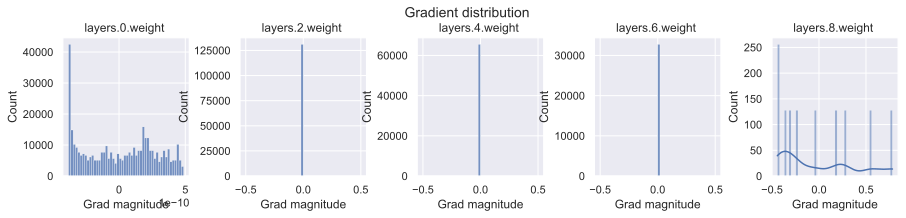

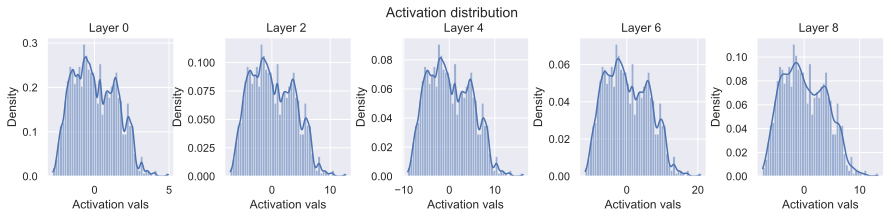

Layer 0 - Variance: 2.0582759380340576
Layer 2 - Variance: 13.489118576049805
Layer 4 - Variance: 22.100566864013672
Layer 6 - Variance: 36.209571838378906
Layer 8 - Variance: 14.831440925598145


In [201]:
# ----------------------------
# Inicialización de parámetros
# ----------------------------

# Inicialización constante
def const_init(model, c=0.0):
    for name, param in model.named_parameters():
        param.data.fill_(c)  # Llenar todos los parámetros con valor constante


const_init(model, c=0.005)
visualize_gradients(model)
visualize_activations(model, print_variance=True)

As we can see, only the first and the last layer have diverse gradient distributions while the other three layers have the same gradient for all weights (note that this value is unequal 0, but often very close to it). Having the same gradient for parameters that have been initialized with the same values means that we will always have the same value for those parameters. This would make our layer useless and reduce our effective number of parameters to 1. Thus, we cannot use a constant initialization to train our networks.

### Constant variance

From the experiment above, we have seen that a constant value is not working. So instead, how about we initialize the parameters by randomly sampling from a distribution like a Gaussian? The most intuitive way would be to choose one variance that is used for all layers in the network. Let's implement it below, and visualize the activation distribution across layers.

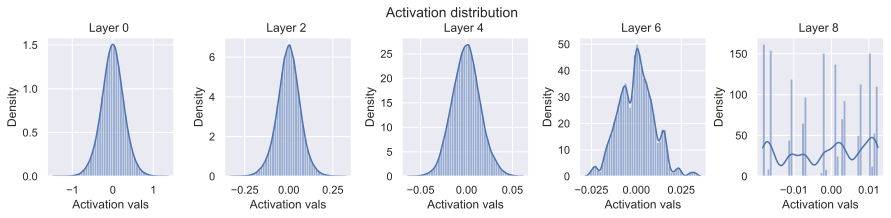

Layer 0 - Variance: 0.08033570647239685
Layer 2 - Variance: 0.004364828113466501
Layer 4 - Variance: 0.00023455842165276408
Layer 6 - Variance: 9.610633424017578e-05
Layer 8 - Variance: 0.00010397341247880831


In [202]:
# Inicialización con varianza fija
def var_init(model, std=0.01):
    for name, param in model.named_parameters():
        param.data.normal_(std=std)  # Distribución normal con std dado

        
var_init(model, std=0.01)
visualize_activations(model, print_variance=True)

The variance of the activation becomes smaller and smaller across layers, and almost vanishes in the last layer. Alternatively, we could use a higher standard deviation:

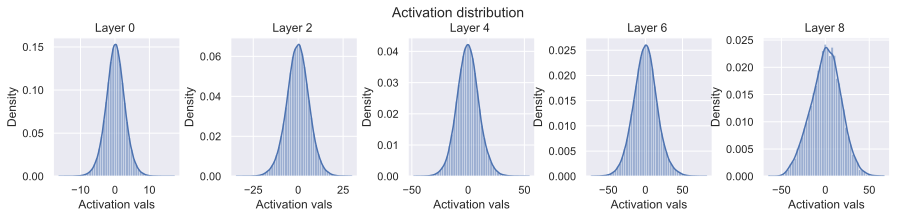

Layer 0 - Variance: 7.898399829864502
Layer 2 - Variance: 40.11249923706055
Layer 4 - Variance: 97.92459869384766
Layer 6 - Variance: 264.7514953613281
Layer 8 - Variance: 293.9684143066406


In [203]:

# Inicialización Kaiming/He
def kaiming_init(model):
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            param.data.fill_(0)
        elif name.startswith("layers.0"):  # Primera capa
            param.data.normal_(0, 1/math.sqrt(param.shape[1]))
        else:  # Capas posteriores
            param.data.normal_(0, math.sqrt(2)/math.sqrt(param.shape[1]))


var_init(model, std=0.1)
visualize_activations(model, print_variance=True)

With a higher standard deviation, the activations are likely to explode. You can play around with the specific standard deviation values, but it will be hard to find one that gives us a good activation distribution across layers and is very specific to our model. If we would change the hidden sizes or number of layers, you would have to search all over again, which is neither efficient nor recommended.

### How to find appropriate initialization values

From our experiments above, we have seen that we need to sample the weights from a distribution, but are not sure which one exactly. As a next step, we will try to find the optimal initialization from the perspective of the activation distribution. For this, we state two requirements:

1. The mean of the activations should be zero
2. The variance of the activations should stay the same across every layer

Suppose we want to design an initialization for the following layer: $y=Wx+b$ with $y\in\mathbb{R}^{d_y}$, $x\in\mathbb{R}^{d_x}$. Our goal is that the variance of each element of $y$ is the same as the input, i.e. $\text{Var}(y_i)=\text{Var}(x_i)=\sigma_x^{2}$, and that the mean is zero. We assume $x$ to also have a mean of zero, because, in deep neural networks, $y$ would be the input of another layer. This requires the bias and weight to have an expectation of 0. Actually, as $b$ is a single element per output neuron and is constant across different inputs, we set it to 0 overall.

Next, we need to calculate the variance with which we need to initialize the weight parameters. 
Along the calculation, we will need the following variance rule: given two independent variables, the variance of their product is $\text{Var}(X\cdot Y) = \mathbb{E}(Y)^2\text{Var}(X) + \mathbb{E}(X)^2\text{Var}(Y) + \text{Var}(X)\text{Var}(Y) = \mathbb{E}(Y^2)\mathbb{E}(X^2)-\mathbb{E}(Y)^2\mathbb{E}(X)^2$ ($X$ and $Y$ are not refering to $x$ and $y$, but any random variable). 

The needed variance of the weights, $\text{Var}(w_{ij})$, is calculated as follows:

$$
\begin{split}
    y_i & = \sum_{j} w_{ij}x_{j}\hspace{10mm}\text{Calculation of a single output neuron without bias}\\
    \text{Var}(y_i) = \sigma_x^{2} & = \text{Var}\left(\sum_{j} w_{ij}x_{j}\right)\\
    & = \sum_{j} \text{Var}(w_{ij}x_{j}) \hspace{10mm}\text{Inputs and weights are independent of each other}\\
    & = \sum_{j} \text{Var}(w_{ij})\cdot\text{Var}(x_{j}) \hspace{10mm}\text{Variance rule (see above) with expectations being zero}\\
    & = d_x \cdot \text{Var}(w_{ij})\cdot\text{Var}(x_{j}) \hspace{10mm}\text{Variance equal for all $d_x$ elements}\\
    & = \sigma_x^{2} \cdot d_x \cdot \text{Var}(w_{ij})\\
    \Rightarrow \text{Var}(w_{ij}) = \sigma_{W}^2 & = \frac{1}{d_x}\\
\end{split}
$$

Thus, we should initialize the weight distribution with a variance of the inverse of the input dimension $d_x$. Let's implement it below and check whether this holds:

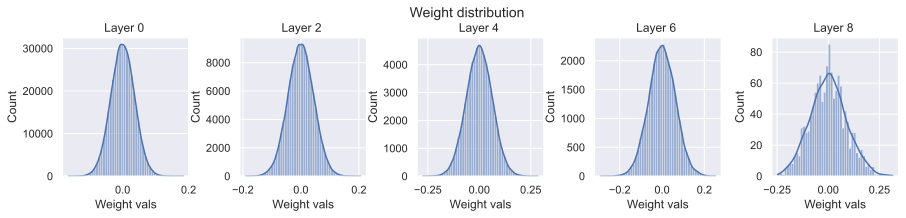

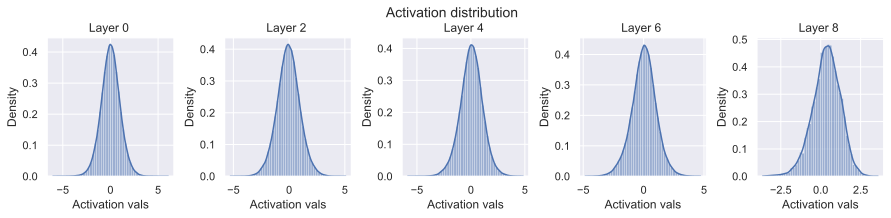

Layer 0 - Variance: 1.0020414590835571
Layer 2 - Variance: 1.031913161277771
Layer 4 - Variance: 1.0681164264678955
Layer 6 - Variance: 1.0225014686584473
Layer 8 - Variance: 0.754125714302063


In [204]:
def equal_var_init(model):
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
            param.data.normal_(std=1.0/math.sqrt(param.shape[1]))
        
equal_var_init(model)
visualize_weight_distribution(model)
visualize_activations(model, print_variance=True)

As we expected, the variance stays indeed constant across layers. Note that our initialization does not restrict us to a normal distribution, but allows any other distribution with a mean of 0 and variance of $1/d_x$. You often see that a uniform distribution is used for initialization. A small benefit of using a uniform instead of a normal distribution is that we can exclude the chance of initializing very large or small weights.

Besides the variance of the activations, another variance we would like to stabilize is the one of the gradients. This ensures a stable optimization for deep networks. It turns out that we can do the same calculation as above starting from $\Delta x=W\Delta y$, and come to the conclusion that we should initialize our layers with $1/d_y$ where $d_y$ is the number of output neurons. You can do the calculation as a practice, or check a thorough explanation in [this blog post](https://pouannes.github.io/blog/initialization/#mjx-eqn-eqfwd_K). As a compromise between both constraints, [Glorot and Bengio (2010)](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi) proposed to use the harmonic mean of both values. This leads us to the well-known Xavier initialization:

$$W\sim \mathcal{N}\left(0,\frac{2}{d_x+d_y}\right)$$

If we use a uniform distribution, we would initialize the weights with:

$$W\sim U\left[-\frac{\sqrt{6}}{\sqrt{d_x+d_y}}, \frac{\sqrt{6}}{\sqrt{d_x+d_y}}\right]$$

Let's shortly implement it and validate its effectiveness:

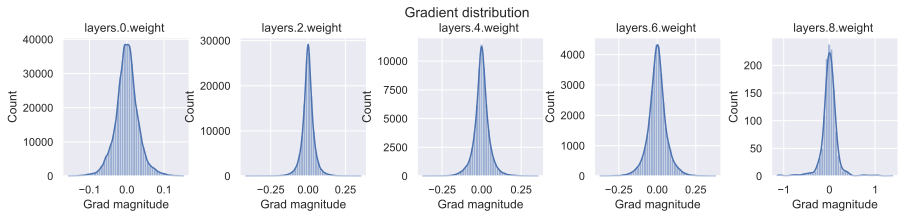

layers.0.weight - Variance: 0.0009624491794966161
layers.2.weight - Variance: 0.0017538897227495909
layers.4.weight - Variance: 0.002514160005375743
layers.6.weight - Variance: 0.003728610696271062
layers.8.weight - Variance: 0.03573284670710564


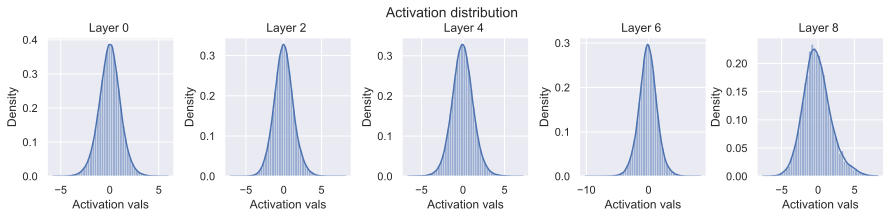

Layer 0 - Variance: 1.235020399093628
Layer 2 - Variance: 1.6918061971664429
Layer 4 - Variance: 1.6733264923095703
Layer 6 - Variance: 2.1699042320251465
Layer 8 - Variance: 3.709794282913208


In [205]:
# Inicialización Xavier/Glorot
def xavier_init(model):
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
            bound = math.sqrt(6) / math.sqrt(param.shape[0] + param.shape[1])
            param.data.uniform_(-bound, bound)  # Uniforme en [-bound, bound]

xavier_init(model)
visualize_gradients(model, print_variance=True)
visualize_activations(model, print_variance=True)

We see that the Xavier initialization balances the variance of gradients and activations. Note that the significantly higher variance for the output layer is due to the large difference of input and output dimension ($128$ vs $10$). However, we currently assumed the activation function to be linear. So what happens if we add a non-linearity? In a tanh-based network, a common assumption is that for small values during the initial steps in training, the $\tanh$ works as a linear function such that we don't have to adjust our calculation. We can check if that is the case for us as well:

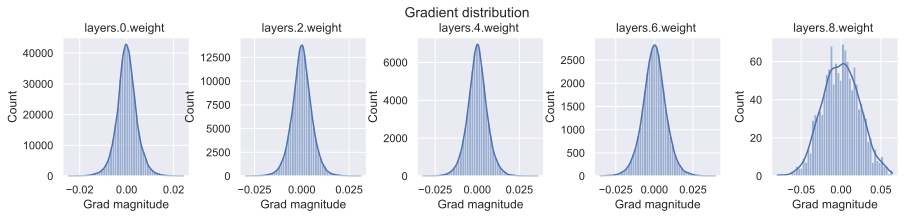

layers.0.weight - Variance: 1.871141284937039e-05
layers.2.weight - Variance: 2.9015574909863062e-05
layers.4.weight - Variance: 3.539531826390885e-05
layers.6.weight - Variance: 5.790308568975888e-05
layers.8.weight - Variance: 0.0005375592154450715


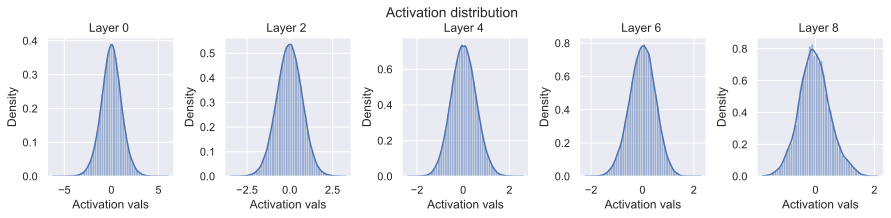

Layer 0 - Variance: 1.1967636346817017
Layer 2 - Variance: 0.5550169348716736
Layer 4 - Variance: 0.28966423869132996
Layer 6 - Variance: 0.2518630027770996
Layer 8 - Variance: 0.2748637795448303


In [206]:
model = BaseNetwork(act_fn=nn.Tanh()).to(device)
xavier_init(model)
visualize_gradients(model, print_variance=True)
visualize_activations(model, print_variance=True)

Although the variance decreases over depth, it is apparent that the activation distribution becomes more focused on the low values. Therefore, our variance will stabilize around 0.25 if we would go even deeper. Hence, we can conclude that the Xavier initialization works well for Tanh networks. But what about ReLU networks? Here, we cannot take the previous assumption of the non-linearity becoming linear for small values. The ReLU activation function sets (in expectation) half of the inputs to 0 so that also the expectation of the input is not zero. However, as long as the expectation of $W$ is zero and $b=0$, the expectation of the output is zero. The part where the calculation of the ReLU initialization differs from the identity is when determining $\text{Var}(w_{ij}x_{j})$: 

$$\text{Var}(w_{ij}x_{j})=\underbrace{\mathbb{E}[w_{ij}^2]}_{=\text{Var}(w_{ij})}\mathbb{E}[x_{j}^2]-\underbrace{\mathbb{E}[w_{ij}]^2}_{=0}\mathbb{E}[x_{j}]^2=\text{Var}(w_{ij})\mathbb{E}[x_{j}^2]$$

If we assume now that $x$ is the output of a ReLU activation (from a previous layer, $x=max(0,\tilde{y})$), we can calculate the expectation as follows:


$$
\begin{split}
    \mathbb{E}[x^2] & =\mathbb{E}[\max(0,\tilde{y})^2]\\
                    & =\frac{1}{2}\mathbb{E}[{\tilde{y}}^2]\hspace{2cm}\tilde{y}\text{ is zero-centered and symmetric}\\
                    & =\frac{1}{2}\text{Var}(\tilde{y})
\end{split}$$

Thus, we see that we have an additional factor of 1/2 in the equation, so that our desired weight variance becomes $2/d_x$. This gives us the Kaiming initialization (see [He, K. et al. (2015)](https://arxiv.org/pdf/1502.01852.pdf)). Note that the Kaiming initialization does not use the harmonic mean between input and output size. In their paper (Section 2.2, Backward Propagation, last paragraph), they argue that using $d_x$ or $d_y$ both lead to stable gradients throughout the network, and only depend on the overall input and output size of the network. Hence, we can use here only the input $d_x$:

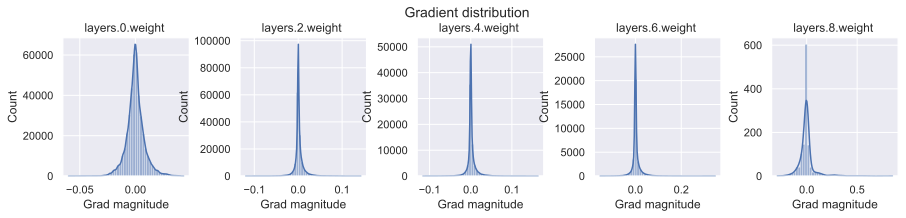

layers.0.weight - Variance: 6.598873005714267e-05
layers.2.weight - Variance: 0.00010171175381401554
layers.4.weight - Variance: 0.00012726604472845793
layers.6.weight - Variance: 0.00039043373544700444
layers.8.weight - Variance: 0.006944125983864069


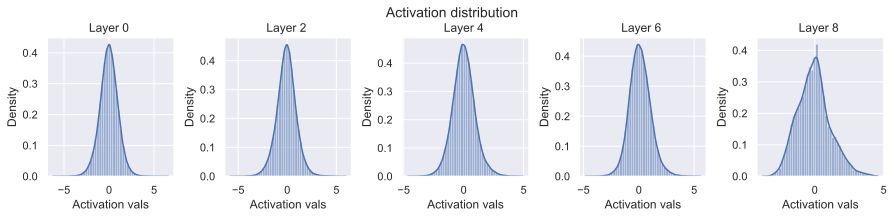

Layer 0 - Variance: 1.006711721420288
Layer 2 - Variance: 0.9667317271232605
Layer 4 - Variance: 0.8692083358764648
Layer 6 - Variance: 0.9204989075660706
Layer 8 - Variance: 1.4122048616409302


In [207]:
def kaiming_init(model):
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            param.data.fill_(0)
        elif name.startswith("layers.0"): # The first layer does not have ReLU applied on its input
            param.data.normal_(0, 1/math.sqrt(param.shape[1]))
        else:
            param.data.normal_(0, math.sqrt(2)/math.sqrt(param.shape[1]))

model = BaseNetwork(act_fn=nn.ReLU()).to(device)
kaiming_init(model)
visualize_gradients(model, print_variance=True)
visualize_activations(model, print_variance=True)

The variance stays stable across layers. We can conclude that the Kaiming initialization indeed works well for ReLU-based networks. Note that for Leaky-ReLU etc., we have to slightly adjust the factor of $2$ in the variance as half of the values are not set to zero anymore. PyTorch provides a function to calculate this factor for many activation function, see `torch.nn.init.calculate_gain` ([link](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.calculate_gain)).

## Optimization

Besides initialization, selecting a suitable optimization algorithm can be an important choice for deep neural networks. Before taking a closer look at them, we should define code for training the models. Most of the following code is copied from the previous tutorial, and only slightly altered to fit our needs.

In [208]:
# Funciones de entrenamiento
# ----------------------------

def _get_config_file(model_path, model_name):
    return os.path.join(model_path, model_name + ".config")

def _get_model_file(model_path, model_name):
    return os.path.join(model_path, model_name + ".tar")

def _get_result_file(model_path, model_name):
    return os.path.join(model_path, model_name + "_results.json")

def load_model(model_path, model_name, net=None):
    """Cargar modelo guardado"""
    config_file, model_file = _get_config_file(model_path, model_name), _get_model_file(model_path, model_name)
    assert os.path.isfile(config_file), f"Could not find the config file \"{config_file}\". Are you sure this is the correct path and you have your model config stored here?"
    assert os.path.isfile(model_file), f"Could not find the model file \"{model_file}\". Are you sure this is the correct path and you have your model stored here?"
    # Cargar configuración
    with open(config_file, "r") as f:
        config_dict = json.load(f)
    # Reconstruir modelo si no se provee
    if net is None:
        act_fn_name = config_dict["act_fn"].pop("name").lower()
        assert act_fn_name in act_fn_by_name, f"Unknown activation function \"{act_fn_name}\". Please add it to the \"act_fn_by_name\" dict."
        act_fn = act_fn_by_name[act_fn_name]()
        net = BaseNetwork(act_fn=act_fn, **config_dict)
    # Cargar pesos
    net.load_state_dict(torch.load(model_file))
    return net
    
def save_model(model, model_path, model_name):
    """Guardar modelo y configuración"""
    config_dict = model.config
    os.makedirs(model_path, exist_ok=True)
    config_file, model_file = _get_config_file(model_path, model_name), _get_model_file(model_path, model_name)
    # Guardar configuración como JSON
    with open(config_file, "w") as f:
        json.dump(config_dict, f)
    # Guardar pesos del modelo
    torch.save(model.state_dict(), model_file)

def train_model(net, model_name, optim_func, max_epochs=50, batch_size=256, overwrite=False):
    """
    Entrenar modelo con diferentes optimizadores
    
    Inputs:
        net - Object of BaseNetwork
        model_name - (str) Name of the model, used for creating the checkpoint names
        max_epochs - Number of epochs we want to (maximally) train for
        patience - If the performance on the validation set has not improved for #patience epochs, we stop training early
        batch_size - Size of batches used in training
        overwrite - Determines how to handle the case when there already exists a checkpoint. If True, it will be overwritten. Otherwise, we skip training.
    """
    file_exists = os.path.isfile(_get_model_file(CHECKPOINT_PATH, model_name))
    if file_exists and not overwrite:
        print(f"Model file of \"{model_name}\" already exists. Skipping training...")
        with open(_get_result_file(CHECKPOINT_PATH, model_name), "r") as f:
            results = json.load(f)
    else:
        if file_exists:
            print("Model file exists, but will be overwritten...")
            
        # Defining optimizer, loss and data loader
        optimizer =  optim_func(net.parameters())
        loss_module = nn.CrossEntropyLoss()
        train_loader_local = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)
    
        results = None
        val_scores = []
        train_losses, train_scores = [], []
        best_val_epoch = -1
        for epoch in range(max_epochs):
            ############
            # Training #
            ############
            net.train()
            true_preds, count = 0., 0
            t = tqdm(train_loader_local, leave=False)
            for imgs, labels in t:
                imgs, labels = imgs.to(device), labels.to(device)
                optimizer.zero_grad()
                preds = net(imgs)
                loss = loss_module(preds, labels)
                loss.backward()
                optimizer.step()
                # Record statistics during training
                true_preds += (preds.argmax(dim=-1) == labels).sum().item()
                count += labels.shape[0]
                t.set_description(f"Epoch {epoch+1}: loss={loss.item():4.2f}")
                train_losses.append(loss.item())
            train_acc = true_preds / count
            train_scores.append(train_acc)

            ##############
            # Validation #
            ##############
            val_acc = test_model(net, val_loader)
            val_scores.append(val_acc)
            print(f"[Epoch {epoch+1:2d}] Training accuracy: {train_acc*100.0:05.2f}%, Validation accuracy: {val_acc*100.0:05.2f}%")

            if len(val_scores) == 1 or val_acc > val_scores[best_val_epoch]:
                print("\t   (New best performance, saving model...)")
                save_model(net, CHECKPOINT_PATH, model_name)
                best_val_epoch = epoch
    
    if results is None:
        load_model(CHECKPOINT_PATH, model_name, net=net)
        test_acc = test_model(net, test_loader)
        results = {"test_acc": test_acc, "val_scores": val_scores, "train_losses": train_losses, "train_scores": train_scores}
        with open(_get_result_file(CHECKPOINT_PATH, model_name), "w") as f:
            json.dump(results, f)
            
    # Plot a curve of the validation accuracy
    sns.set()
    plt.plot([i for i in range(1,len(results["train_scores"])+1)], results["train_scores"], label="Train")
    plt.plot([i for i in range(1,len(results["val_scores"])+1)], results["val_scores"], label="Val")
    plt.xlabel("Epochs")
    plt.ylabel("Validation accuracy")
    plt.ylim(min(results["val_scores"]), max(results["train_scores"])*1.01)
    plt.title(f"Validation performance of {model_name}")
    plt.legend()
    plt.show()
    plt.close()
    
    print((f" Test accuracy: {results['test_acc']*100.0:4.2f}% ").center(50, "=")+"\n")
    return results
    

def test_model(net, data_loader):
    """
    Test a model on a specified dataset.
    
    Inputs:
        net - Trained model of type BaseNetwork
        data_loader - DataLoader object of the dataset to test on (validation or test)
    """
    net.eval()
    true_preds, count = 0., 0
    for imgs, labels in data_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.no_grad():
            preds = net(imgs).argmax(dim=-1)
            true_preds += (preds == labels).sum().item()
            count += labels.shape[0]
    test_acc = true_preds / count
    return test_acc 

First, we need to understand what an optimizer actually does. The optimizer is responsible to update the network's parameters given the gradients. Hence, we effectively implement a function $w^{t} = f(w^{t-1}, g^{t}, ...)$ with $w$ being the parameters, and $g^{t} = \nabla_{w^{(t-1)}} \mathcal{L}^{(t)}$ the gradients at time step $t$. A common, additional parameter to this function is the learning rate, here denoted by $\eta$. Usually, the learning rate can be seen as the "step size" of the update. A higher learning rate means that we change the weights more in the direction of the gradients, a smaller means we take shorter steps. 

As most optimizers only differ in the implementation of $f$, we can define a template for an optimizer in PyTorch below. We take as input the parameters of a model and a learning rate. The function `zero_grad` sets the gradients of all parameters to zero, which we have to do before calling `loss.backward()`. Finally, the `step()` function tells the optimizer to update all weights based on their gradients. The template is setup below:

In [209]:
# ----------------------------
# Optimizadores personalizados
# ----------------------------

class OptimizerTemplate:
    """Plantilla base para optimizadores"""
    def __init__(self, params, lr):
        self.params = list(params)  # Lista de parámetros a optimizar
        self.lr = lr               # Tasa de aprendizaje
        
    def zero_grad(self):
        """Reiniciar gradientes"""
        for p in self.params:
            if p.grad is not None:
                p.grad.detach_()   # Desvincular de gráfico computacional
                p.grad.zero_()     # Poner a cero
    
    @torch.no_grad()
    def step(self):
        """Aplicar paso de optimización"""
        for p in self.params:
            if p.grad is None:
                continue
            self.update_param(p)  # Método específico de cada optimizador
            
    def update_param(self, p):
        raise NotImplementedError("Implementar en subclases")

The first optimizer we are going to implement is the standard Stochastic Gradient Descent (SGD). SGD updates the parameters using the following equation:

$$
\begin{split}
    w^{(t)} & = w^{(t-1)} - \eta \cdot g^{(t)}
\end{split}
$$

As simple as the equation is also our implementation of SGD:

In [210]:
class SGD(OptimizerTemplate):
    """Descenso de gradiente estocástico básico"""
    def __init__(self, params, lr):
        super().__init__(params, lr)
        
    def update_param(self, p):
        p_update = -self.lr * p.grad  # Paso contrario al gradiente
        p.add_(p_update)               # Actualización in-place

In the lecture, we also have discussed the concept of momentum which replaces the gradient in the update by an exponential average of all past gradients including the current one:

$$
\begin{split}
    m^{(t)} & = \beta_1 m^{(t-1)} + (1 - \beta_1)\cdot g^{(t)}\\
    w^{(t)} & = w^{(t-1)} - \eta \cdot m^{(t)}\\
\end{split}
$$

Let's also implement it below:

In [211]:
class SGDMomentum(OptimizerTemplate):
    """SGD con momento"""
    def __init__(self, params, lr, momentum=0.0):
        super().__init__(params, lr)
        self.momentum = momentum # Corresponds to beta_1 in the equation above
        self.param_momentum = {p: torch.zeros_like(p.data) for p in self.params} # Dict to store m_t
        
    def update_param(self, p):
        # Actualizar velocidad: v = momentum*v + (1-momentum)*grad
        self.param_momentum[p] = (1 - self.momentum) * p.grad + self.momentum * self.param_momentum[p]
        # Aplicar paso: p = p - lr * velocity
        p_update = -self.lr * self.param_momentum[p]
        p.add_(p_update)

Finally, we arrive at Adam. Adam combines the idea of momentum with an adaptive learning rate, which is based on an exponential average of the squared gradients, i.e. the gradients norm. Furthermore, we add a bias correction for the momentum and adaptive learning rate for the first iterations:

$$
\begin{split}
    m^{(t)} & = \beta_1 m^{(t-1)} + (1 - \beta_1)\cdot g^{(t)}\\
    v^{(t)} & = \beta_2 v^{(t-1)} + (1 - \beta_2)\cdot \left(g^{(t)}\right)^2\\
    \hat{m}^{(t)} & = \frac{m^{(t)}}{1-\beta^{t}_1}, \hat{v}^{(t)} = \frac{v^{(t)}}{1-\beta^{t}_2}\\
    w^{(t)} & = w^{(t-1)} - \frac{\eta}{\sqrt{\hat{v}^{(t)}} + \epsilon}\circ \hat{m}^{(t)}\\
\end{split}
$$

Epsilon is a small constant used to improve numerical stability for very small gradient norms. Remember that the adaptive learning rate does not replace the learning rate hyperparameter $\eta$, but rather acts as an extra factor and ensures that the gradients of various parameters have a similar norm. 

In [212]:
class Adam(OptimizerTemplate):
    """Optimizador Adam adaptativo"""
    def __init__(self, params, lr, beta1=0.9, beta2=0.999, eps=1e-8):
        super().__init__(params, lr)
        self.beta1 = beta1     # Decaimiento para primer momento (media)
        self.beta2 = beta2     # Decaimiento para segundo momento (varianza)
        self.eps = eps         # Estabilidad numérica
        self.param_step = {p: 0 for p in self.params} # Remembers "t" for each parameter for bias correction
        self.param_momentum = {p: torch.zeros_like(p.data) for p in self.params}
        self.param_2nd_momentum = {p: torch.zeros_like(p.data) for p in self.params}
        
    def update_param(self, p):
        self.param_step[p] += 1
        # Actualizar momentos
        self.param_momentum[p] = (1 - self.beta1) * p.grad + self.beta1 * self.param_momentum[p]
        self.param_2nd_momentum[p] = (1 - self.beta2) * (p.grad)**2 + self.beta2 * self.param_2nd_momentum[p]

        # Corrección de sesgo
        bias_correction_1 = 1 - self.beta1 ** self.param_step[p]
        bias_correction_2 = 1 - self.beta2 ** self.param_step[p]

        # Actualizar parámetros
        p_2nd_mom = self.param_2nd_momentum[p] / bias_correction_2
        p_mom = self.param_momentum[p] / bias_correction_1
        p_lr = self.lr / (torch.sqrt(p_2nd_mom) + self.eps)
        p_update = -p_lr * p_mom
        
        p.add_(p_update)

### Comparing optimizers on model training

After we have implemented three optimizers (SGD, SGD with momentum, and Adam), we can start to analyze and compare them. 
First, we test them on how well they can optimize a neural network on the FashionMNIST dataset. We use again our linear network, this time with a ReLU activation and the kaiming initialization, which we have found before to work well for ReLU-based networks. Note that the model is over-parameterized for this task, and we can achieve similar performance with a much smaller network (for example `100,100,100`). However, our main interest is in how well the optimizer can train *deep* neural networks, hence the over-parameterization.

In [213]:
# ----------------------------
# Entrenamiento comparativo
# ----------------------------

# Crear modelo base con inicialización Kaiming
base_model = BaseNetwork(act_fn=nn.ReLU(), hidden_sizes=[512,256,256,128])
kaiming_init(base_model)

For a fair comparison, we train the exact same model with the same seed with the three optimizers below. Feel free to change the hyperparameters if you want (however, you have to train your own model then).

Model file of "FashionMNIST_SGD" already exists. Skipping training...


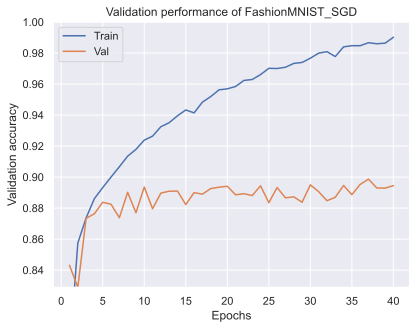

============= Test accuracy: 89.09% ==============



In [214]:

# Entrenar con SGD
SGD_model = copy.deepcopy(base_model).to(device)
SGD_results = train_model(
    SGD_model, "FashionMNIST_SGD",
    lambda params: SGD(params, lr=0.1),
    max_epochs=40, batch_size=256
)


Model file of "FashionMNIST_SGDMom" already exists. Skipping training...


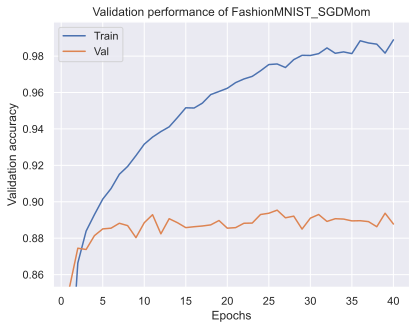

============= Test accuracy: 88.83% ==============



In [215]:
# Entrenar con SGD+Momentum
SGDMom_model = copy.deepcopy(base_model).to(device)
SGDMom_results = train_model(
    SGDMom_model, "FashionMNIST_SGDMom",
    lambda params: SGDMomentum(params, lr=1e-1, momentum=0.9),
    max_epochs=40, batch_size=256
)


Model file of "FashionMNIST_Adam" already exists. Skipping training...


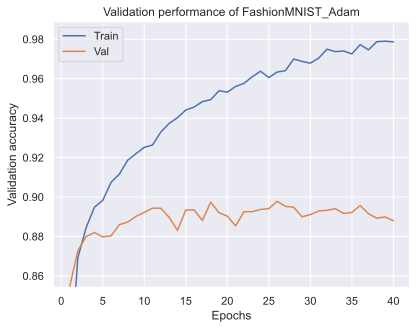

============= Test accuracy: 89.46% ==============



In [216]:
# Entrenar con Adam
Adam_model = copy.deepcopy(base_model).to(device)
Adam_results = train_model(
    Adam_model, "FashionMNIST_Adam",
    lambda params: Adam(params, lr=1e-3),
    max_epochs=40, batch_size=256
)

The result is that all optimizers perform similarly well with the given model. The differences are too small to find any significant conclusion. However, keep in mind that this can also be attributed to the initialization we chose. When changing the initialization to worse (e.g. constant initialization), Adam usually shows to be more robust because of its adaptive learning rate. To show the specific benefits of the optimizers, we will continue to look at some possible loss surfaces in which momentum and adaptive learning rate are crucial.

### Pathological curvatures

A pathological curvature is a type of surface that is similar to ravines and is particularly tricky for plain SGD optimization. In words, pathological curvatures typically have a steep gradient in one direction with an optimum at the center, while in a second direction we have a slower gradient towards a (global) optimum. Let's first create an example surface of this and visualize it:

In [217]:
def pathological_curve_loss(w1, w2):
    # Example of a pathological curvature. There are many more possible, feel free to experiment here!
    x1_loss = torch.tanh(w1)**2 + 0.01 * torch.abs(w1)
    x2_loss = torch.sigmoid(w2)
    return x1_loss + x2_loss

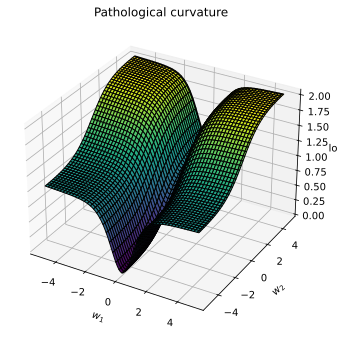

In [218]:
def plot_curve(curve_fn, x_range=(-5,5), y_range=(-5,5), plot_3d=False, cmap=cm.viridis, title="Pathological curvature"):
    fig = plt.figure()
    ax = plt.axes(projection='3d') if plot_3d else plt.axes()
    
    x = torch.arange(x_range[0], x_range[1], (x_range[1]-x_range[0])/100.)
    y = torch.arange(y_range[0], y_range[1], (y_range[1]-y_range[0])/100.)
    x, y = torch.meshgrid(x, y, indexing='xy')
    z = curve_fn(x, y)
    x, y, z = x.numpy(), y.numpy(), z.numpy()
    
    if plot_3d:
        ax.plot_surface(x, y, z, cmap=cmap, linewidth=1, color="#000", antialiased=False)
        ax.set_zlabel("loss")
    else:
        ax.imshow(z[::-1], cmap=cmap, extent=(x_range[0], x_range[1], y_range[0], y_range[1]))
    plt.title(title)
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    plt.tight_layout()
    return ax

sns.reset_orig()
_ = plot_curve(pathological_curve_loss, plot_3d=True)
plt.show()

In terms of optimization, you can image that $w_1$ and $w_2$ are weight parameters, and the curvature represents the loss surface over the space of $w_1$ and $w_2$. Note that in typical networks, we have many, many more parameters than two, and such curvatures can occur in multi-dimensional spaces as well.

Ideally, our optimization algorithm would find the center of the ravine and focuses on optimizing the parameters towards the direction of $w_2$. However, if we encounter a point along the ridges, the gradient is much greater in $w_1$ than $w_2$, and we might end up jumping from one side to the other. Due to the large gradients, we would have to reduce our learning rate slowing down learning significantly.

To test our algorithms, we can implement a simple function to train two parameters on such a surface:

In [219]:
def train_curve(optimizer_func, curve_func=pathological_curve_loss, num_updates=100, init=[5,5]):
    """
    Inputs:
        optimizer_func - Constructor of the optimizer to use. Should only take a parameter list
        curve_func - Loss function (e.g. pathological curvature)
        num_updates - Number of updates/steps to take when optimizing 
        init - Initial values of parameters. Must be a list/tuple with two elements representing w_1 and w_2
    Outputs:
        Numpy array of shape [num_updates, 3] with [t,:2] being the parameter values at step t, and [t,2] the loss at t.
    """
    weights = nn.Parameter(torch.FloatTensor(init), requires_grad=True)
    optimizer = optimizer_func([weights])
    
    list_points = []
    for _ in range(num_updates):
        loss = curve_func(weights[0], weights[1])
        list_points.append(torch.cat([weights.data.detach(), loss.unsqueeze(dim=0).detach()], dim=0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    points = torch.stack(list_points, dim=0).numpy()
    return points

Next, let's apply the different optimizers on our curvature. Note that we set a much higher learning rate for the optimization algorithms as you would in a standard neural network. This is because we only have 2 parameters instead of tens of thousands or even millions.

In [220]:
SGD_points = train_curve(lambda params: SGD(params, lr=10))
SGDMom_points = train_curve(lambda params: SGDMomentum(params, lr=10, momentum=0.9))
Adam_points = train_curve(lambda params: Adam(params, lr=1))

To understand best how the different algorithms worked, we visualize the update step as a line plot through the loss surface. We will stick with a 2D representation for readability.

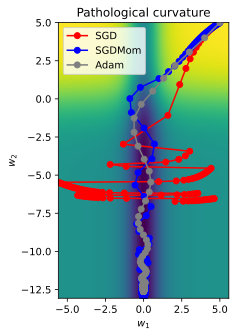

In [221]:
all_points = np.concatenate([SGD_points, SGDMom_points, Adam_points], axis=0)
ax = plot_curve(pathological_curve_loss,
                x_range=(-np.absolute(all_points[:,0]).max(), np.absolute(all_points[:,0]).max()),
                y_range=(all_points[:,1].min(), all_points[:,1].max()),
                plot_3d=False)
ax.plot(SGD_points[:,0], SGD_points[:,1], color="red", marker="o", zorder=1, label="SGD")
ax.plot(SGDMom_points[:,0], SGDMom_points[:,1], color="blue", marker="o", zorder=2, label="SGDMom")
ax.plot(Adam_points[:,0], Adam_points[:,1], color="grey", marker="o", zorder=3, label="Adam")
plt.legend()
plt.show()

We can clearly see that SGD is not able to find the center of the optimization curve and has a problem converging due to the steep gradients in $w_1$. In contrast, Adam and SGD with momentum nicely converge as the changing direction of $w_1$ is canceling itself out. On such surfaces, it is crucial to use momentum.

### Steep optima

A second type of challenging loss surfaces are steep optima. In those, we have a larger part of the surface having very small gradients while around the optimum, we have very large gradients. For instance, take the following loss surfaces:

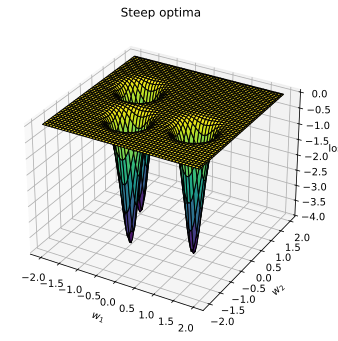

In [224]:
def bivar_gaussian(w1, w2, x_mean=0.0, y_mean=0.0, x_sig=1.0, y_sig=1.0):
    norm = 1 / (2 * np.pi * x_sig * y_sig)
    x_exp = (-1 * (w1 - x_mean)**2) / (2 * x_sig**2)
    y_exp = (-1 * (w2 - y_mean)**2) / (2 * y_sig**2)
    return norm * torch.exp(x_exp + y_exp)

def comb_func(w1, w2):
    z = -bivar_gaussian(w1, w2, x_mean=1.0, y_mean=-0.5, x_sig=0.2, y_sig=0.2)
    z -= bivar_gaussian(w1, w2, x_mean=-1.0, y_mean=0.5, x_sig=0.2, y_sig=0.2)
    z -= bivar_gaussian(w1, w2, x_mean=-0.5, y_mean=-0.8, x_sig=0.2, y_sig=0.2)
    return z

_ = plot_curve(comb_func, x_range=(-2,2), y_range=(-2,2), plot_3d=True, title="Steep optima")

Most of the loss surface has very little to no gradients. However, close to the optima, we have very steep gradients. To reach the minimum when starting in a region with lower gradients, we expect an adaptive learning rate to be crucial. To verify this hypothesis, we can run our three optimizers on the surface:

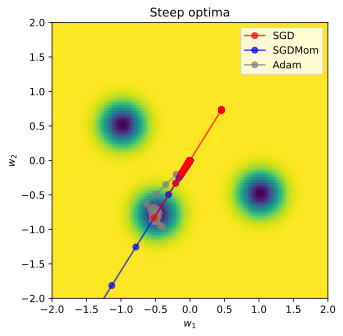

In [227]:
SGD_points = train_curve(lambda params: SGD(params, lr=.5), comb_func, init=[0,0])
SGDMom_points = train_curve(lambda params: SGDMomentum(params, lr=1, momentum=0.9), comb_func, init=[0,0])
Adam_points = train_curve(lambda params: Adam(params, lr=0.2), comb_func, init=[0,0])

all_points = np.concatenate([SGD_points, SGDMom_points, Adam_points], axis=0)
ax = plot_curve(comb_func,
                x_range=(-2, 2),
                y_range=(-2, 2),
                plot_3d=False,
                title="Steep optima")
ax.plot(SGD_points[:,0], SGD_points[:,1], color="red", marker="o", zorder=3, label="SGD", alpha=0.7)
ax.plot(SGDMom_points[:,0], SGDMom_points[:,1], color="blue", marker="o", zorder=2, label="SGDMom", alpha=0.7)
ax.plot(Adam_points[:,0], Adam_points[:,1], color="grey", marker="o", zorder=1, label="Adam", alpha=0.7)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.legend()
plt.show()

SGD first takes very small steps until it touches the border of the optimum. First reaching a point around $(-0.75,-0.5)$, the gradient direction has changed and pushes the parameters to $(0.8,0.5)$ from which SGD cannot recover anymore (only with many, many steps). A similar problem has SGD with momentum, only that it continues the direction of the touch of the optimum. The gradients from this time step are so much larger than any other point that the momentum $m_t$ is overpowered by it. Finally, Adam is able to converge in the optimum showing the importance of adaptive learning rates.

### What optimizer to take

After seeing the results on optimization, what is our conclusion? Should we always use Adam and never look at SGD anymore? The short answer: no. There are many papers saying that in certain situations, SGD (with momentum) generalizes better where Adam often tends to overfit [5,6]. This is related to the idea of finding wider optima. For instance, see the illustration of different optima below (credit: [Keskar et al., 2017](https://arxiv.org/pdf/1609.04836.pdf)):

<center width="100%"><img src="flat_vs_sharp_minima.svg" width="500px"></center>

The black line represents the training loss surface, while the dotted red line is the test loss. Finding sharp, narrow minima can be helpful for finding the minimal training loss. However, this doesn't mean that it also minimizes the test loss as especially flat minima have shown to generalize better. You can imagine that the test dataset has a slightly shifted loss surface due to the different examples than in the training set. A small change can have a significant influence for sharp minima, while flat minima are generally more robust to this change. 

In the next tutorial, we will see that some network types can still be better optimized with SGD and learning rate scheduling than Adam. Nevertheless, Adam is the most commonly used optimizer in Deep Learning as it usually performs better than other optimizers, especially for deep networks.

## Conclusion

In this tutorial, we have looked at initialization and optimization techniques for neural networks. We have seen that a good initialization has to balance the preservation of the gradient variance as well as the activation variance. This can be achieved with the Xavier initialization for tanh-based networks, and the Kaiming initialization for ReLU-based networks. In optimization, concepts like momentum and adaptive learning rate can help with challenging loss surfaces but don't guarantee an increase in performance for neural networks.


## References

[1] Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." Proceedings of the thirteenth international conference on artificial intelligence and statistics. 2010. [link](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

[2] He, Kaiming, et al. "Delving deep into rectifiers: Surpassing human-level performance on imagenet classification." Proceedings of the IEEE international conference on computer vision. 2015. [link](https://www.cv-foundation.org/openaccess/content_iccv_2015/html/He_Delving_Deep_into_ICCV_2015_paper.html)

[3] Kingma, Diederik P. & Ba, Jimmy. "Adam: A Method for Stochastic Optimization." Proceedings of the third international conference for learning representations (ICLR). 2015. [link](https://arxiv.org/abs/1412.6980)

[4] Keskar, Nitish Shirish, et al. "On large-batch training for deep learning: Generalization gap and sharp minima." Proceedings of the fifth international conference for learning representations (ICLR). 2017. [link](https://arxiv.org/abs/1609.04836)

[5] Wilson, Ashia C., et al. "The Marginal Value of Adaptive Gradient Methods in Machine Learning." Advances in neural information processing systems. 2017. [link](https://papers.nips.cc/paper/7003-the-marginal-value-of-adaptive-gradient-methods-in-machine-learning.pdf)

[6] Ruder, Sebastian. "An overview of gradient descent optimization algorithms." arXiv preprint. 2017. [link](https://arxiv.org/abs/1609.04747)